In [1]:
import random
import pandas as pd
import numpy as np
from utils import *
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, KFold, cross_val_score, LeaveOneOut,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pygam import LogisticGAM, s, f, l
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Vegetation Classification using Machine Learning

## Load Data

In [2]:
# Load all the classes into different Dataframes

class1 = pd.read_csv('data/Data_Class_1.csv')
class3 = pd.read_csv('data/Data_Class_3.csv')
class6 = pd.read_csv('data/Data_Class_6.csv')

## Descriptive Statistics

In [3]:
# Combine all classes into one dataset and view the top rows

data = pd.concat([class1, class3, class6], ignore_index=True)
data

Id  Altitude  Slope_Orientation  Slope  Horizontal_Distance_To_Water  \
0        41      2699                347      3                             0   
1        52      2739                323     25                            85   
2        53      2696                 72      2                            30   
3        56      2722                315     24                            30   
4        68      2919                 13     13                            90   
...     ...       ...                ...    ...                           ...   
5935  15106      2480                 10     21                           150   
5936  15110      2600                 57     19                             0   
5937  15111      2508                 33     26                            67   
5938  15112      2610                 59     17                            60   
5939  15113      2600                 38     25                           124   

      Vertical_Distance_To_Water  Horizontal_Distance_To_Roadways  \
0                              0                             2096   
1                             43                             3118   
2                              0                             3271   
3                             19                             3216   
4                              6                             5321   
...                          ...                              ...   
5935                          38                              607   
5936                           0                              731   
5937                           1                              644   
5938                          10                              674   
5939                           0                              589   

      Shadow_Index_9h  Shadow_Index_12h  Shadow_Index_15h  \
0                 213               234               159   
1                 149               205               192   
2                 222               234               149   
3                 148               212               200   
4                 207               214               142   
...               ...               ...               ...   
5935              193               194               133   
5936              229               197                93   
5937              204               173                91   
5938              231               202                98   
5939              212               178                89   

      Horizontal_Distance_To_Fire_Points  Canopy_Density  Rainfall_Summer  \
0                                   6853           37.32           282.46   
1                                   6219           76.51           182.57   
2                                   6071           86.37           374.79   
3                                   6132           85.31           364.30   
4                                   4060           78.13           303.26   
...                                  ...             ...              ...   
5935                                1436           82.97           247.13   
5936                                1332           38.82           163.93   
5937                                1385           75.93           366.25   
5938                                1328           74.65           312.00   
5939                                1261           84.20           397.50   

      Rainfall_Winter  Wind_Exposure_Level Soil_Type Wilderness_Area  \
0              125.22                 6.23   Type_20          Area_1   
1              532.19                30.65   Type_29          Area_1   
2              275.52                59.96   Type_30          Area_1   
3             1182.48                22.21   Type_16          Area_1   
4             1198.69                14.22   Type_29          Area_1   
...               ...                  ...       ...             ...   
5935           190.52                45.88   

In [4]:
# Check data types and non-null counts

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  5940 non-null   int64  
 1   Altitude                            5940 non-null   int64  
 2   Slope_Orientation                   5940 non-null   int64  
 3   Slope                               5940 non-null   int64  
 4   Horizontal_Distance_To_Water        5940 non-null   int64  
 5   Vertical_Distance_To_Water          5940 non-null   int64  
 6   Horizontal_Distance_To_Roadways     5940 non-null   int64  
 7   Shadow_Index_9h                     5940 non-null   int64  
 8   Shadow_Index_12h                    5940 non-null   int64  
 9   Shadow_Index_15h                    5940 non-null   int64  
 10  Horizontal_Distance_To_Fire_Points  5940 non-null   int64  
 11  Canopy_Density                      5940 no

According to this information:
- 5940 rows
- 18 columns
- No null values
- 3 categorical columns and 15 numerical columns

### Numerical Columns
View some metrics of each numerical column

In [5]:
# Generate descriptive statistics of the numerical columns

data.describe()

Id     Altitude  Slope_Orientation        Slope  \
count   5940.000000  5940.000000        5940.000000  5940.000000   
mean    8038.627946  2672.851684         171.001347    17.276263   
std     4201.653201   387.964294         121.193059     8.397512   
min       41.000000  1863.000000           0.000000     1.000000   
25%     4926.250000  2378.000000          55.000000    11.000000   
50%     8070.000000  2572.000000         145.000000    16.000000   
75%    11311.250000  3062.000000         302.000000    23.000000   
max    15118.000000  3675.000000         360.000000    52.000000   

       Horizontal_Distance_To_Water  Vertical_Distance_To_Water  \
count                   5940.000000                 5940.000000   
mean                     214.397475                   48.701347   
std                      176.610733                   54.068275   
min                        0.000000                 -104.000000   
25%                       85.000000                    8.000000   
50%                      180.000000                   34.000000   
75%                      306.000000                   75.000000   
max                     1129.000000                  411.000000   

       Horizontal_Distance_To_Roadways  Shadow_Index_9h  Shadow_Index_12h  \
count                      5940.000000      5940.000000       5940.000000   
mean                       1588.265488       202.461448        216.604882   
std                        1265.901292        33.925223         23.720654   
min                           0.000000         0.000000        120.000000   
25%                         695.250000       182.000000        204.000000   
50%                        1230.000000       209.000000        220.000000   
75%                        2072.000000       229.000000        234.000000   
max                        6508.000000       254.000000        254.000000   

       Shadow_Index_15h  Horizontal_Distance_To_Fire_Points  Canopy_Density  \
count       5940.000000                         5940.000000     5940.000000   
mean         144.623232                         1360.505387       60.077453   
std           44.343675                          998.115844       17.404128   
min            0.000000                            0.000000       30.000000   
25%          115.000000                          674.000000       44.910000   
50%          145.000000                         1095.000000       60.190000   
75%          177.250000                         1785.000000       75.147500   
max          248.000000                         6993.000000       89.990000   

       Rainfall_Summer  Rainfall_Winter  Wind_Exposure_Level  
count      5940.000000      5940.000000          5940.000000  
mean        300.091620       647.547544            35.107199  
std          86.575054       323.281830            17.442532  
min         150.030000        90.070000             5.000000  
25%         225.855000       363.685000            20.010000  
50%         301.910000       650.650000            35.215000  
75%         373.827500       930.800000            50.205000  
max         449.970000      1199.880000            64.990000

As displayed above, we can identify the following data characteristics:
- The columns have different ranges of values
- Some columns like the horizontal_distance_to_water have a significant difference between the mean and the median, indicating a possible skewness in the data
- When comparing the third quartile and the maximum value, we can see that some columns have outliers since the maximum value is significantly higher than the third quartile
- The same can be said for the minimum value and the first quartile, where the minimum value is significantly lower than the first quartile
- The standard deviation of the features possess a wide range of magnitudes, indicating that in some columns the data is spread out from the mean

### Categorical columns

In [6]:
# Generate descriptive statistics of the categorical columns

data.describe(include='object')

Soil_Type Wilderness_Area Vegetation_Type
count       5940            5940            5940
unique        32               4               3
top      Type_10          Area_3          Type_1
freq        1634            2529            2160

The categorical columns have the following characteristics:
- We have two columns with few unique values and one column with many unique values. We need to take this into account when encoding the data.
- The most frequent values of each column are present in at least 25% of the rows

## Univariate Analysis

In [7]:
# Get the name of the numerical and categorical columns

numerical_columns = data.select_dtypes(exclude='object').columns.drop('Id')
categorical_columns = data.select_dtypes(include='object').columns

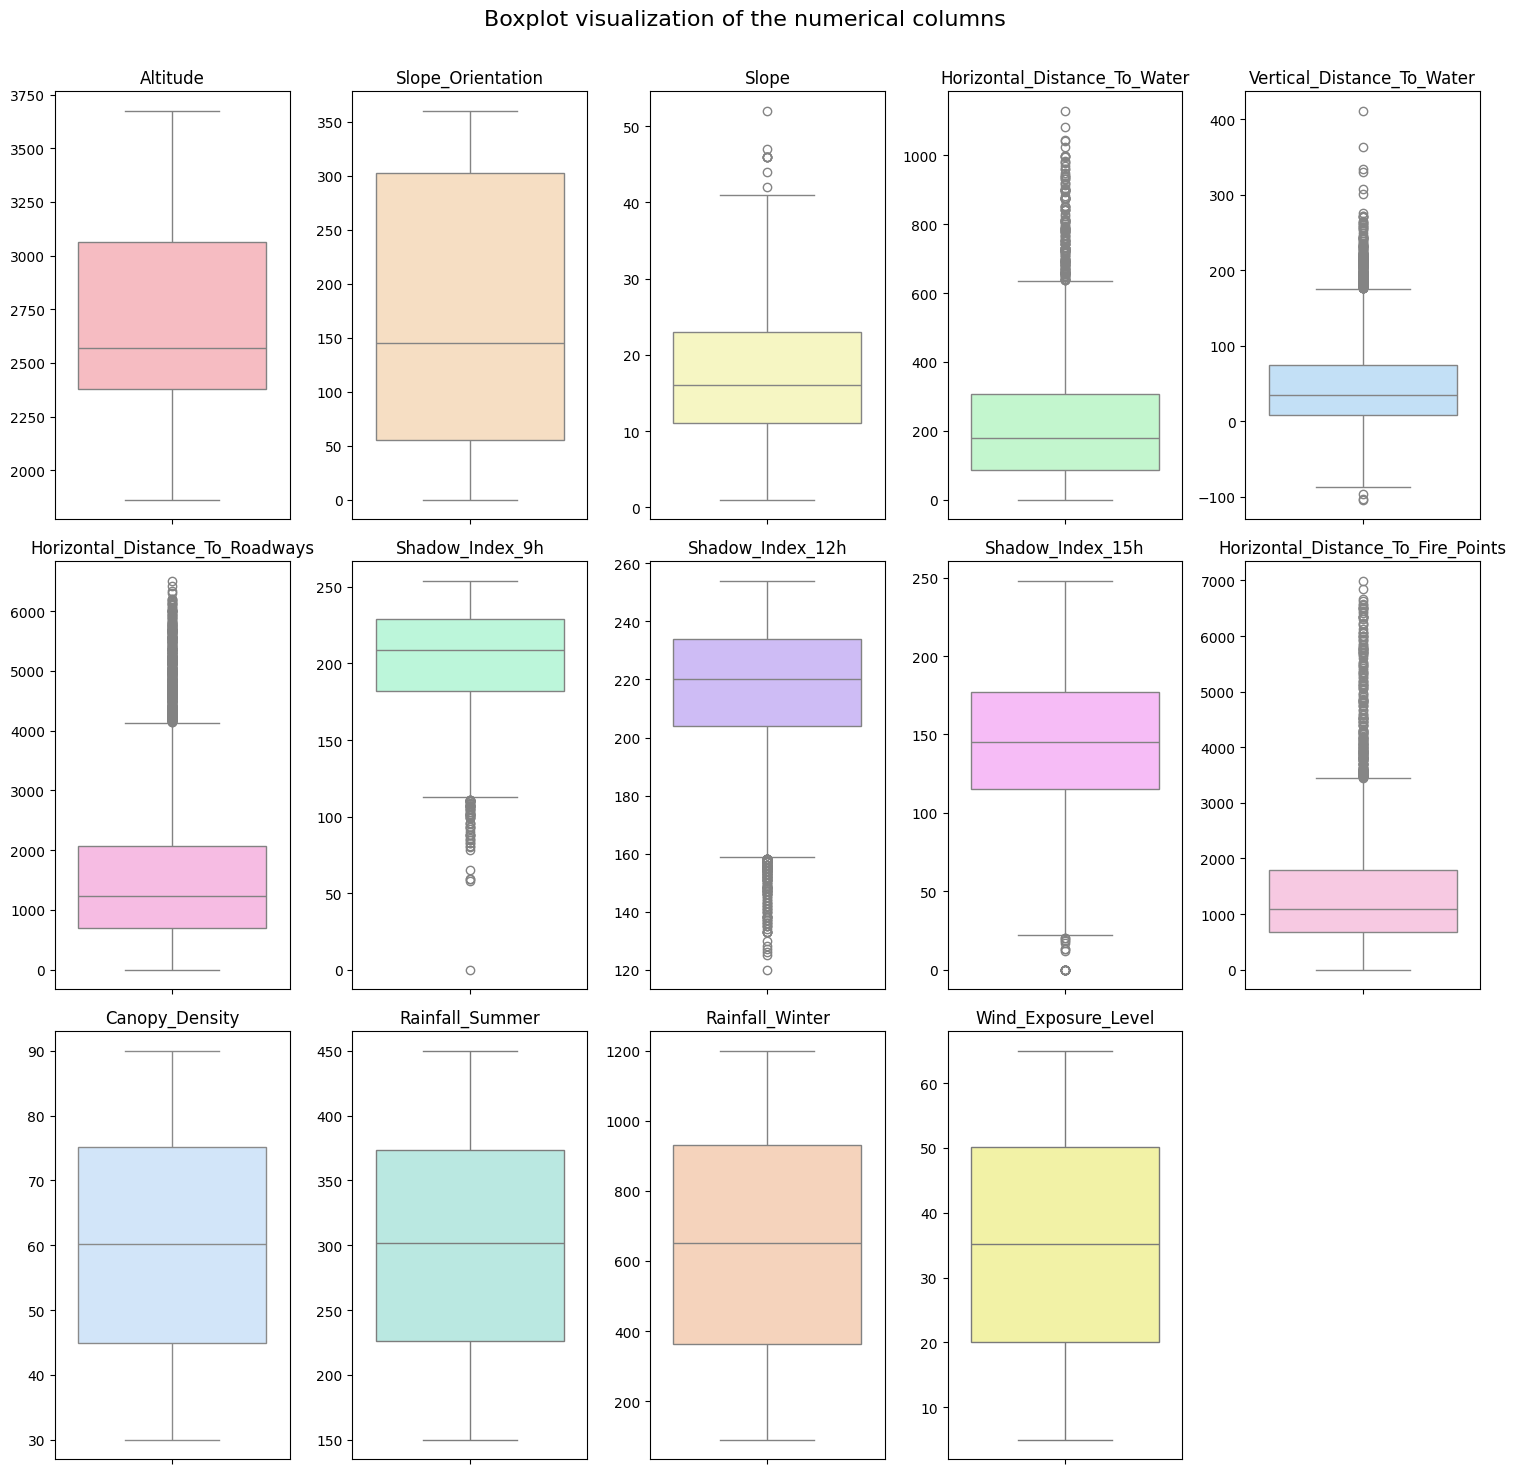

In [8]:
# Draw the boxplot visualizations of the numerical columns

boxplot_visualization(data, numerical_columns, 'Boxplot visualization of the numerical columns')

- Several columns such as the Horizontal_Distance_To_Water, Horizontal_Distance_To_Roadways, and Horizontal_Distance_To_Fire_Points have a significant number of outliers. 
These outliers may appear since different types of vegetation may have very distinct characteristics and values linked to them. If further investigation reveals that it is not the case, they may affect the performance of the models and it might be important to consider removing them.
- Given the length of the boxes, the majority of the data contains less variability since have narrow boxes. The Slope_Orientation column has a wide box, so we can identify that the values have more variability.

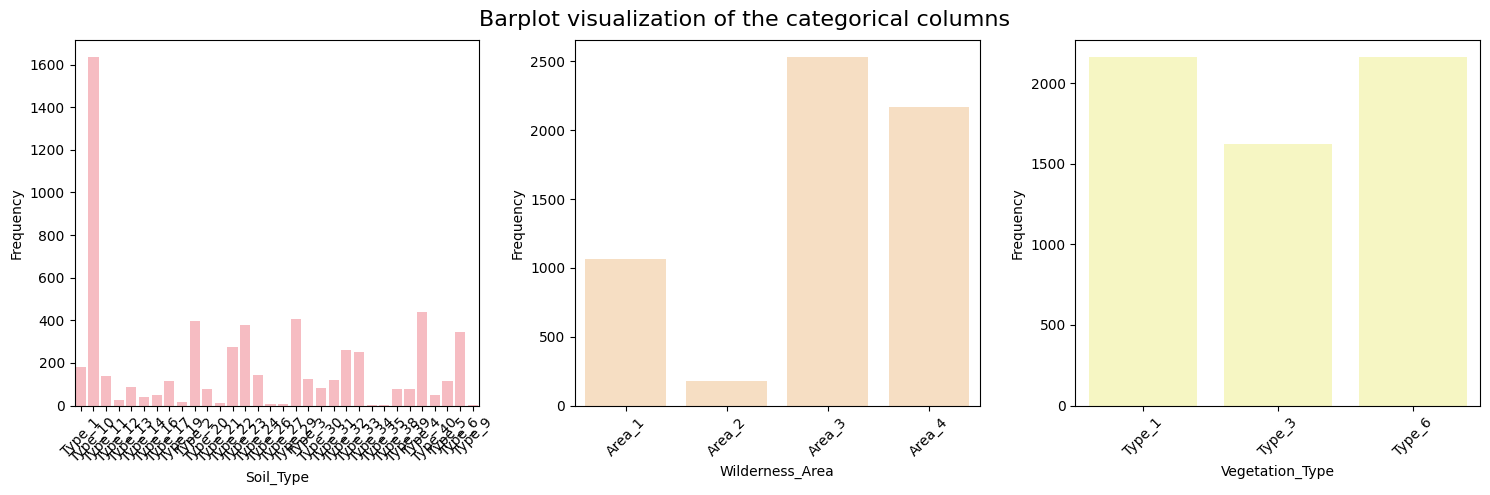

In [9]:
# Draw the barplot visualizations of the categorical columns

barplot_visualization(data, categorical_columns, 'Barplot visualization of the categorical columns')

- Given the distribution of the categorical columns there are clear outliers in the Soil_Type and Wilderness_Area.
- Our classes appear in similar frequencies and it suggests that we will not encounter issues related to class imbalance, which is a crucial information to have in mind when evaluating the models.

## Bivariate Analysis

In [10]:
# Encode the categorical columns

encoded_data = data.copy()
encoded_data['Soil_Type_Enc'] = pd.factorize(data['Soil_Type'])[0]
encoded_data['Wilderness_Area_Enc'] = pd.factorize(data['Wilderness_Area'])[0]
encoded_data['Vegetation_Type_Enc'] = pd.factorize(data['Vegetation_Type'])[0]

In [11]:
# Generate descriptive statistics of data after encoding

encoded_data.describe()

Id     Altitude  Slope_Orientation        Slope  \
count   5940.000000  5940.000000        5940.000000  5940.000000   
mean    8038.627946  2672.851684         171.001347    17.276263   
std     4201.653201   387.964294         121.193059     8.397512   
min       41.000000  1863.000000           0.000000     1.000000   
25%     4926.250000  2378.000000          55.000000    11.000000   
50%     8070.000000  2572.000000         145.000000    16.000000   
75%    11311.250000  3062.000000         302.000000    23.000000   
max    15118.000000  3675.000000         360.000000    52.000000   

       Horizontal_Distance_To_Water  Vertical_Distance_To_Water  \
count                   5940.000000                 5940.000000   
mean                     214.397475                   48.701347   
std                      176.610733                   54.068275   
min                        0.000000                 -104.000000   
25%                       85.000000                    8.000000   
50%                      180.000000                   34.000000   
75%                      306.000000                   75.000000   
max                     1129.000000                  411.000000   

       Horizontal_Distance_To_Roadways  Shadow_Index_9h  Shadow_Index_12h  \
count                      5940.000000      5940.000000       5940.000000   
mean                       1588.265488       202.461448        216.604882   
std                        1265.901292        33.925223         23.720654   
min                           0.000000         0.000000        120.000000   
25%                         695.250000       182.000000        204.000000   
50%                        1230.000000       209.000000        220.000000   
75%                        2072.000000       229.000000        234.000000   
max                        6508.000000       254.000000        254.000000   

       Shadow_Index_15h  Horizontal_Distance_To_Fire_Points  Canopy_Density  \
count       5940.000000                         5940.000000     5940.000000   
mean         144.623232                         1360.505387       60.077453   
std           44.343675                          998.115844       17.404128   
min            0.000000                            0.000000       30.000000   
25%          115.000000                          674.000000       44.910000   
50%          145.000000                         1095.000000       60.190000   
75%          177.250000                         1785.000000       75.147500   
max          248.000000                         6993.000000       89.990000   

       Rainfall_Summer  Rainfall_Winter  Wind_Exposure_Level  Soil_Type_Enc  \
count      5940.000000      5940.000000          5940.000000    5940.000000   
mean        300.091620       647.547544            35.107199      15.752862   
std          86.575054       323.281830            17.442532       8.008764   
min         150.030000        90.070000             5.000000       0.000000   
25%         225.855000       363.685000            20.010000      10.000000   
50%         301.910000       650.650000            35.215000      18.000000   
75%         373.827500       930.800000            50.205000      18.000000   
max         449.970000      1199.880000            64.990000      31.000000   

       Wilderness_Area_Enc  Vegetation_Type_Enc  
count          5940.000000          5940.000000  
mean              1.581650             1.000000  
std               1.153733             0.852875  
min               0.000000             0.000000  
25%               1.000000             0.000000  
50%               1.000000             1.000000  
75%               3.000000             2.000000  
max               3.000000             2.000000

The encoded data has the following characteristics:
- The columns have different ranges of values, since the encoding was done based on the number of unique values in each column
- The mean and median values are close to each other, indicating that the data is not skewed
- The column with the highest standard deviation is the Soil_Type_Enc column, indicating that the data is spread out from the mean


In [12]:
# Remove Id for correlation matrix

encoded_data_without_id = encoded_data.drop('Id', axis=1)

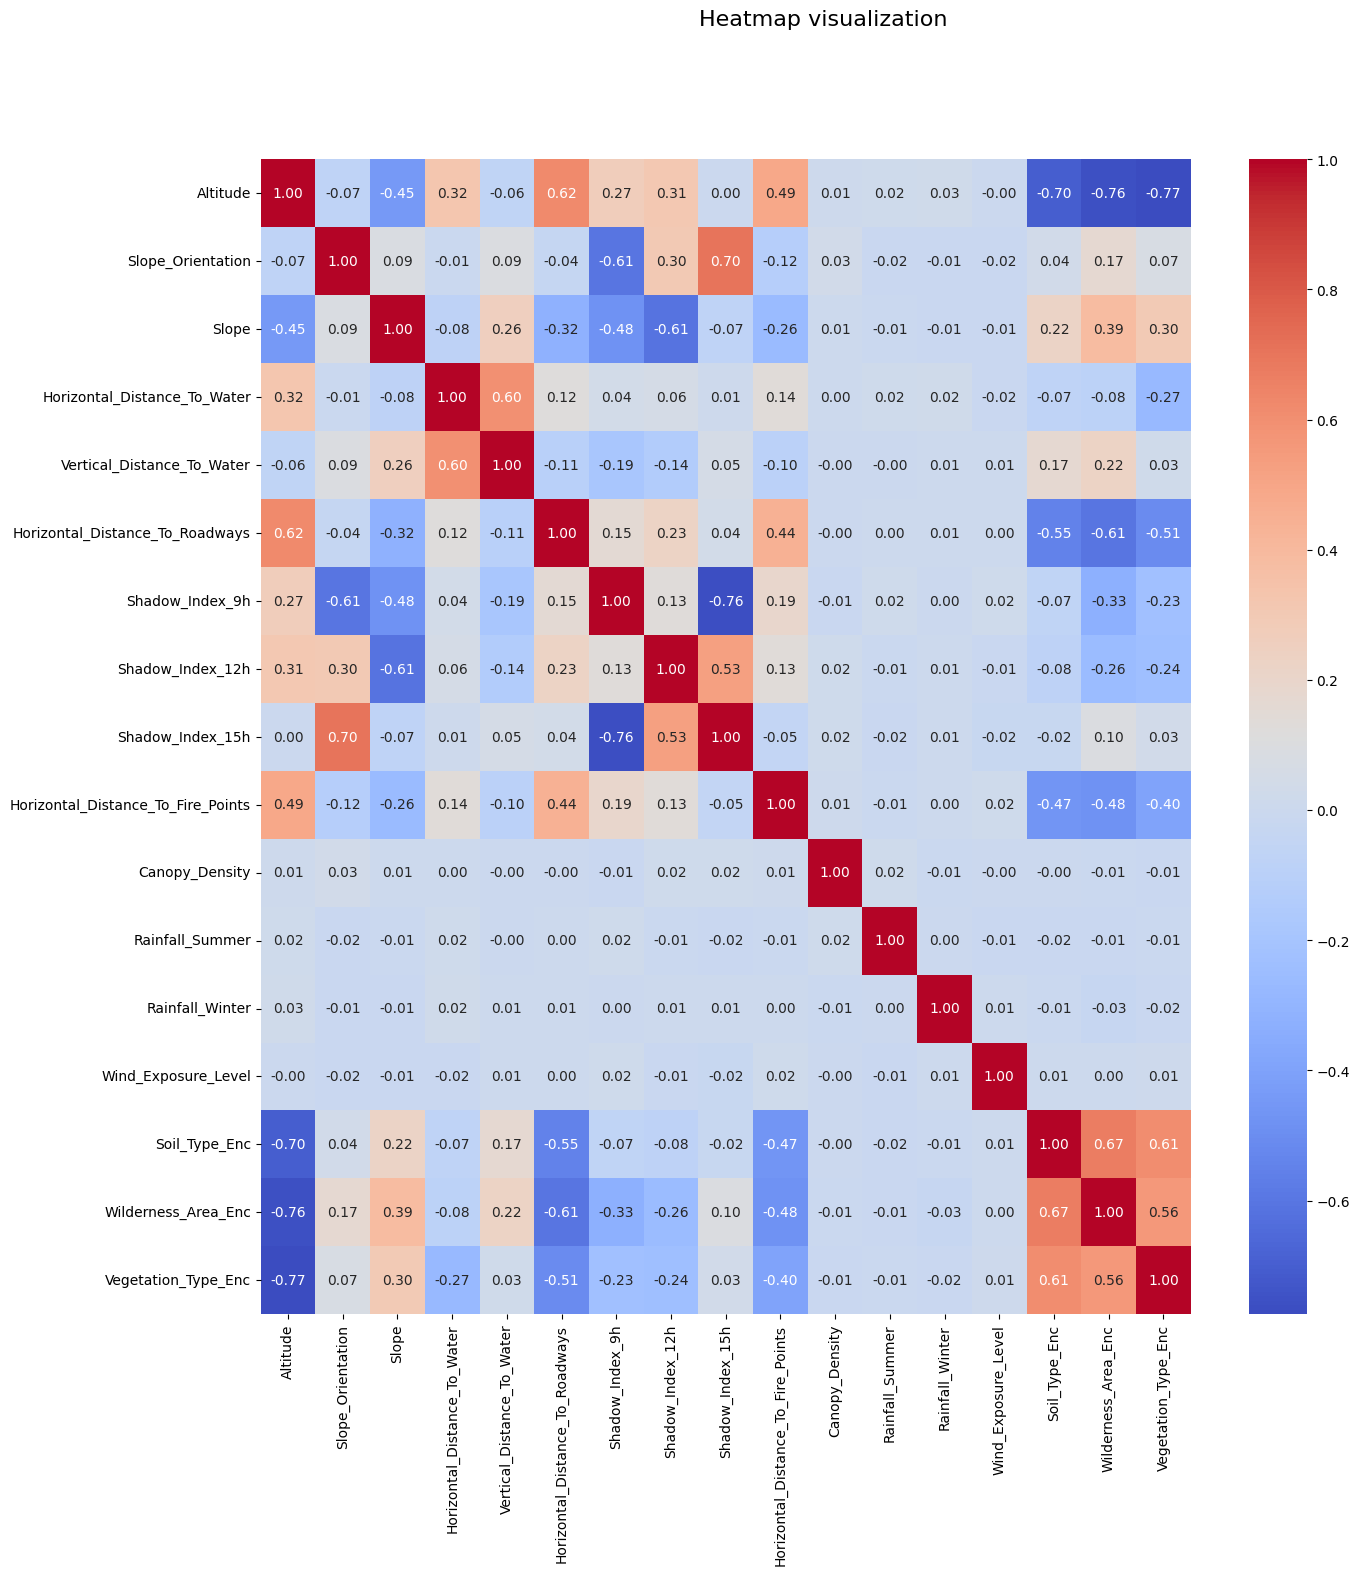

In [13]:
# Generate heatmap of the data

heatmap_visualization(encoded_data_without_id, 'Heatmap visualization')

The correlation of the features with the target column varies a lot and we can see that we have both highly correlated and uncorrelated features. The first ones may be the most important for our analysis, while the second ones may not provide any benefit.
In the next step, the columns with close to 0 correlation with the target column will be deleted, seeing as these do not provide any benefit to our analysis.

This applies to the following columns:
- Canopy_Density
- Rainfall_Summer
- Rainfall_Winter
- Wind_Exposure_Level

In [14]:
# Removing the columns without any correlation

encoded_data_without_id = encoded_data_without_id.drop(['Canopy_Density', 'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level'], axis=1)

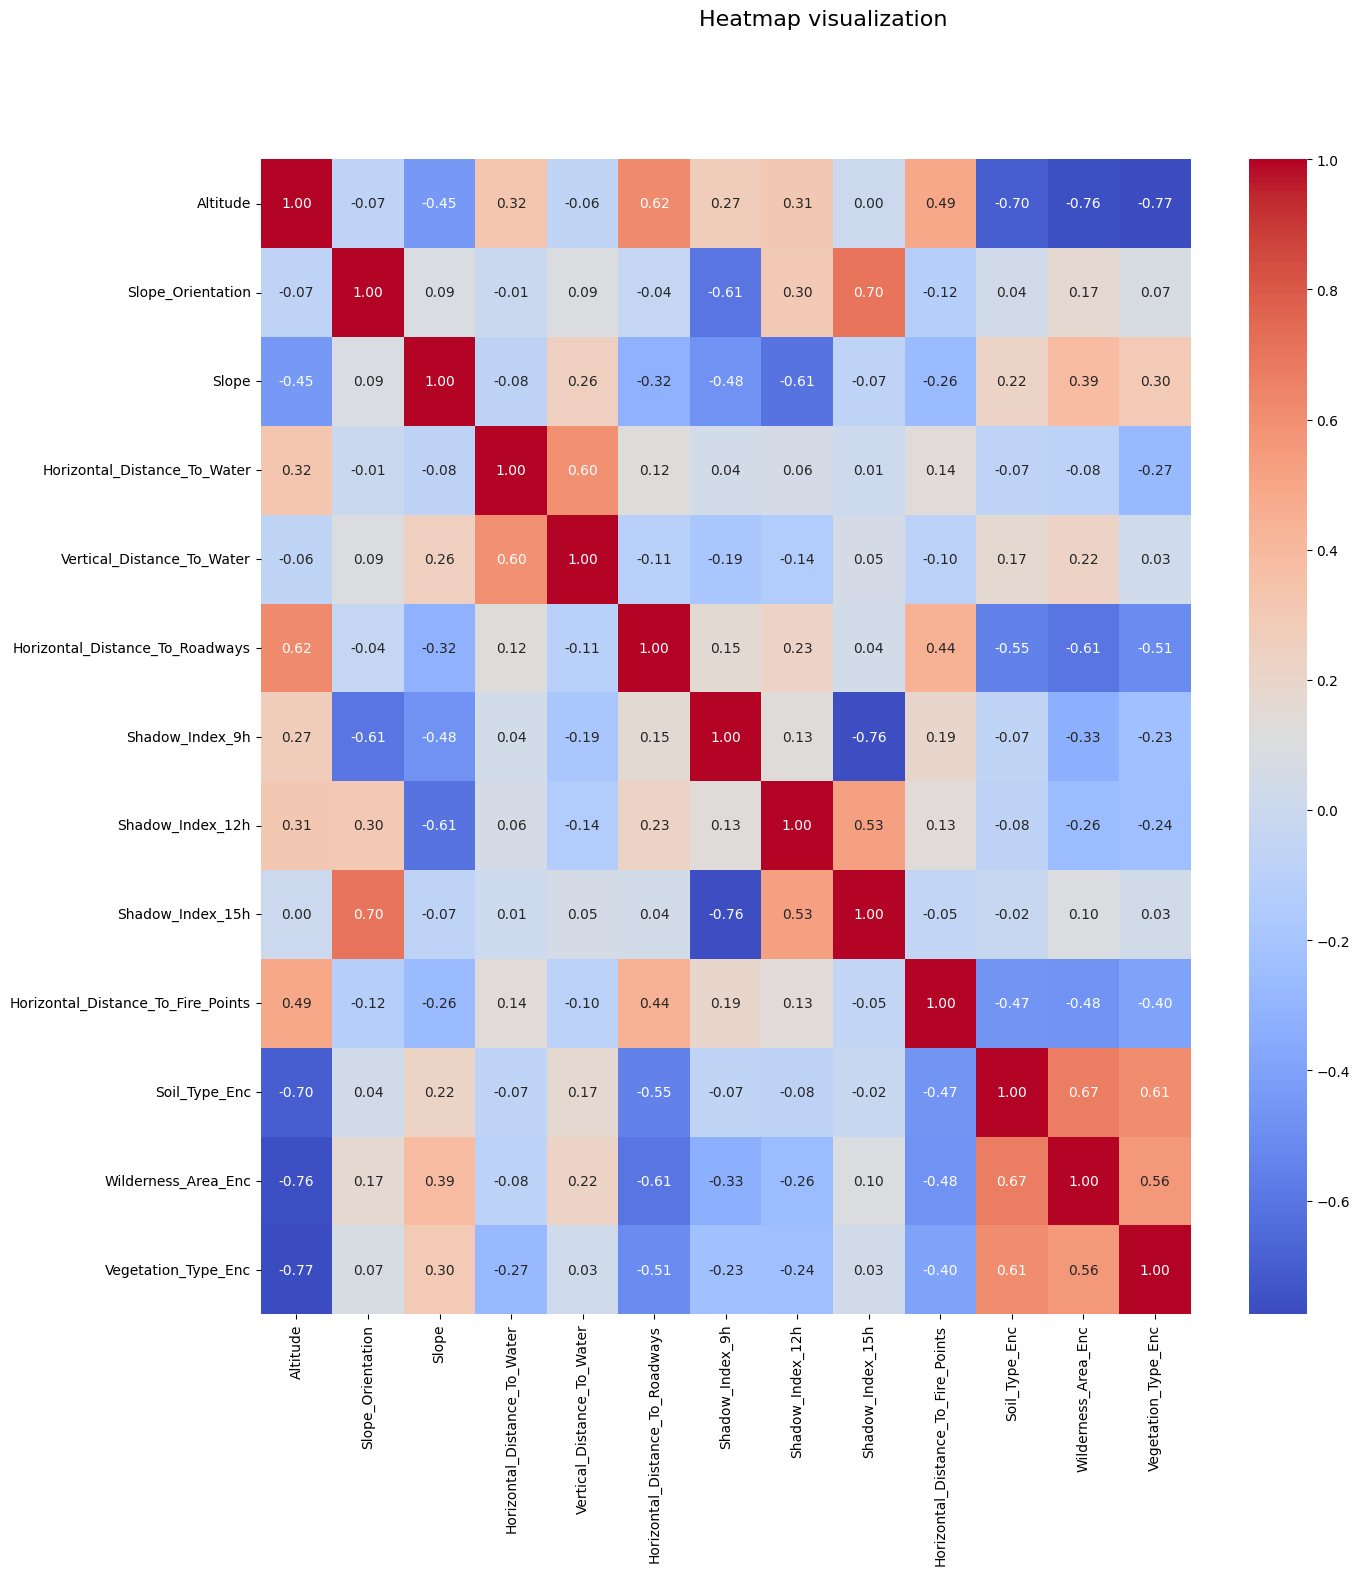

In [15]:
# Generate the heatmap of the data after removing the columns

heatmap_visualization(encoded_data_without_id, 'Heatmap visualization')

- Without the columns that do not correlate with the target column, we can see that the correlation between the features and the target column is more evident. All these columns may help, to some extent, to predict the target column.

In [16]:
# Display the correlation matrix

corr_matrix = encoded_data_without_id.corr(numeric_only=True)
corr_matrix['Vegetation_Type_Enc'].sort_values()

Altitude                             -0.774637
Horizontal_Distance_To_Roadways      -0.510261
Horizontal_Distance_To_Fire_Points   -0.400223
Horizontal_Distance_To_Water         -0.269011
Shadow_Index_12h                     -0.238884
Shadow_Index_9h                      -0.227859
Vertical_Distance_To_Water            0.028331
Shadow_Index_15h                      0.034780
Slope_Orientation                     0.074433
Slope                                 0.298247
Wilderness_Area_Enc                   0.560754
Soil_Type_Enc                         0.608980
Vegetation_Type_Enc                   1.000000
Name: Vegetation_Type_Enc, dtype: float64

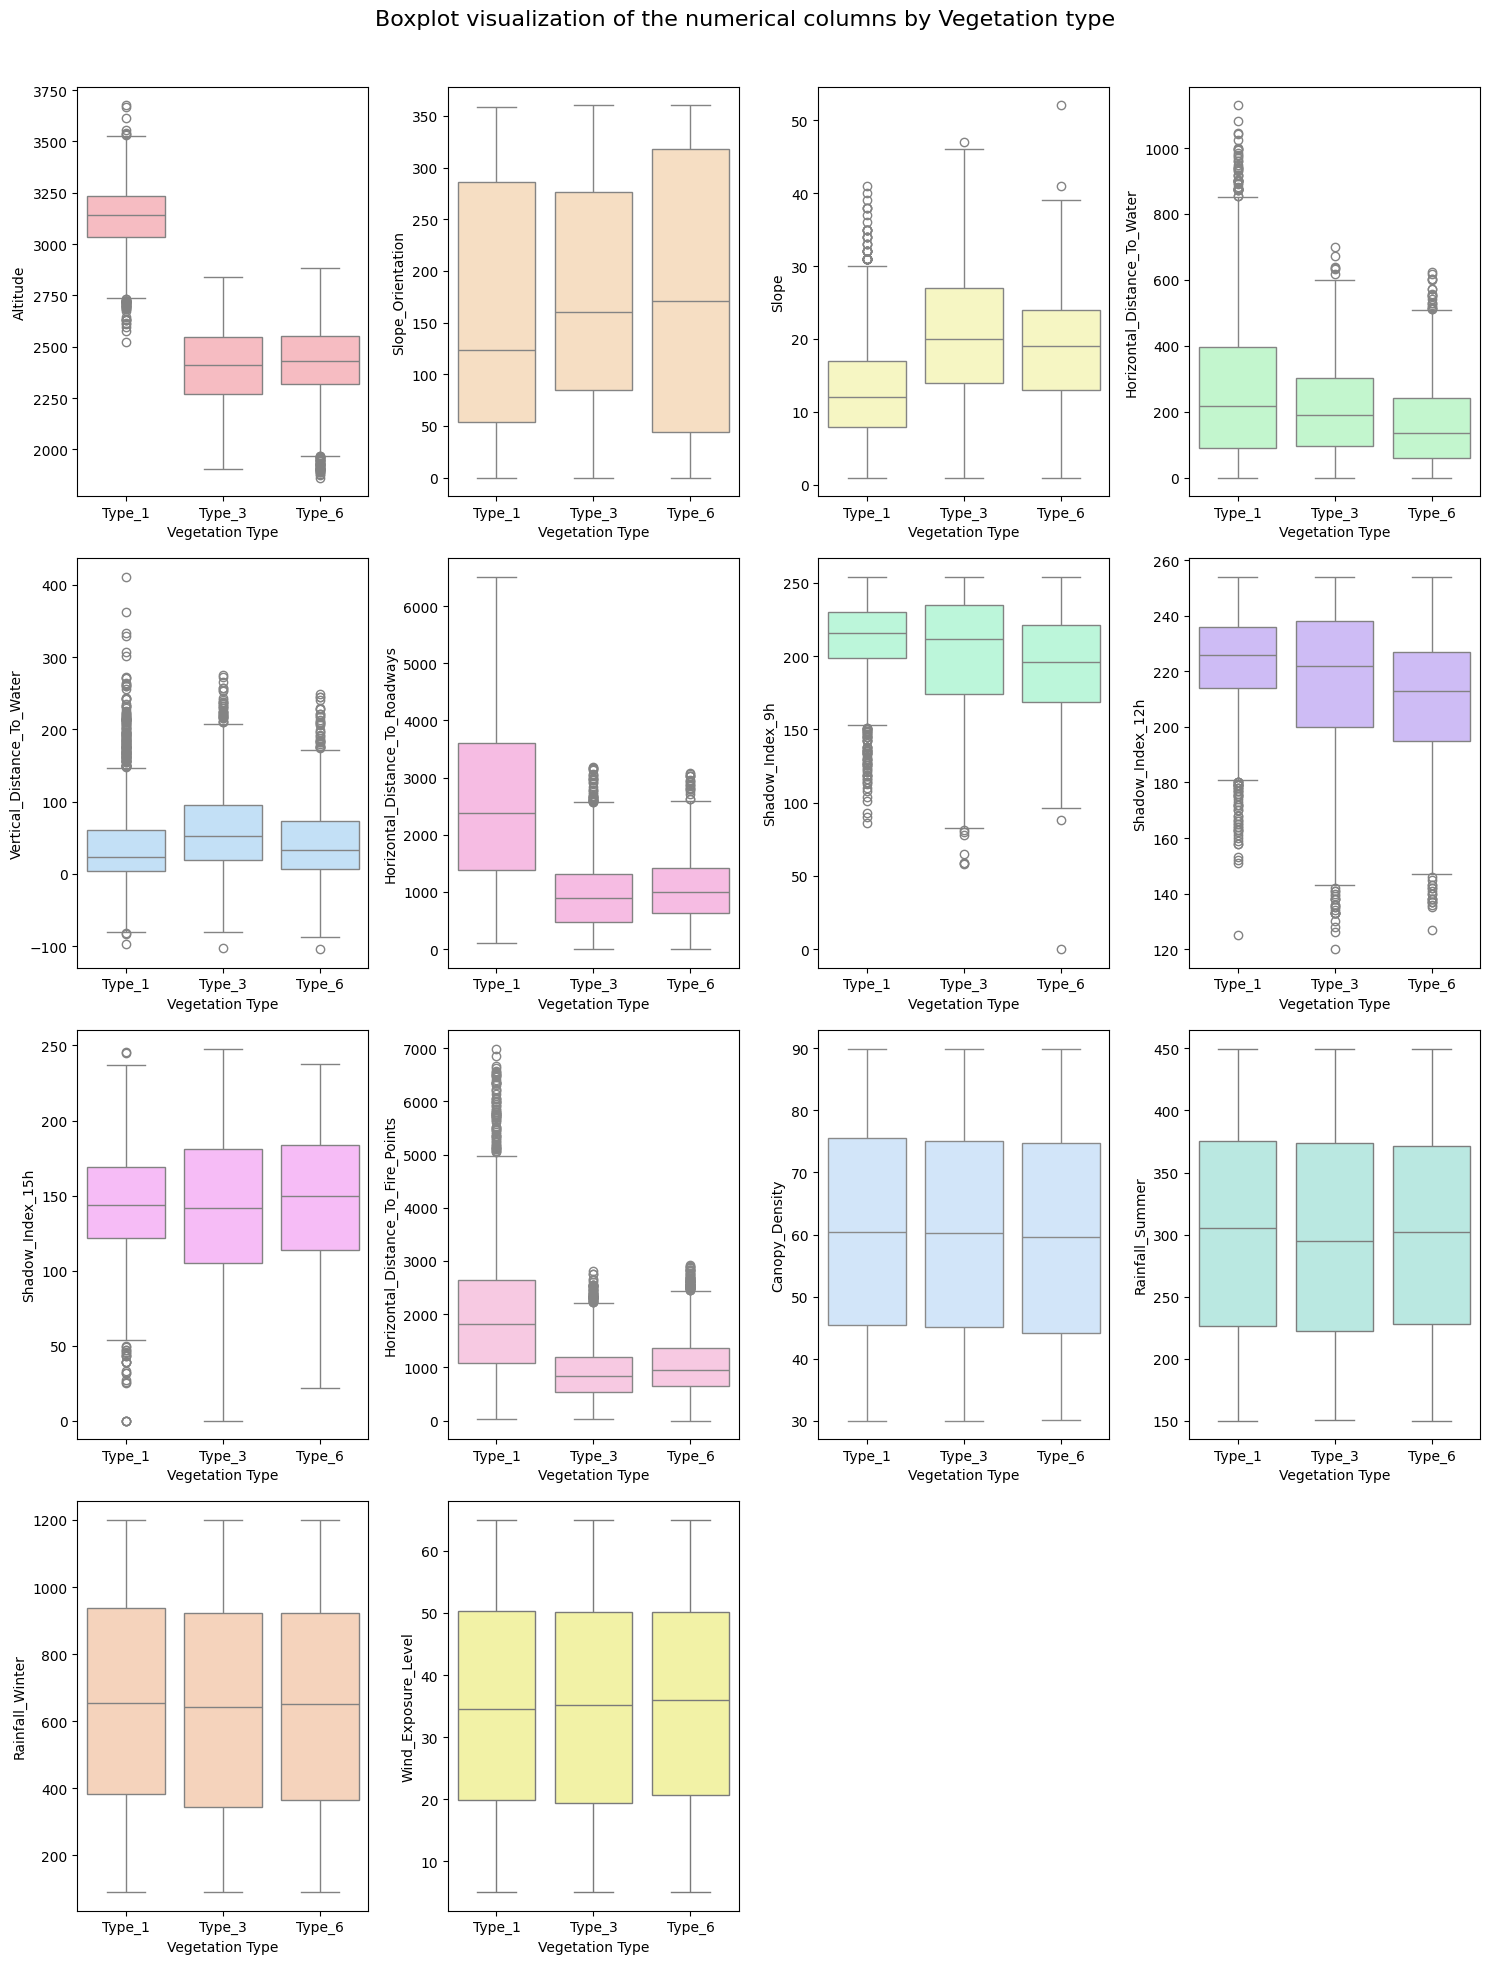

In [17]:
# Draw the boxplot visualizations of the numerical columns by Vegetation type (Target variable)

boxplot_by_type_visualization(data, numerical_columns, 'Boxplot visualization of the numerical columns by Vegetation type')

- In the boxplots there are some columns that have outliers for each different Vegetation_Type.
- Some features like the Altitude, Horizontal_Distance_To_Roadways, slope and Horizontal_Distance_To_Fire_Points have very distinct boxes for the Type_1 of the target variable. This indicates that these columns might be very good predictors of the label.

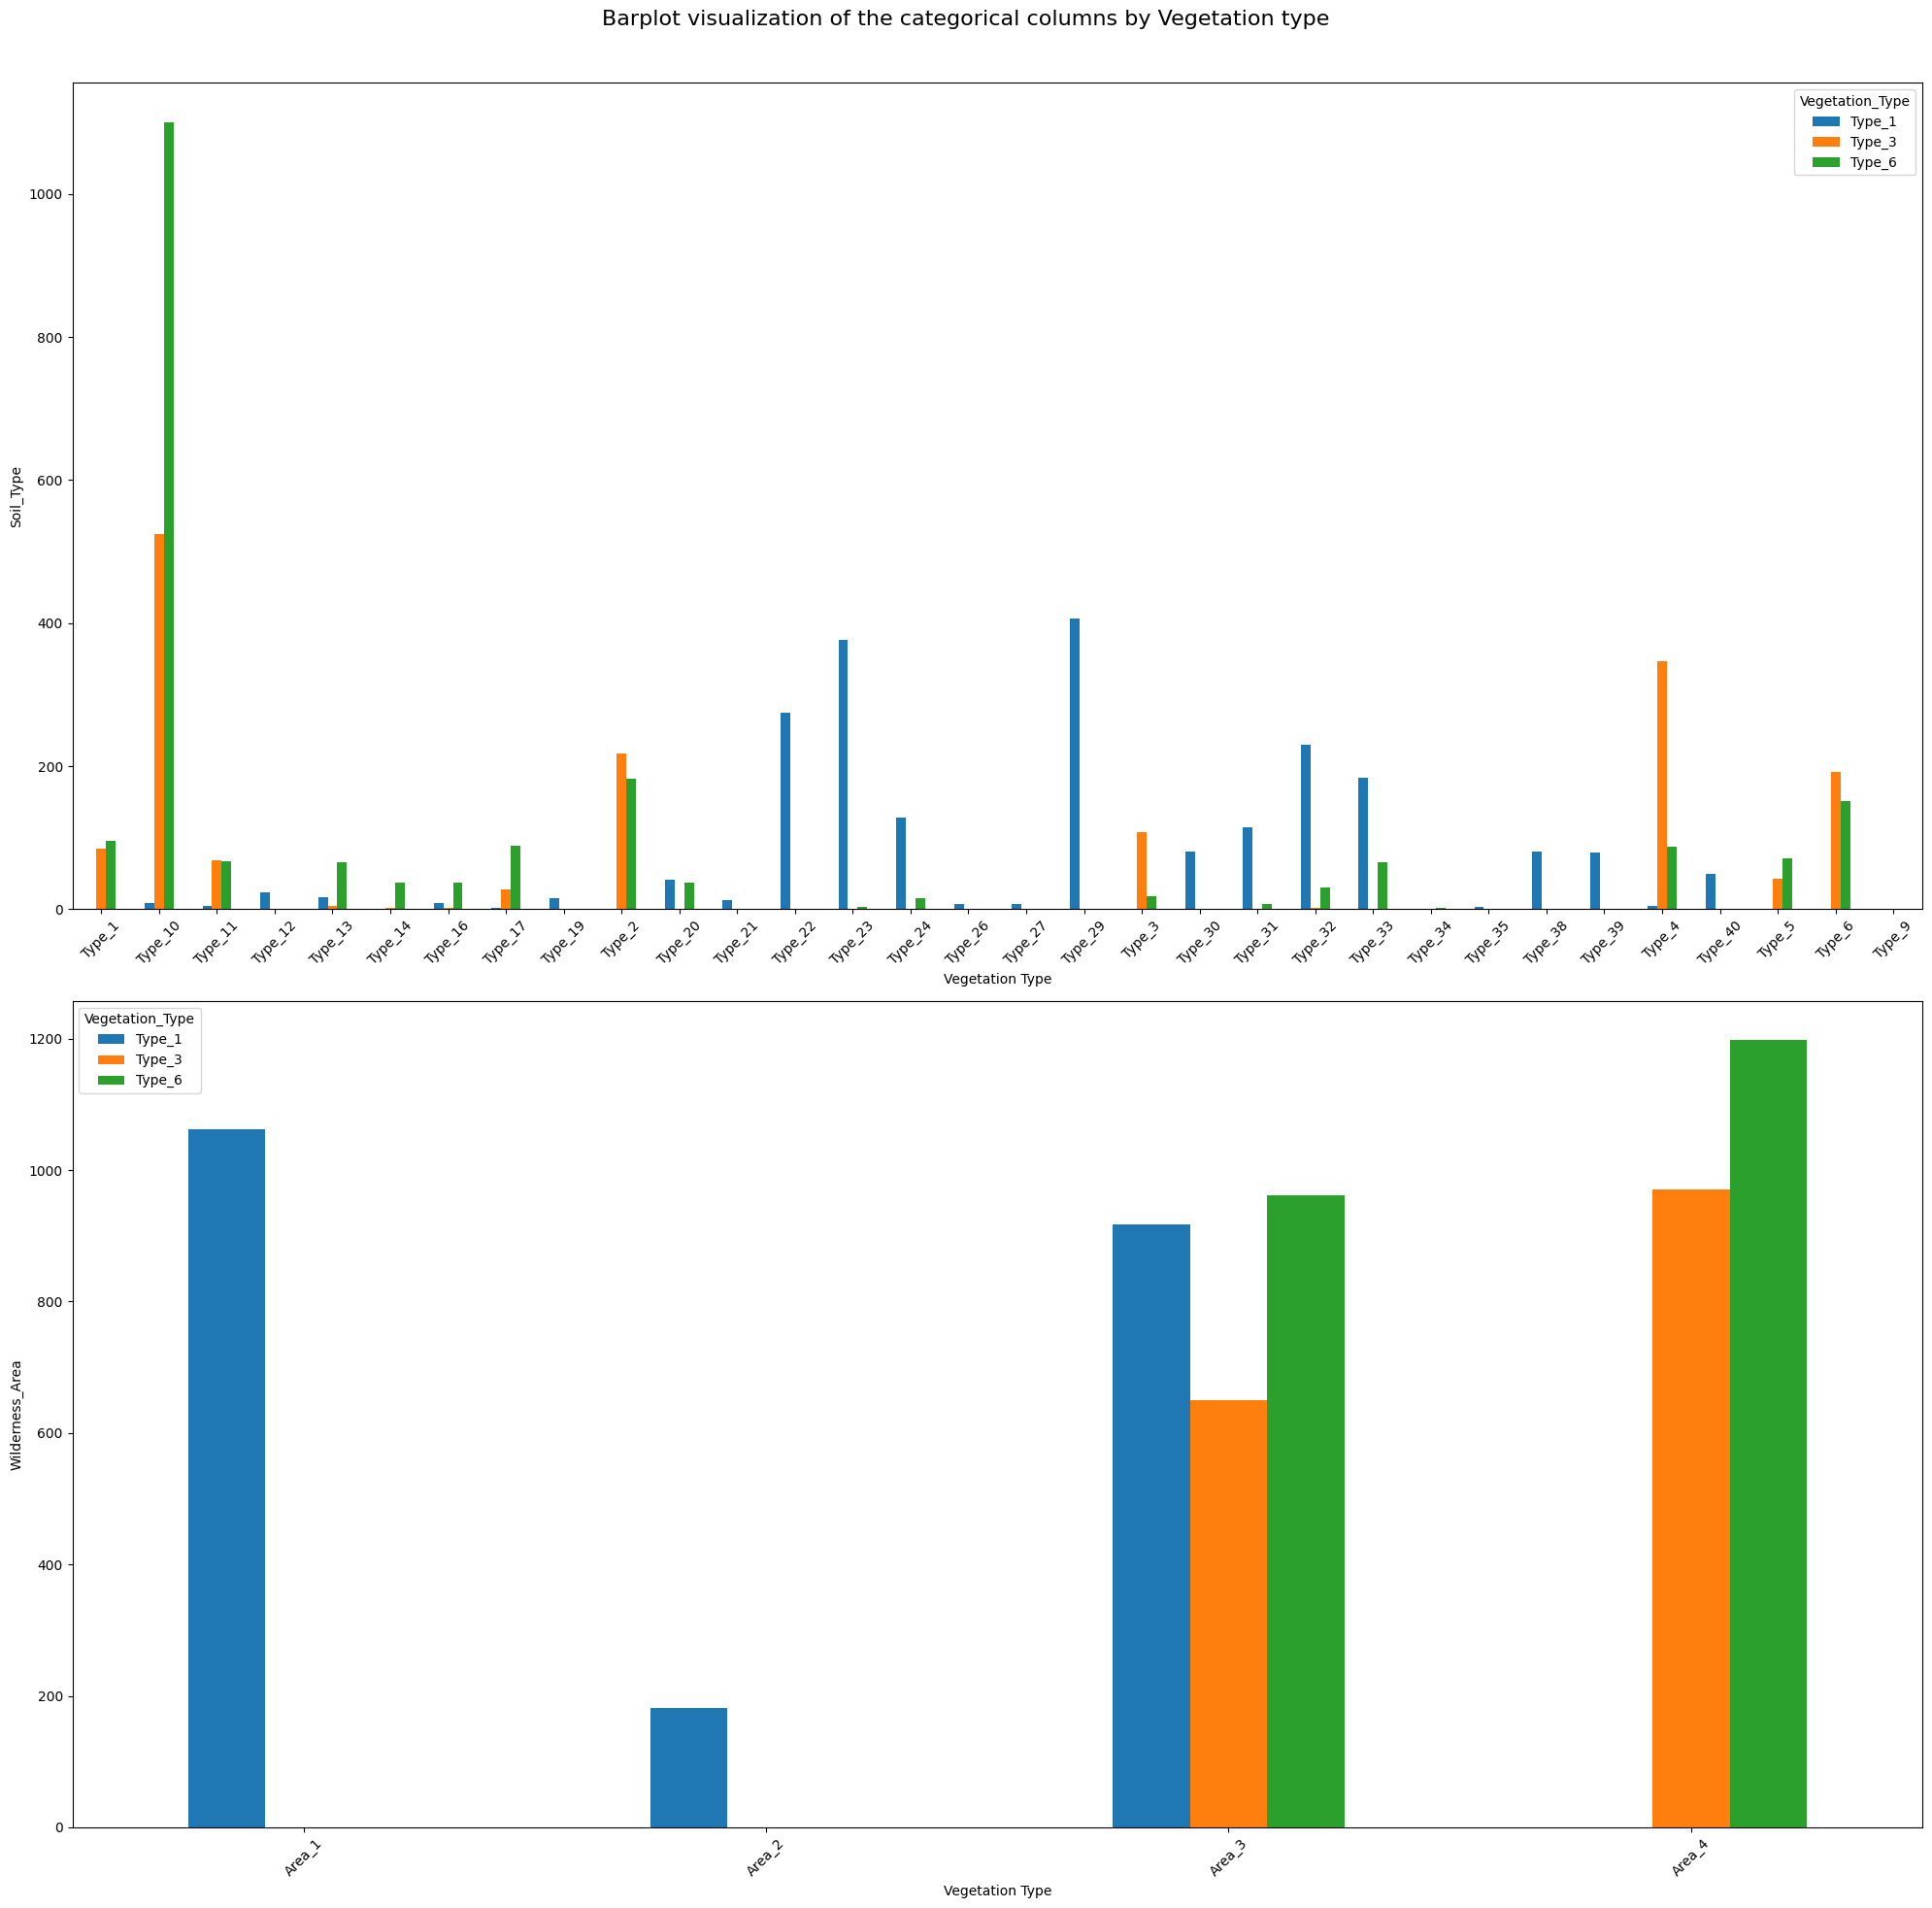

In [18]:
# Draw the crosstable visualizations of the numerical columns by Vegetation type (Target variable)

crosstab_by_type_visualization(data, categorical_columns, 'Barplot visualization of the categorical columns by Vegetation type')

- The crosstables show that some values of the categorical features are more frequent or even exclusive in some classes than in others. This indicates that these columns may be good predictors of the target variable.

## Methods Application

In [19]:
# Load the models to be evaluated

models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis()
}

### Data Preparation

In [20]:
# Divide the data into features and target variable and separate the training and test data

X = encoded_data.drop(columns=['Vegetation_Type', 'Soil_Type', 'Wilderness_Area','Vegetation_Type_Enc', 'Id'])
y = encoded_data['Vegetation_Type_Enc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Rescales each feature to have a mean of 0 and a standard deviation of 1

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Dataframe to store the metrics for each model and method

data_results = pd.DataFrame(columns=['Model', 'Method', 'Accuracy', 'Precision', 'Recall', 'F1', 'Std Dev', 'Confusion Matrix'])

- Since our dataset is balanced, we can use the accuracy metric to evaluate the models since it gives us a good overview of the model's performance.
- It is also useful to use the precision, recall to ensure that the model is not biased towards a specific class. Given the fact that we want to balance the precision and recall, the F1 score is a good metric to use.
- The confusion matrix will help identify misclassifications since it shows the number of correct and incorrect predictions for each class.

### Holdout Method

In [23]:
holdout_evaluation(data_results,models, X, y)

### Cross Validation (K=5)

In [24]:
cross_validation_evaluation(data_results,models, X, y, 5)

### Cross Validation (K=10)

In [25]:
cross_validation_evaluation(data_results,models, X, y, 10)

### Leave One Out Cross Validation (LOOCV)

In [26]:
loocv_evaluation(data_results, models, X, y)

### Bootstrap

In [27]:
bootstrap_evaluation(data_results, models,X, y, 100)

### Results 

In [28]:
# Display the dataframe with the metrics for each model and method

data_results

Model                    Method  Accuracy  Precision  \
0   Logistic Regression                  Houldout  0.802694   0.803416   
1                   LDA                  Houldout  0.799270   0.800241   
2                   QDA                  Houldout  0.809484   0.811471   
3   Logistic Regression   Cross-Validation with 5  0.798822   0.799251   
4                   LDA   Cross-Validation with 5  0.794444   0.794859   
5                   QDA   Cross-Validation with 5  0.805724   0.807798   
6   Logistic Regression  Cross-Validation with 10  0.799663   0.800198   
7                   LDA  Cross-Validation with 10  0.795118   0.796028   
8                   QDA  Cross-Validation with 10  0.808923   0.811558   
9   Logistic Regression               LeaveOneOut  0.799158   0.799158   
10                  LDA               LeaveOneOut  0.794781   0.794781   
11                  QDA               LeaveOneOut  0.807071   0.807071   
12  Logistic Regression                 Bootstrap  0.797200   0.797263   
13                  LDA                 Bootstrap  0.793826   0.794135   
14                  QDA                 Bootstrap  0.805520   0.807471   

      Recall        F1   Std Dev  \
0   0.802694  0.799051  0.006209   
1   0.799270  0.794730  0.005353   
2   0.809484  0.807627  0.011984   
3   0.798822  0.794894  0.005952   
4   0.794444  0.789895  0.006700   
5   0.805724  0.803017  0.005172   
6   0.799663  0.795706  0.020797   
7   0.795118  0.790459  0.018763   
8   0.808923  0.806046  0.014526   
9   0.799158  0.799158  0.400630   
10  0.794781  0.794781  0.403861   
11  0.807071  0.807071  0.394598   
12  0.797200  0.793475  0.007160   
13  0.793826  0.789198  0.007363   
14  0.805520  0.802985  0.007647   

                                     Confusion Matrix  
0   [[6391, 11, 90], [5, 2673, 2191], [59, 1160, 5...  
1   [[6388, 12, 92], [1, 2596, 2272], [97, 1103, 5...  
2   [[6320, 50, 122], [0, 2840, 2029], [25, 1169, ...  
3     [[2130, 3, 27], [2, 870, 748], [15, 400, 1745]]  
4     [[2126, 3, 31], [0, 851, 769], [31, 387, 1742]]  
5     [[2107, 14, 39], [0, 908, 712], [7, 382, 1771]]  
6     [[2129, 3, 28], [1, 874, 745], [17, 396, 1747]]  
7     [[2125, 4, 31], [0, 849, 771], [30, 381, 1749]]  
8     [[2106, 14, 40], [0, 912, 708], [8, 365, 1787]]  
9     [[2130, 3, 27], [2, 875, 743], [19, 399, 1742]]  
10    [[2126, 4, 30], [0, 846, 774], [31, 380, 1749]]  
11    [[2108, 14, 38], [0, 910, 710], [7, 377, 1776]]  
12  [[78607, 129, 1006], [121, 32093, 27189], [678...  
13  [[78504, 140, 1098], [16, 31121, 28266], [1152...  
14  [[77801, 554, 1387], [38, 33514, 25851], [252,...

- As we can see above, the models have similar results since the accuracy, precision, recall and F1 scores are in the range of 0.78 to 0.80. This can indicate that the performance of the models is consistent.
- As the variance equals to the square of the standard deviation, we can conclude that the resampling method have an impact on the results. The methods with the lowest variance are the Cross Validation with K=5 and the Bootstrap. Cross Validation with K=10 has the highest variance and Holdout method does not have a variance since it is a single split. 

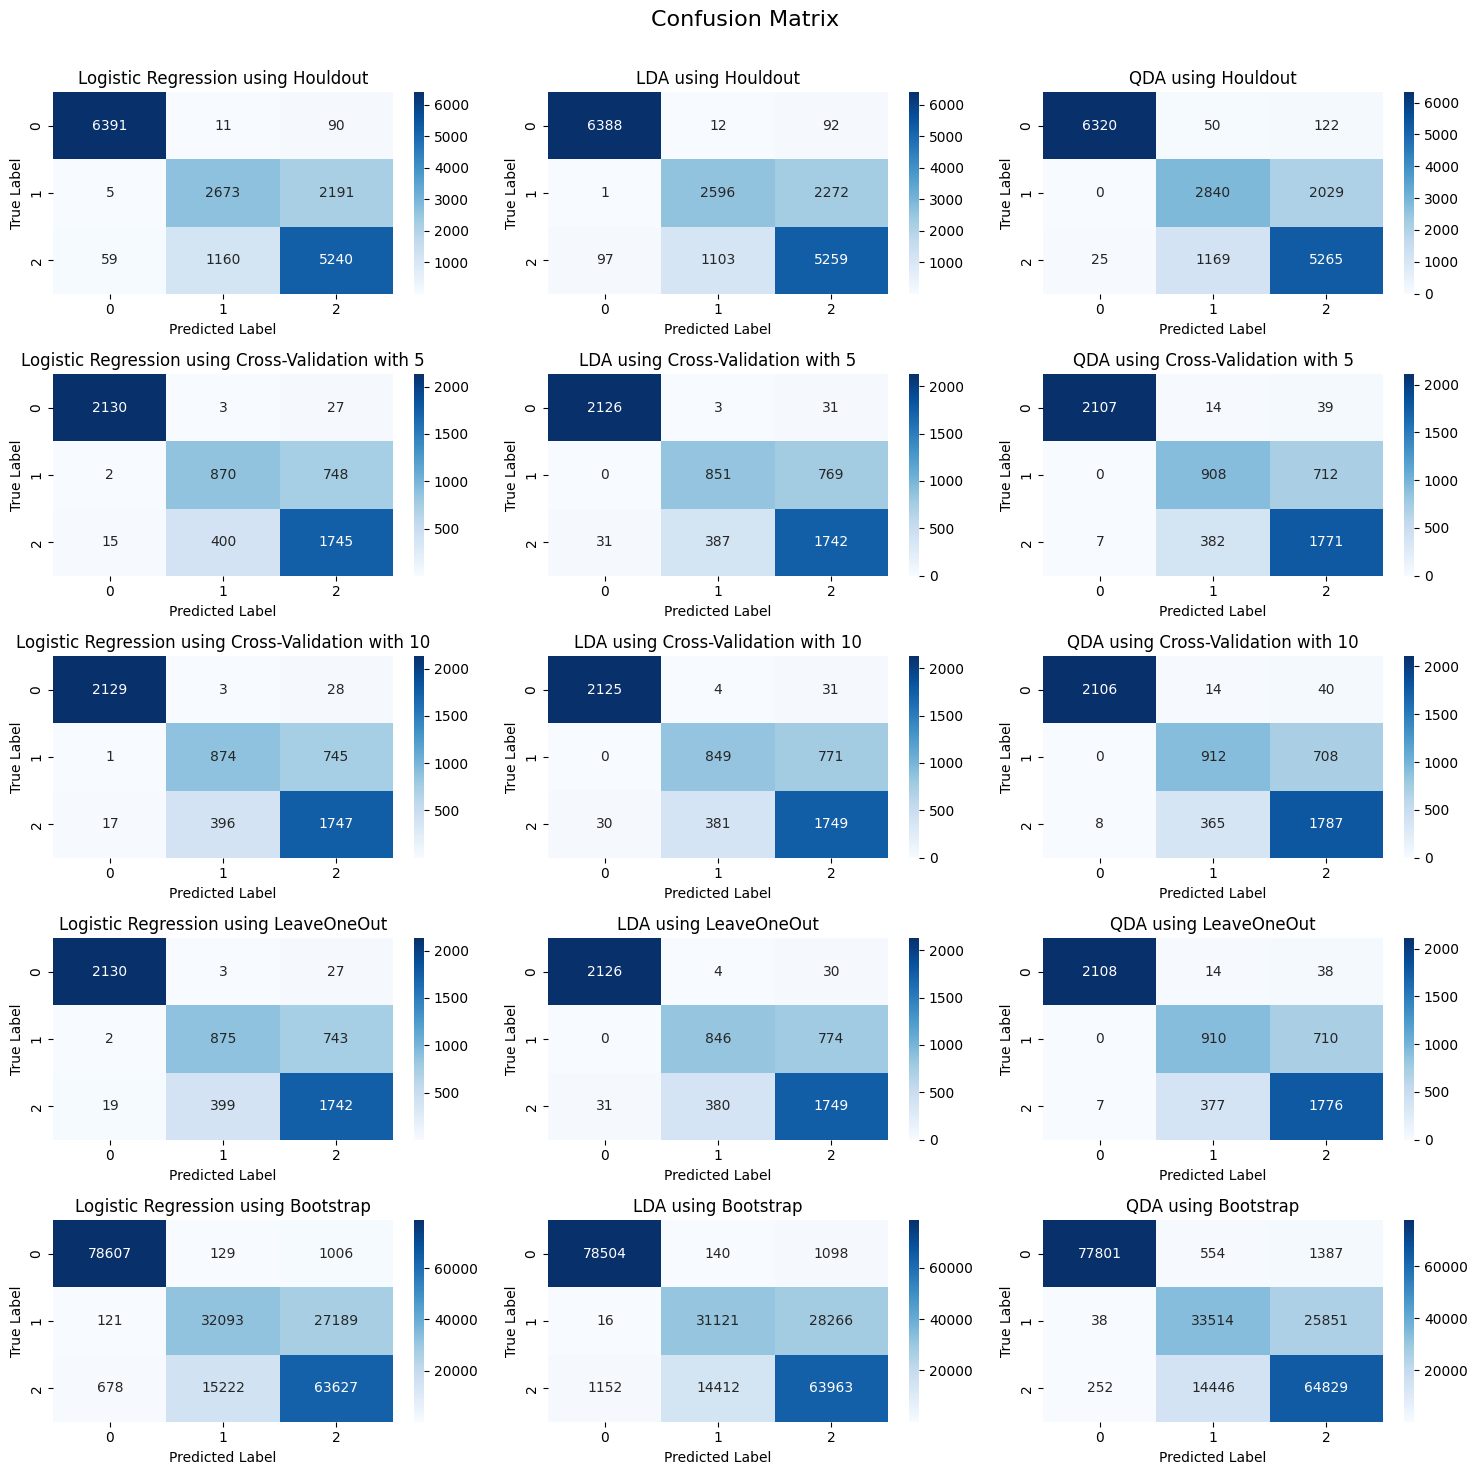

In [29]:
confusion_matrix_visualization(data_results, 'Confusion Matrix')

With theses confusion matrices, we can see that the all the models can easily identify the first Vegetation Type, while for the other two, it has more difficulty distinguishing them, resulting in a lot of wrong predictions. This is expected considering that, as we saw in our analysis before, there aren't many features which provide a distinction between the Vegetation Types 3 and 6.

In order to improve the results we need to optimize the parameters of the Logistic regression model using the regularization methods of Lasso, Ridge and Elastic Net

## Feature Selection

### Find the best range for C

In [30]:
# store the results of the best parameters and score for each method

columns_name = X.columns.tolist()
result_lasso = {'C':[], 'score': []}
result_ridge = {'C': [], 'score': []}
result_elasticnet = {'C': [], 'score': [], 'l1_ratio':[]}

In [31]:
# initialize the model we will use

model = LogisticRegression()

We will use search for the best value of the C parameter, which represents the inverse of regularization strength, utilizing different penalties that represent different regularization methods. We decided to use the solver "saga" since it is compatible with the three methods.

#### Lasso
##### 0 - 1

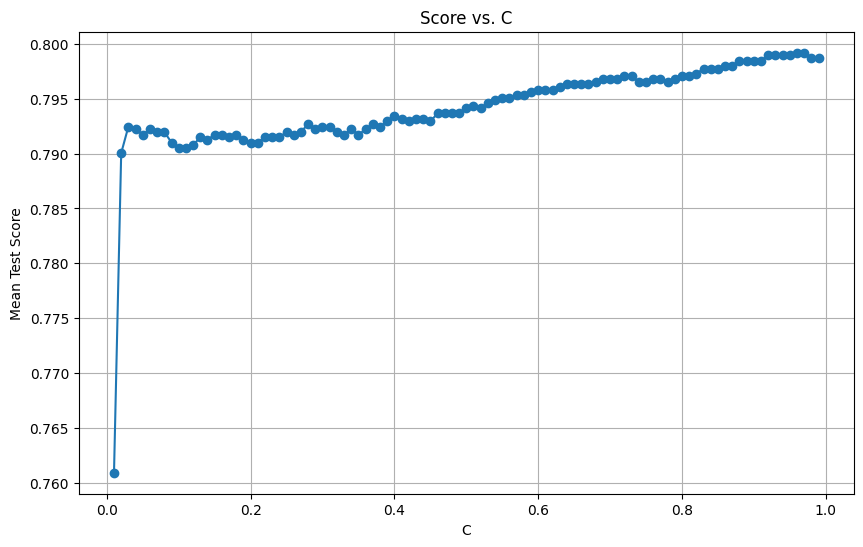

Best parameters: {'C': 0.96, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.7991796260298065


In [32]:
# Define the parameters we will test, setting C values from 0 to 1 in increments of 0.01

parameters = {'C': np.arange(0, 1, 0.01), 
              'penalty': ['l1'], 
              'solver': ['saga']}

result_lasso = best_feature_grid_search_visualization(X_train, y_train, parameters, model, result_lasso)

#### 1 - 10

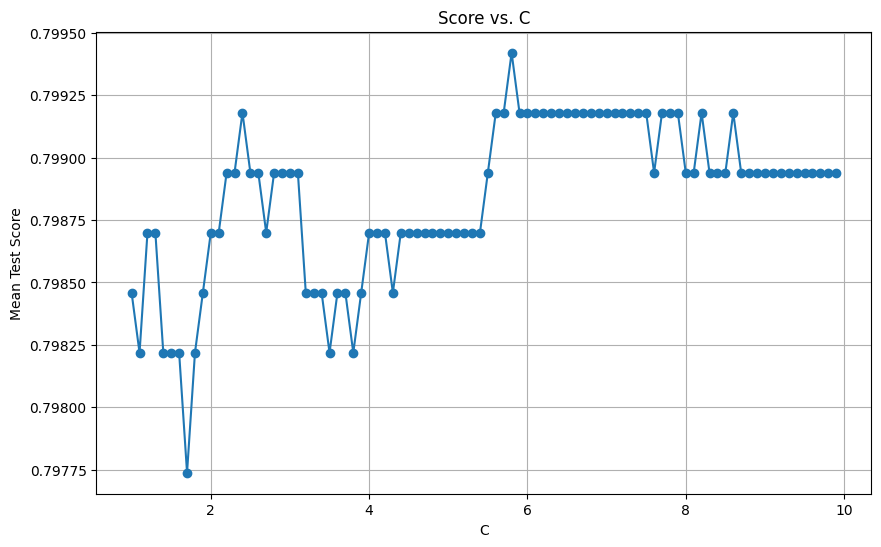

Best parameters: {'C': 5.800000000000004, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.7994205891881885


In [33]:
# Define the parameters we will test, setting C values from 1 to 200 in increments of 1

parameters = {'C': np.arange(1,10, 0.1), 
              'penalty': ['l1'], 
              'solver': ['saga']}

result_lasso = best_feature_grid_search_visualization(X_train, y_train, parameters, model, result_lasso)

#### Rigde 
##### 0 - 1

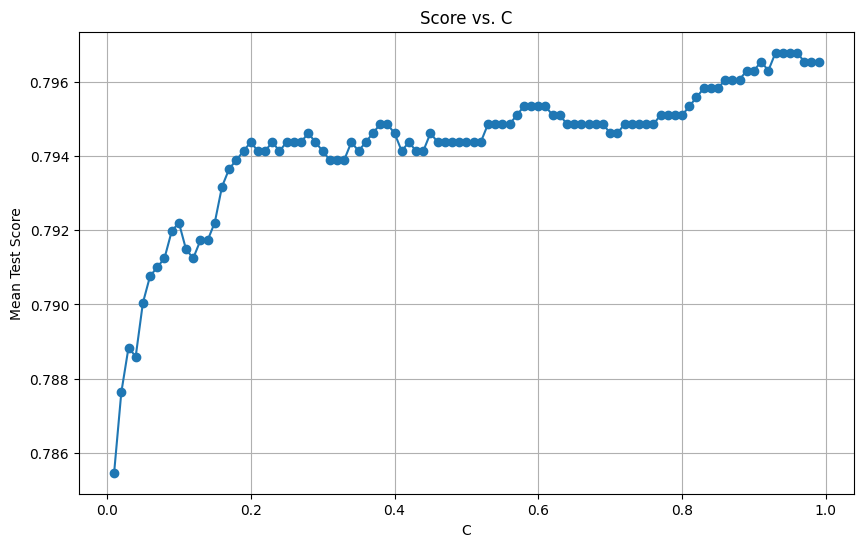

Best parameters: {'C': 0.93, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.7967757798759604


In [34]:
# Define the parameters we will test, setting C values from 0 to 1 in increments of 0.01

parameters = {'C': np.arange(0, 1, 0.01), 
              'penalty': ['l2'], 
              'solver': ['saga']}
result_ridge = best_feature_grid_search_visualization(X_train, y_train, parameters, model, result_ridge)

##### 1 - 10

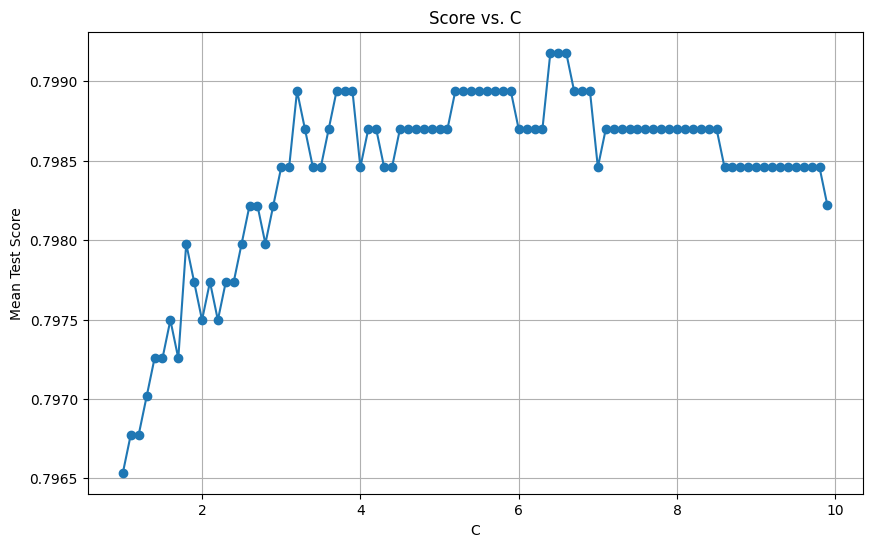

Best parameters: {'C': 6.400000000000005, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.7991804938443025


In [35]:
# Define the parameters we will test, setting C values from 1 to 200 in increments of 1

parameters = {'C': np.arange(1,10, 0.1), 
              'penalty': ['l2'], 
              'solver': ['saga']}

result_ridge = best_feature_grid_search_visualization(X_train, y_train, parameters, model, result_ridge)

#### Elastic Net
##### 0 - 1

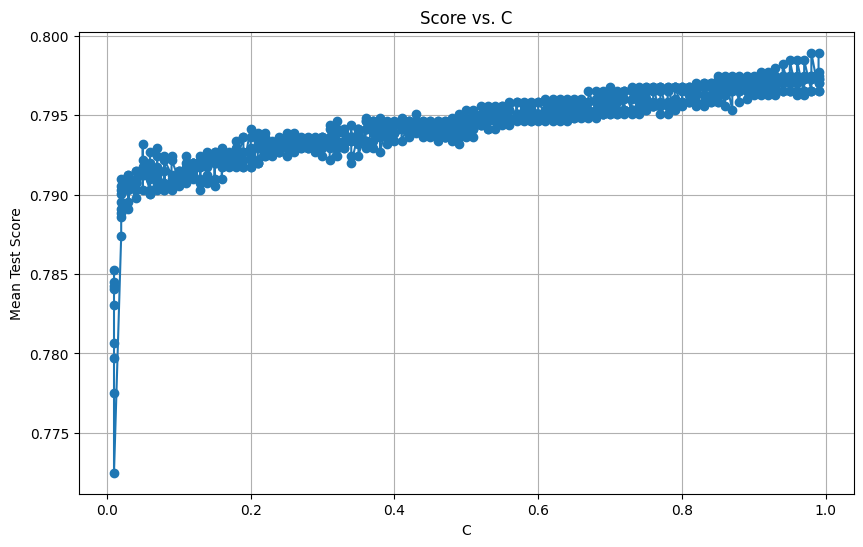

Best parameters: {'C': 0.98, 'l1_ratio': 0.9, 'penalty': 'elasticnet', 'solver': 'saga'}
Best Score: 0.7989389521429233


In [36]:
# Define the parameters we will test, setting C values from 0 to 1 in increments of 0.01

parameters = {'C': np.arange(0,1, 0.01), 
              'penalty': ['elasticnet'], 
              'solver': ['saga'],
              'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

result_elasticnet = best_feature_grid_search_visualization(X_train, y_train, parameters, model, result_elasticnet)

##### 1 - 10

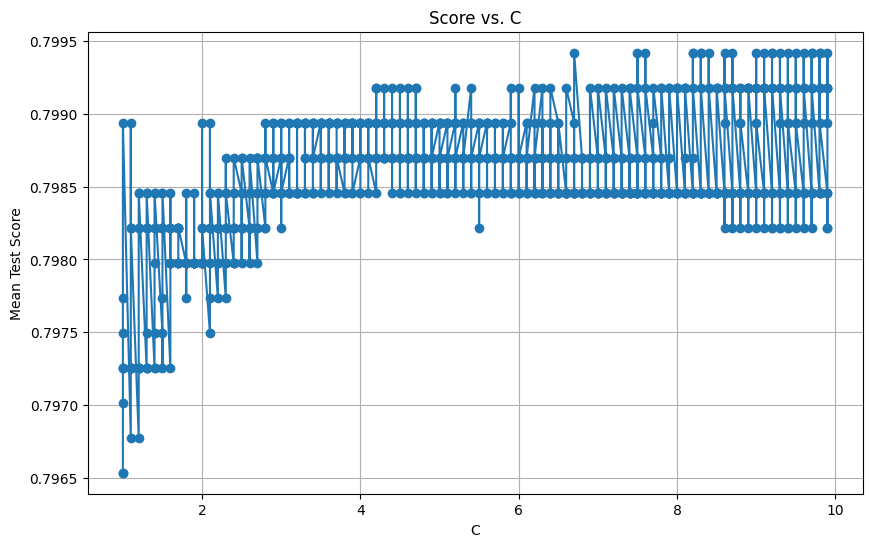

Best parameters: {'C': 6.700000000000005, 'l1_ratio': 0.9, 'penalty': 'elasticnet', 'solver': 'saga'}
Best Score: 0.7994202999166897


In [37]:
# Define the parameters we will test, setting C values from 1 to 200 in increments of 1

parameters = {'C': np.arange(1,10, 0.1), 
              'penalty': ['elasticnet'], 
              'solver': ['saga'],
              'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

result_elasticnet = best_feature_grid_search_visualization(X_train, y_train, parameters, model, result_elasticnet)

Since the scores of the regularization models are all close to 80%, we will consider lasso as the best one since it also removes features, making the data and models simpler. 

##### Lasso

In [38]:
# Select the optimal regularization method between Lasso and Ridge, then perform a detailed search within a refined range around the previously identified best C value
c = np.arange(result_lasso['C'] - 0.5 ,result_lasso['C'] + 0.5 ,0.01)

parameters = {'C':c, 
              'penalty': ['l1'],  
              'solver': ['saga']}

best_feature_lasso = best_feature_grid_search(columns_name,X_train, y_train, parameters, model)

Best parameters: {'C': 5.809999999999993, 'penalty': 'l1', 'solver': 'saga'}
Feature Coefficients:
                               Feature  Coefficient
0                             Altitude     7.858858
1                    Slope_Orientation    -0.763519
2                                Slope     0.000000
3         Horizontal_Distance_To_Water     0.000000
4           Vertical_Distance_To_Water    -0.823335
5      Horizontal_Distance_To_Roadways     0.000000
6                      Shadow_Index_9h    -0.204420
7                     Shadow_Index_12h     0.442591
8                     Shadow_Index_15h     0.000000
9   Horizontal_Distance_To_Fire_Points     0.000000
10                      Canopy_Density     0.102580
11                     Rainfall_Summer    -0.043153
12                     Rainfall_Winter     0.102717
13                 Wind_Exposure_Level    -0.259885
14                       Soil_Type_Enc    -1.151491
15                 Wilderness_Area_Enc    -2.930942


We can observe that the best model gave more importance to the Altitude, Soil_Type_Enc and Wilderness_Area_Enc which is consistent with the analysis done earlier.

In [39]:
# Initialize the models with the best parameters

best_models_lr ={
    'Logistic Regression with Lasso': LogisticRegression(C=best_feature_lasso['C'], 
                                                         penalty=best_feature_lasso['penalty'], 
                                                         solver= 'saga')
}


### Holdout With Best Parameters

In [40]:
holdout_evaluation(data_results,best_models_lr, X, y)

### Cross Validation (K=5) With Best Parameters

In [41]:
cross_validation_evaluation(data_results, best_models_lr, X, y, 5)

### Cross Validation (K=10) With Best Parameters

In [42]:
cross_validation_evaluation(data_results,best_models_lr, X, y, 10)

### Leave One Out Cross Validation (LOOCV) With Best Parameters

In [43]:
loocv_evaluation(data_results, best_models_lr, X, y)

### Bootstrap With Best Parameters

In [44]:
bootstrap_evaluation(data_results, best_models_lr, X, y, 100)

### Results

In [45]:
data_results

Model                    Method  Accuracy  \
0              Logistic Regression                  Houldout  0.802694   
1                              LDA                  Houldout  0.799270   
2                              QDA                  Houldout  0.809484   
3              Logistic Regression   Cross-Validation with 5  0.798822   
4                              LDA   Cross-Validation with 5  0.794444   
5                              QDA   Cross-Validation with 5  0.805724   
6              Logistic Regression  Cross-Validation with 10  0.799663   
7                              LDA  Cross-Validation with 10  0.795118   
8                              QDA  Cross-Validation with 10  0.808923   
9              Logistic Regression               LeaveOneOut  0.799158   
10                             LDA               LeaveOneOut  0.794781   
11                             QDA               LeaveOneOut  0.807071   
12             Logistic Regression                 Bootstrap  0.797200   
13                             LDA                 Bootstrap  0.793826   
14                             QDA                 Bootstrap  0.805520   
15  Logistic Regression with Lasso                  Houldout  0.806173   
16  Logistic Regression with Lasso   Cross-Validation with 5  0.803535   
17  Logistic Regression with Lasso  Cross-Validation with 10  0.803199   
18  Logistic Regression with Lasso               LeaveOneOut  0.804714   
19  Logistic Regression with Lasso                 Bootstrap  0.799829   

    Precision    Recall        F1   Std Dev  \
0    0.803416  0.802694  0.799051  0.006209   
1    0.800241  0.799270  0.794730  0.005353   
2    0.811471  0.809484  0.807627  0.011984   
3    0.799251  0.798822  0.794894  0.005952   
4    0.794859  0.794444  0.789895  0.006700   
5    0.807798  0.805724  0.803017  0.005172   
6    0.800198  0.799663  0.795706  0.020797   
7    0.796028  0.795118  0.790459  0.018763   
8    0.811558  0.808923  0.806046  0.014526   
9    0.799158  0.799158  0.799158  0.400630   
10   0.794781  0.794781  0.794781  0.403861   
11   0.807071  0.807071  0.807071  0.394598   
12   0.797263  0.797200  0.793475  0.007160   
13   0.794135  0.793826  0.789198  0.007363   
14   0.807471  0.805520  0.802985  0.007647   
15   0.806624  0.806173  0.802820  0.005132   
16   0.803663  0.803535  0.799892  0.003515   
17   0.803453  0.803199  0.799434  0.022238   
18   0.804714  0.804714  0.804714  0.396421   
19   0.799647  0.799829  0.796267  0.007109   

                                     Confusion Matrix  
0   [[6391, 11, 90], [5, 2673, 2191], [59, 1160, 5...  
1   [[6388, 12, 92], [1, 2596, 2272], [97, 1103, 5...  
2   [[6320, 50, 122], [0, 2840, 2029], [25, 1169, ...  
3     [[2130, 3, 27], [2, 870, 748], [15, 400, 1745]]  
4     [[2126, 3, 31], [0, 851, 769], [31, 387, 1742]]  
5     [[2107, 14, 39], [0, 908, 712], [7, 382, 1771]]  
6     [[2129, 3, 28], [1, 874, 745], [17, 396, 1747]]  
7     [[2125, 4, 31], [0, 849, 771], [30, 381, 1749]]  
8     [[2106, 14, 40], [0, 912, 708], [8, 365, 1787]]  
9     [[2130, 3, 27], [2, 875, 743], [19, 399, 1742]]  
10    [[2126, 4, 30], [0, 846, 774], [31, 380, 1749]]  
11    [[2108, 14, 38], [0, 910, 710], [7, 377, 1776]]  
12  [[78607, 129, 1006], [121, 32093, 27189], [678...  
13  [[78504, 140, 1098], [16, 31121, 28266], [1152...  
14  [[77801, 554, 1387], [38, 33514, 25851], [252,...  
15  [[6400, 15, 77], [9, 2723, 2137], [51, 1165, 5...  
16    [[2132, 4, 24], [4, 892, 724], [16, 395, 1749]]  
17    [[2132, 4, 24], [3, 890, 727], [17, 394, 1749]]  
18    [[2133, 4, 23], [2, 892, 726], [14, 391, 1755]]  
19  [[78666, 162, 914], [192, 32544, 26667], [651,...

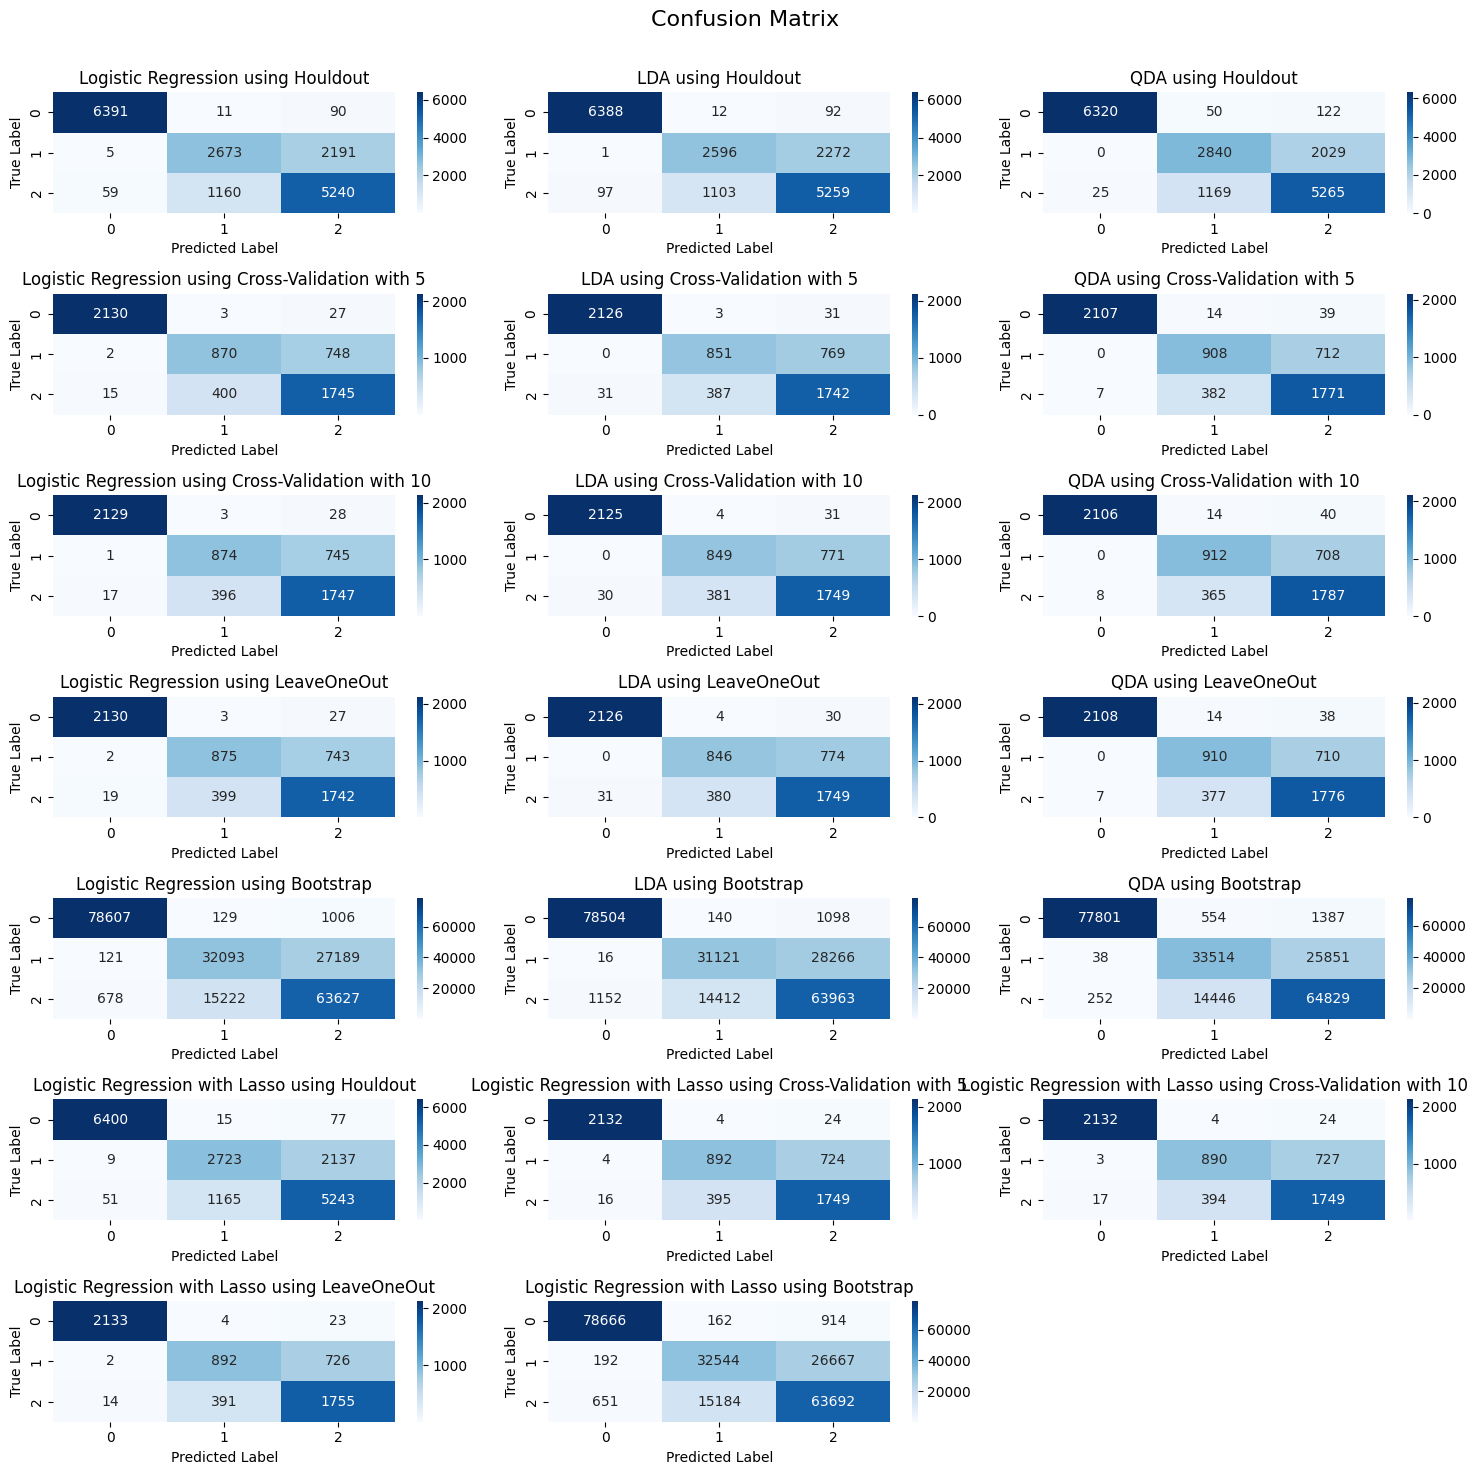

In [46]:
confusion_matrix_visualization(data_results, 'Confusion Matrix')

The results were not what we expected as there was only a small improvement, there still remains a big misclassification between the label 1 often often classified as 2.

## Get data with Dummies

We tried getting the dummies of the categorical classes and only using the columns that had correlation above 0.3 with the objective since we considered that smaller values could indicate no correlation at all and few columns had values higher. Surprisingly the results did not improve and we opted to discard that approach.

Next we will apply the Ridge, Lasso and Elastic net methods regularization methods and test with the dummies data.

In [47]:
# Drop the encoded columns and get the dummies of the categorical columns

new_data =encoded_data_without_id.drop(
    columns=[
        'Vegetation_Type',
        'Soil_Type_Enc',
        'Wilderness_Area_Enc'
    ]
)
data_dummies = pd.get_dummies(new_data)

In [48]:
# Generate the correlation matrix

corr_matrix = data_dummies.corr()
sorted_corr = corr_matrix['Vegetation_Type_Enc'].sort_values()

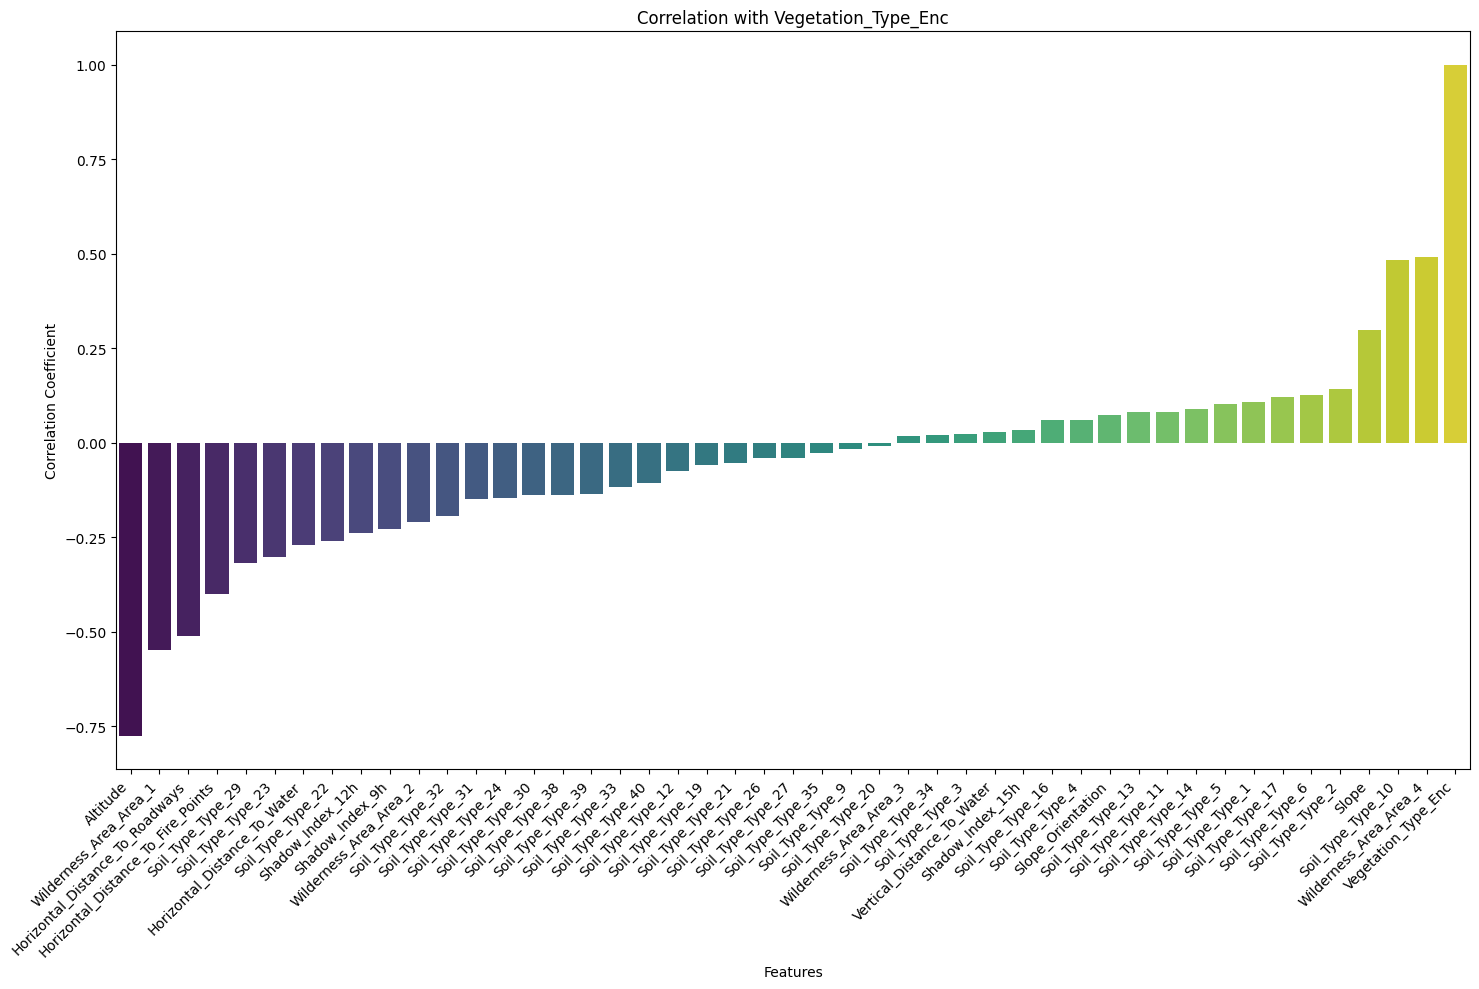

In [49]:
# Plotting the sorted correlations

barplot_correlation_visualization(sorted_corr, 'Correlation with Vegetation_Type_Enc')

The correlation of the features with the target column varies a lot and we can see that we have both highly correlated and uncorrelated features. We predict that the ones with higher correlation will have a bigger impact on the model predictions.

### Data Preparation with Dummies

In [50]:
# Preparing the data to use in the regularization methods

X_dummies = data_dummies.drop(columns=['Vegetation_Type_Enc'])
y_dummies = data_dummies['Vegetation_Type_Enc']
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_dummies, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Data Preparation with Best Features and Dummies

We will now repeat the steps above to get the best parameters and test the models

#### Find the best range for C

In [51]:
columns_name = X_dummies.columns.tolist()
result_lasso = {'C': [], 'score': []}
result_ridge = {'C': [], 'score': []}
result_elasticnet = {'C': [], 'score': [], 'l1_ratio': []}

In [52]:
model = LogisticRegression()

##### Lasso
###### 0 - 1

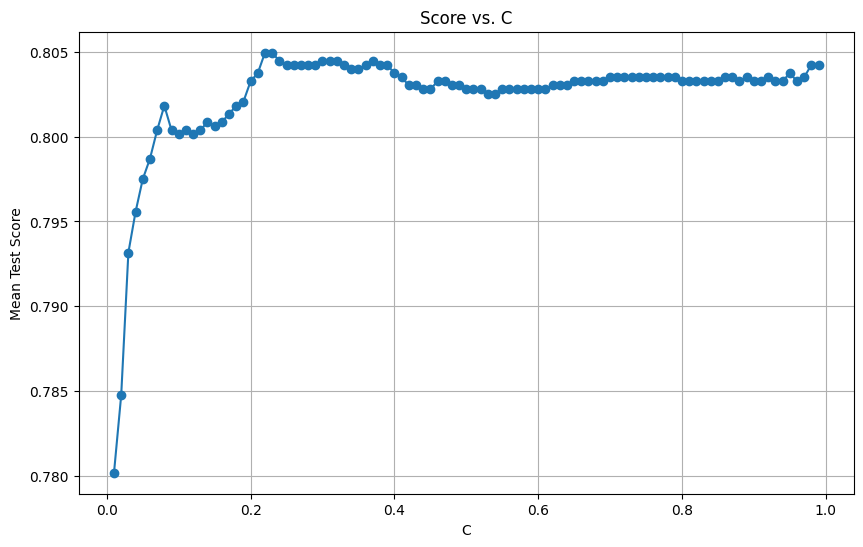

Best parameters: {'C': 0.22, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.8049476997130427


In [53]:
parameters = {'C': np.arange(0, 1, 0.01), 
              'penalty': ['l1'], 
              'solver': ['saga']}

result_lasso = best_feature_grid_search_visualization(X_train, y_train, parameters, model, result_lasso)

###### 1 - 10

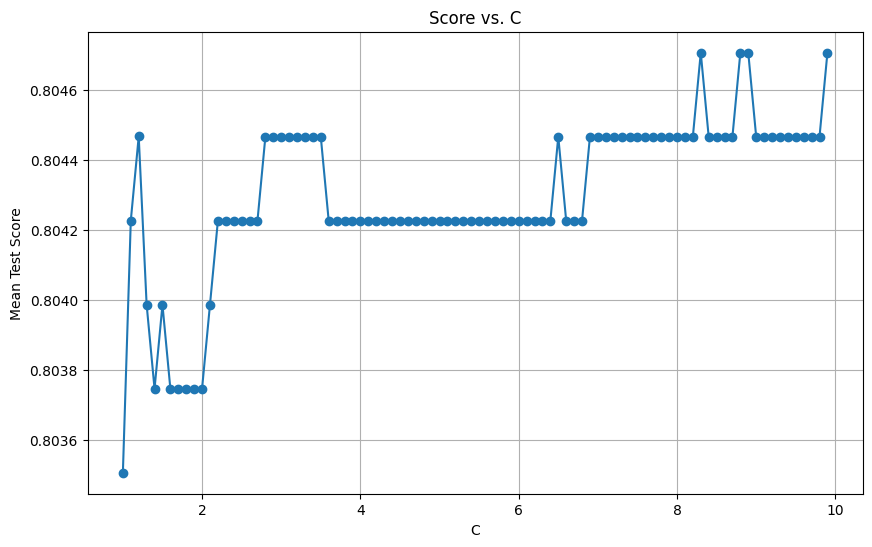

Best parameters: {'C': 8.300000000000006, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.804707315097658


In [54]:
parameters = {'C': np.arange(1,10, 0.1), 
              'penalty': ['l1'], 
              'solver': ['saga']}

result_lasso = best_feature_grid_search_visualization(X_train, y_train, parameters, model, result_lasso)

##### Rigde 
###### 0 - 1

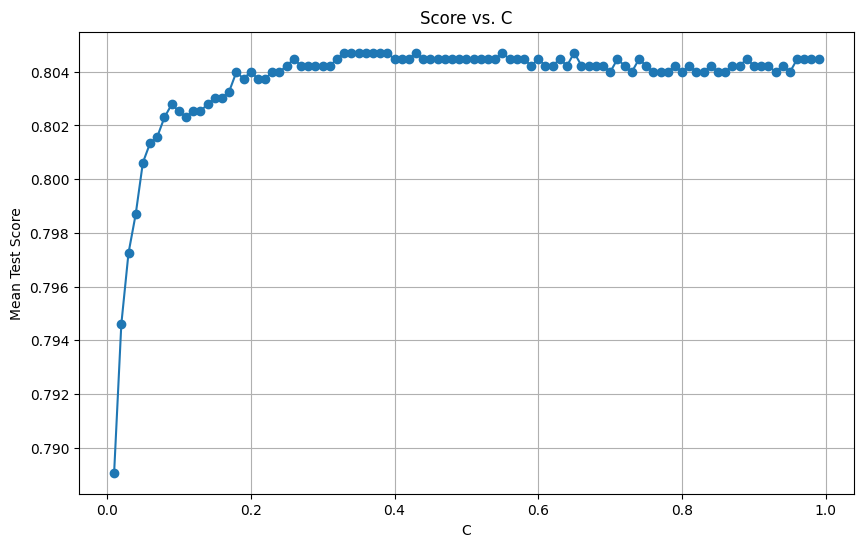

Best parameters: {'C': 0.43, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.8047076043691568


In [55]:
parameters = {'C': np.arange(0, 1, 0.01), 
              'penalty': ['l2'], 
              'solver': ['saga']}

result_ridge = best_feature_grid_search_visualization(X_train, y_train, parameters, model, result_ridge)

###### 1 - 10

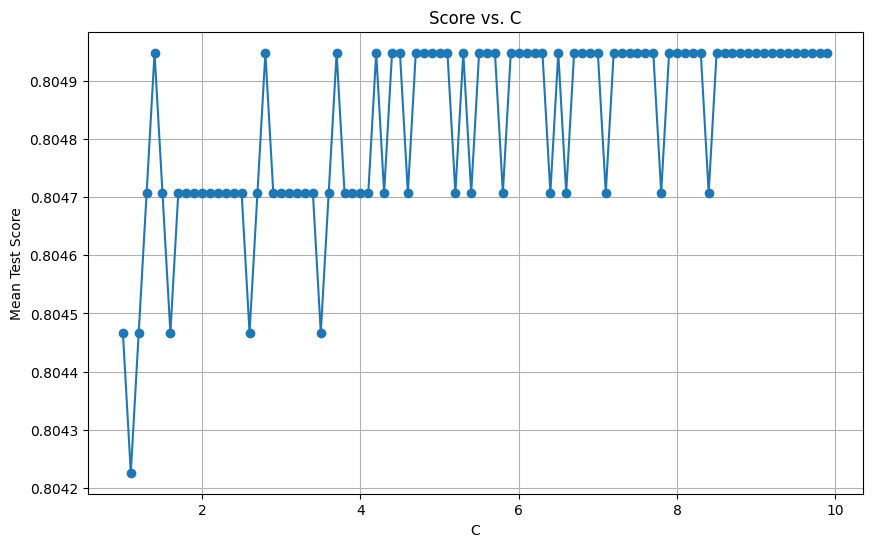

Best parameters: {'C': 1.4000000000000004, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.8049479889845413


In [56]:
parameters = {'C': np.arange(1,10, 0.1), 
              'penalty': ['l2'], 
              'solver': ['saga']}

result_ridge = best_feature_grid_search_visualization(X_train, y_train, parameters, model, result_ridge)

##### Elastic Net
###### 0 - 1

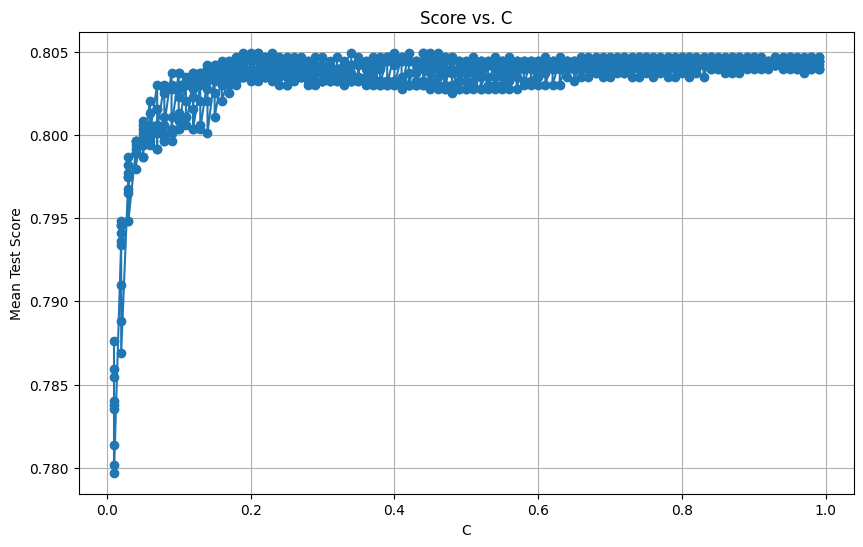

Best parameters: {'C': 0.34, 'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}
Best Score: 0.8049479889845413


In [57]:
parameters = {'C': np.arange(0, 1, 0.01), 
              'penalty': ['elasticnet'], 
              'solver': ['saga'],
              'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

result_elasticnet = best_feature_grid_search_visualization(X_train, y_train, parameters, model, result_elasticnet)

###### 1 - 10

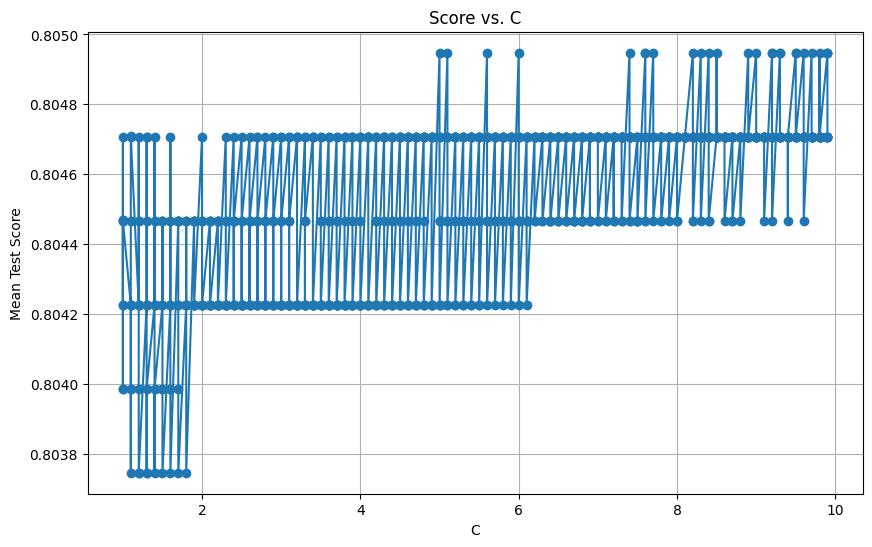

Best parameters: {'C': 5.0000000000000036, 'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}
Best Score: 0.8049476997130427


In [58]:
parameters = {'C': np.arange(1,10, 0.1), 
              'penalty': ['elasticnet'], 
              'solver': ['saga'],
              'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

result_elasticnet = best_feature_grid_search_visualization(X_train, y_train, parameters, model, result_elasticnet)

As the results are similar to the ones on the last approach we will consider lasso as the best regularization model for the same reasons.

##### Lasso

In [59]:
c = np.arange(result_lasso['C'] - 0.5, result_lasso['C'] + 0.5, 0.01)

parameters = {'C': c, 
              'penalty': ['l1'], 
              'solver': ['saga']}

best_feature_lasso = best_feature_grid_search(columns_name, X_train, y_train, parameters, model)

Best parameters: {'C': 0.22000000000000042, 'penalty': 'l1', 'solver': 'saga'}
Feature Coefficients:
                               Feature  Coefficient
0                             Altitude     3.193510
1                    Slope_Orientation    -0.139803
2                                Slope     0.000000
3         Horizontal_Distance_To_Water     0.000000
4           Vertical_Distance_To_Water    -0.529469
5      Horizontal_Distance_To_Roadways     0.119661
6                      Shadow_Index_9h     0.000000
7                     Shadow_Index_12h     0.081185
8                     Shadow_Index_15h     0.000000
9   Horizontal_Distance_To_Fire_Points     0.112394
10                    Soil_Type_Type_1     0.000000
11                   Soil_Type_Type_10    -0.532133
12                   Soil_Type_Type_11    -0.177552
13                   Soil_Type_Type_12     0.037830
14                   Soil_Type_Type_13     0.000000
15                   Soil_Type_Type_14     0.000000
16             


The best model used the penalty "l2" which utilizes the method ridge. We can observe that it gave more importance to the Altitude, Wilderness_Area_Area_1, Soil_Type_Type_2 and Vertical_Distance_To_Water. The first two features have a high correlation with the target column as previously observed. The importance of the second two were not expected since the correlation was low. Despite that this features can help differentiate between the type_3 and type_6 as seen in the bivariate analysis graphs. The majority of the other features were assigned an importance in similar ranges.

In [60]:
best_models_lr = {
    'Logistic Regression with Lasso': LogisticRegression(C=best_feature_lasso['C'],
                                                        penalty=best_feature_lasso['penalty'],
                                                        solver='saga')
}

#### Holdout Method

In [61]:
holdout_evaluation(data_results, best_models_lr, X, y, " dummies")

#### Cross Validation (K=5)

In [62]:
cross_validation_evaluation(data_results, best_models_lr, X_dummies, y_dummies, 5, " dummies")

#### Cross Validation (K=10)

In [63]:
cross_validation_evaluation(data_results, best_models_lr, X_dummies, y_dummies, 10, " dummies")

#### Leave One Out with Cross Validation

In [64]:
loocv_evaluation(data_results, best_models_lr, X_dummies, y_dummies, " dummies")

#### Bootstrap

In [65]:
bootstrap_evaluation(data_results, best_models_lr, X_dummies, y_dummies, 100, " dummies")

#### Results with Dummies

In [66]:
data_results

Model                            Method  \
0              Logistic Regression                          Houldout   
1                              LDA                          Houldout   
2                              QDA                          Houldout   
3              Logistic Regression           Cross-Validation with 5   
4                              LDA           Cross-Validation with 5   
5                              QDA           Cross-Validation with 5   
6              Logistic Regression          Cross-Validation with 10   
7                              LDA          Cross-Validation with 10   
8                              QDA          Cross-Validation with 10   
9              Logistic Regression                       LeaveOneOut   
10                             LDA                       LeaveOneOut   
11                             QDA                       LeaveOneOut   
12             Logistic Regression                         Bootstrap   
13                             LDA                         Bootstrap   
14                             QDA                         Bootstrap   
15  Logistic Regression with Lasso                          Houldout   
16  Logistic Regression with Lasso           Cross-Validation with 5   
17  Logistic Regression with Lasso          Cross-Validation with 10   
18  Logistic Regression with Lasso                       LeaveOneOut   
19  Logistic Regression with Lasso                         Bootstrap   
20  Logistic Regression with Lasso                  Houldout dummies   
21  Logistic Regression with Lasso   Cross-Validation with 5 dummies   
22  Logistic Regression with Lasso  Cross-Validation with 10 dummies   
23  Logistic Regression with Lasso               LeaveOneOut dummies   
24  Logistic Regression with Lasso                 Bootstrap dummies   

    Accuracy  Precision    Recall        F1   Std Dev  \
0   0.802694   0.803416  0.802694  0.799051  0.006209   
1   0.799270   0.800241  0.799270  0.794730  0.005353   
2   0.809484   0.811471  0.809484  0.807627  0.011984   
3   0.798822   0.799251  0.798822  0.794894  0.005952   
4   0.794444   0.794859  0.794444  0.789895  0.006700   
5   0.805724   0.807798  0.805724  0.803017  0.005172   
6   0.799663   0.800198  0.799663  0.795706  0.020797   
7   0.795118   0.796028  0.795118  0.790459  0.018763   
8   0.808923   0.811558  0.808923  0.806046  0.014526   
9   0.799158   0.799158  0.799158  0.799158  0.400630   
10  0.794781   0.794781  0.794781  0.794781  0.403861   
11  0.807071   0.807071  0.807071  0.807071  0.394598   
12  0.797200   0.797263  0.797200  0.793475  0.007160   
13  0.793826   0.794135  0.793826  0.789198  0.007363   
14  0.805520   0.807471  0.805520  0.802985  0.007647   
15  0.806173   0.806624  0.806173  0.802820  0.005132   
16  0.803535   0.803663  0.803535  0.799892  0.003515   
17  0.803199   0.803453  0.803199  0.799434  0.022238   
18  0.804714   0.804714  0.804714  0.804714  0.396421   
19  0.799829   0.799647  0.799829  0.796267  0.007109   
20  0.796521   0.797036  0.796521  0.792610  0.007090   
21  0.803367   0.804167  0.803367  0.800800  0.016620   
22  0.804545   0.805867  0.804545  0.802011  0.023442   
23  0.805219   0.805219  0.805219  0.805219  0.396032   
24  0.804337   0.805053  0.804337  0.802029  0.006564   

                                     Confusion Matrix  
0   [[6391, 11, 90], [5, 2673, 2191], [59, 1160, 5...  
1   [[6388, 12, 92], [1, 2596, 2272], [97, 1103, 5...  
2   [[6320, 50, 122], [0, 2840, 2029], [25, 1169, ...  
3     [[2130, 3, 27], [2, 870, 748], [15, 400, 1745]]  
4     [[2126, 3, 31], [0, 851, 769], [31, 387, 1742]]  
5     [[2107, 14, 39], [0, 908, 712], [7, 382, 1771]]  
6     [[2129, 3, 28], [1, 874, 745], [17, 396, 1747]]  
7     [[2125, 4, 31], [0, 849, 771], [30, 381, 1749]]  
8     [[2106, 14, 40], [0, 912, 708], [8, 365, 1787]]  
9     [[2130, 3, 27], [2, 875, 743], [19, 399, 1742]]  
10    [[2126, 4, 30], [0, 846, 774], [31, 380, 1749]]  
1

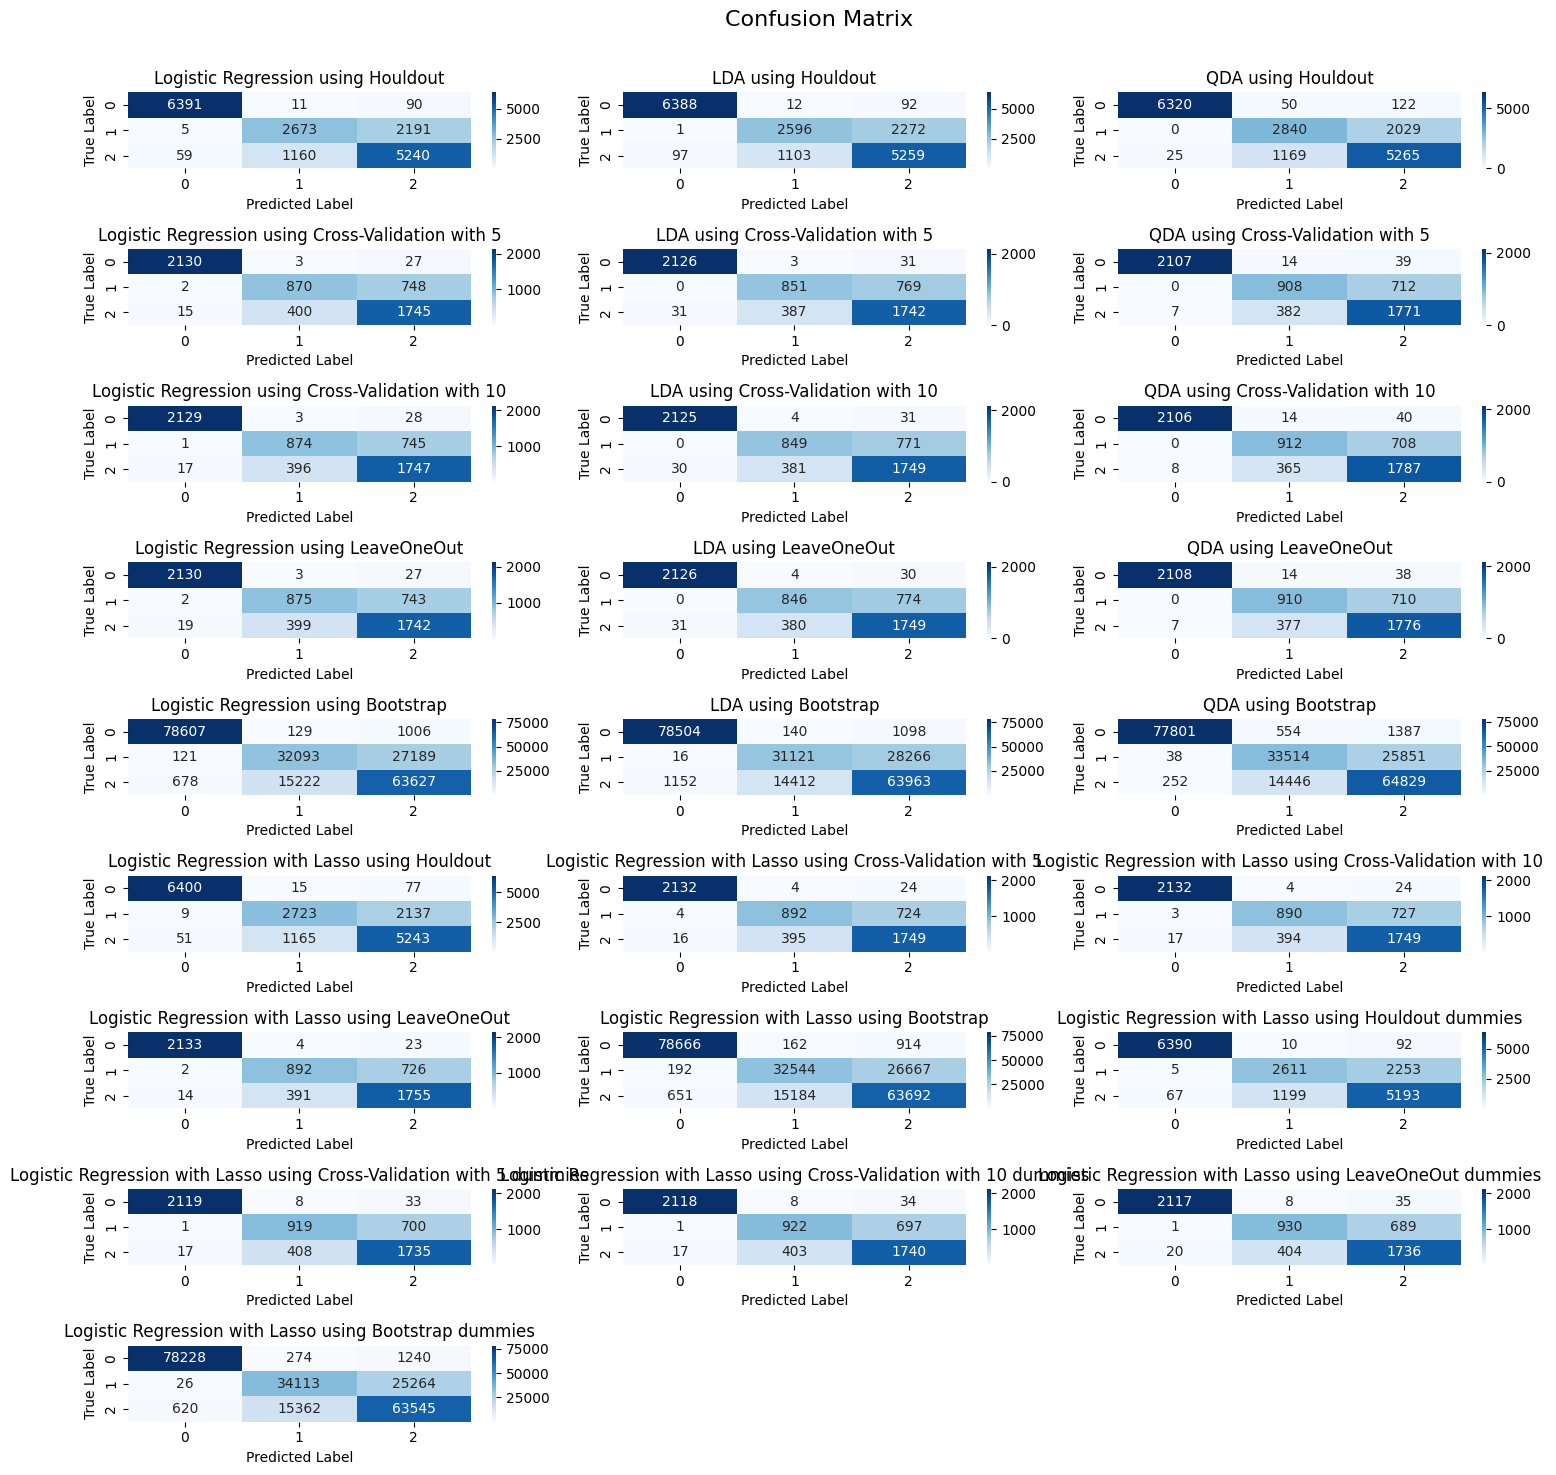

In [67]:
confusion_matrix_visualization(data_results, 'Confusion Matrix')

Using the regularization methods with dummies, we were able to get better results with holdout. It is visible that the amount mistaken samples between type_3 and type_6 is slightly smaller, justifying the better results.

We hope the results will improve even further with the use of more complex models that are able to capture the underlying correlation of the features.

In [72]:
# Saving the encoded data to a csv file

#df_encoded = encoded_data.drop(columns=['Id', 'Soil_Type', 'Wilderness_Area'])
df_encoded = encoded_data
df_encoded.to_csv('data/encoded_data.csv', index=False)

# Second Part

In [2]:
# Read the data from the csv files

data_encoded = pd.read_csv('data/encoded_data.csv')

# Remove the features selected by lasso

columns_to_remove = {
    "Horizontal_Distance_To_Water",
    "Shadow_Index_15h",
    "Slope",
    "Horizontal_Distance_To_Roadways",
    "Horizontal_Distance_To_Fire_Points"
}

df_encoded = data_encoded.drop(columns=columns_to_remove)

## GAMs

In [6]:
# Get the dummies of the Vegetation_Type column

df_types = pd.get_dummies(df_encoded['Vegetation_Type'], prefix='Is') * 1
df_encoded_label = pd.concat([df_encoded, df_types], axis=1)

In [7]:
# Create a dataframe for each type of vegetation

df_encoded_type1 = df_encoded_label.drop(columns=['Vegetation_Type','Vegetation_Type_Enc', 'Is_Type_3', 'Is_Type_6'])
df_encoded_type3 = df_encoded_label.drop(columns=['Vegetation_Type','Vegetation_Type_Enc', 'Is_Type_1', 'Is_Type_6'])
df_encoded_type6 = df_encoded_label.drop(columns=['Vegetation_Type','Vegetation_Type_Enc', 'Is_Type_1', 'Is_Type_3'])

In [8]:
# Shuffle the data

df_encoded_type1_shuffle = df_encoded_type1.sample(frac=1, random_state=42)
df_encoded_type3_shuffle = df_encoded_type3.sample(frac=1, random_state=42)
df_encoded_type6_shuffle = df_encoded_type6.sample(frac=1, random_state=42)

### Type 1

In [9]:
# Separate the data into features and target variable and convert them to numpy arrays

X = df_encoded_type1_shuffle.iloc[:, :-1]
y = df_encoded_type1_shuffle.iloc[:, -1]
X = X.to_numpy()
y = y.to_numpy()

In [10]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Creating the GAM model with splines for all the features

gam = LogisticGAM(s(0) + s(1) + s(2, n_splines=4) +  s(3, n_splines=4, lam=0) + s(4, n_splines=5, lam=0) + s(5) + s(6) + s(7) + s(8) + f(9) + f(10))
gam.fit(X_train, y_train)

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + f(9) + f(10) + intercept,
   tol=0.0001, verbose=False)

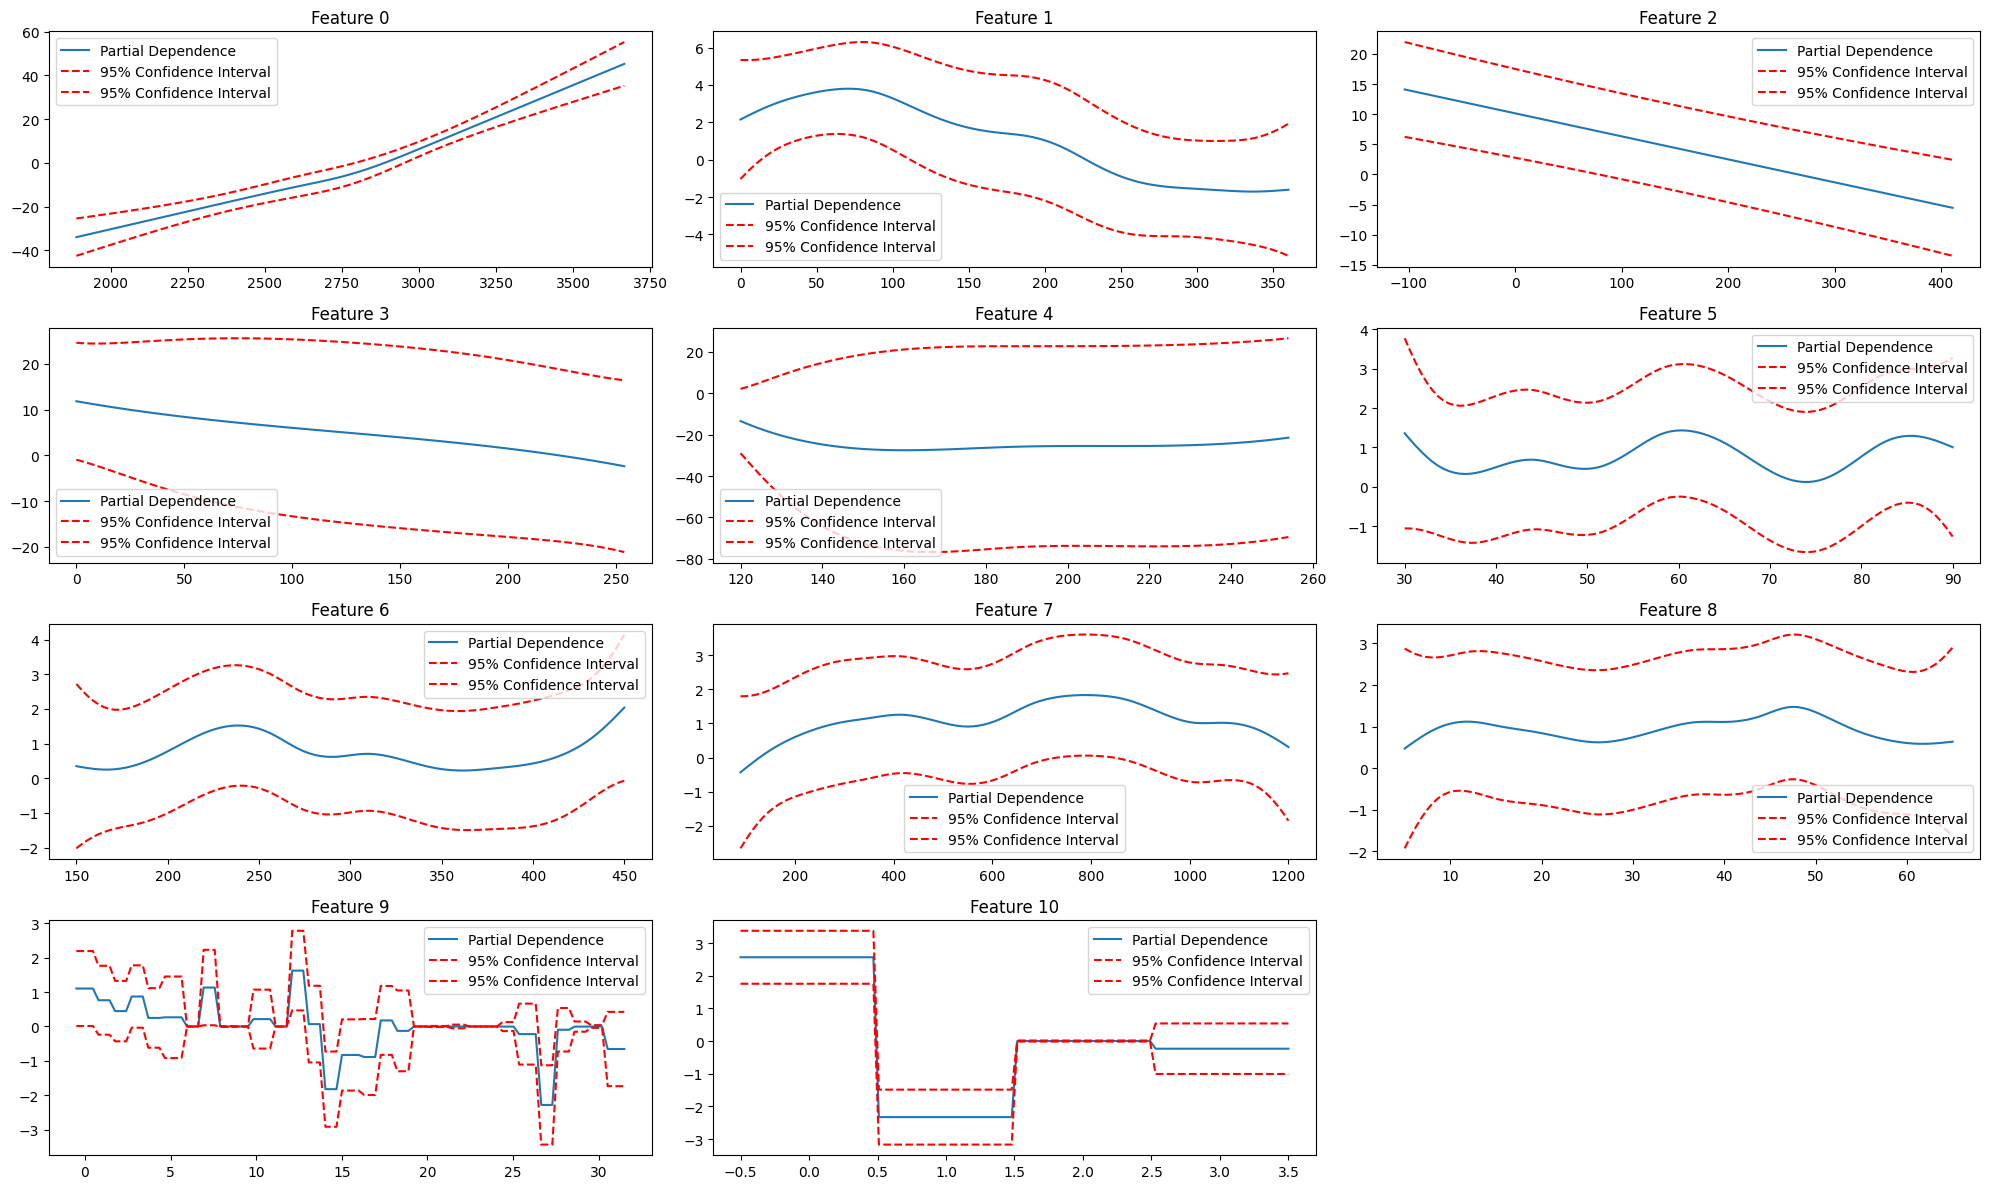

In [14]:
# Display the splines for each feature

fig, axs = plt.subplots(4, 3, figsize=(20, 4 * 3))
num_features = 11
for i, ax in enumerate(axs.flat[:num_features]):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    ax.plot(XX[:, i], pdep, label='Partial Dependence')
    ax.plot(XX[:, i], confi, c='r', ls='--', label='95% Confidence Interval')
    ax.set_title(f'Feature {i}')
    ax.legend()

# Hide unused subplots
for j in range(num_features, len(axs.flat)):
    axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

We can conclude that the model was able to create splines that capture the distribution of the features correctly. We will now test different configurations with only some features to see which one can get the best performance.

Since we could not conclude what are the best features to use with the model, we will use the insights of the previous data analysis we made. Earlier we concluded that the Type 1 vegetation is the most easily identifiable, so we will the regularization results to select the most important features. The best features were the Altitude, Vertical_Distance_To_Water, Soil_Type_Enc and Wilderness_Area_Enc. We will use these features to test the GAM model. For the numerical columns we will use splines and for the encoded columns we will use f terms.

In [96]:
# Define different configurations for splines and linear terms based on feature indices

spline_configs = [
    (s(0) + s(4) + s(4) + s(7) + f(9)),
    (s(0) + s(4) + s(4) + s(7) + s(5) + f(9)),
    (s(0) + s(1) + s(4) + s(4) + s(7) + f(9)),
    (s(0) + s(4) + s(4) + s(7) + f(9) + s(8)),
    (s(0) + s(4) + s(4) + s(7) + f(9) + s(3) + s(8)),
    (s(0) + s(4) + s(4) + s(7)  + s(8) + f(9)),
    (s(0) + s(4) + s(4) + s(7) + f(9) + s(8) + f(9)),
    (s(0) + s(4) + s(4) + s(7) + f(9) + s(3)  + s(5)),
    (s(0) + s(1) +  s(2, n_splines=4) + s(3, n_splines=4, lam=0) + s(4, n_splines=5, lam=0) + s(5) + s(6) + s(7) + s(8) + f(9)),
]

gam_gridsearch(X, y, spline_configs)

Best Model Configuration: s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + f(9) + intercept
Cross-validation F1 scores: [0.981651376146789, 0.9875, 0.9977220956719818, 0.972972972972973, 0.9767441860465116, 0.9954545454545455, 0.9917808219178083, 0.9832935560859188, 0.983451536643026, 0.9935760171306209]
Best Mean F1 Score: 0.9864
Standard deviation of F1 score: 0.0078


The best configuration did not include all the features, which makes the model simpler while still maintaining a good performance.

### Type 3

In [15]:
# Separate the data into features and target variable and convert them to numpy arrays

X = df_encoded_type3_shuffle.iloc[:, :-1]
y = df_encoded_type3_shuffle.iloc[:, -1]
X = X.to_numpy()
y = y.to_numpy()

In [16]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Creating the GAM model with splines for all the features

gam = LogisticGAM(s(0, n_splines=5) + s(1) + s(2, n_splines=4) + s(3) + l(7) + s(5) + s(6) + s(7) + s(8) + f(9) + f(10))
gam.fit(X_train, y_train)

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + l(7) + s(5) + s(6) + s(7) + s(8) + f(9) + f(10) + intercept,
   tol=0.0001, verbose=False)

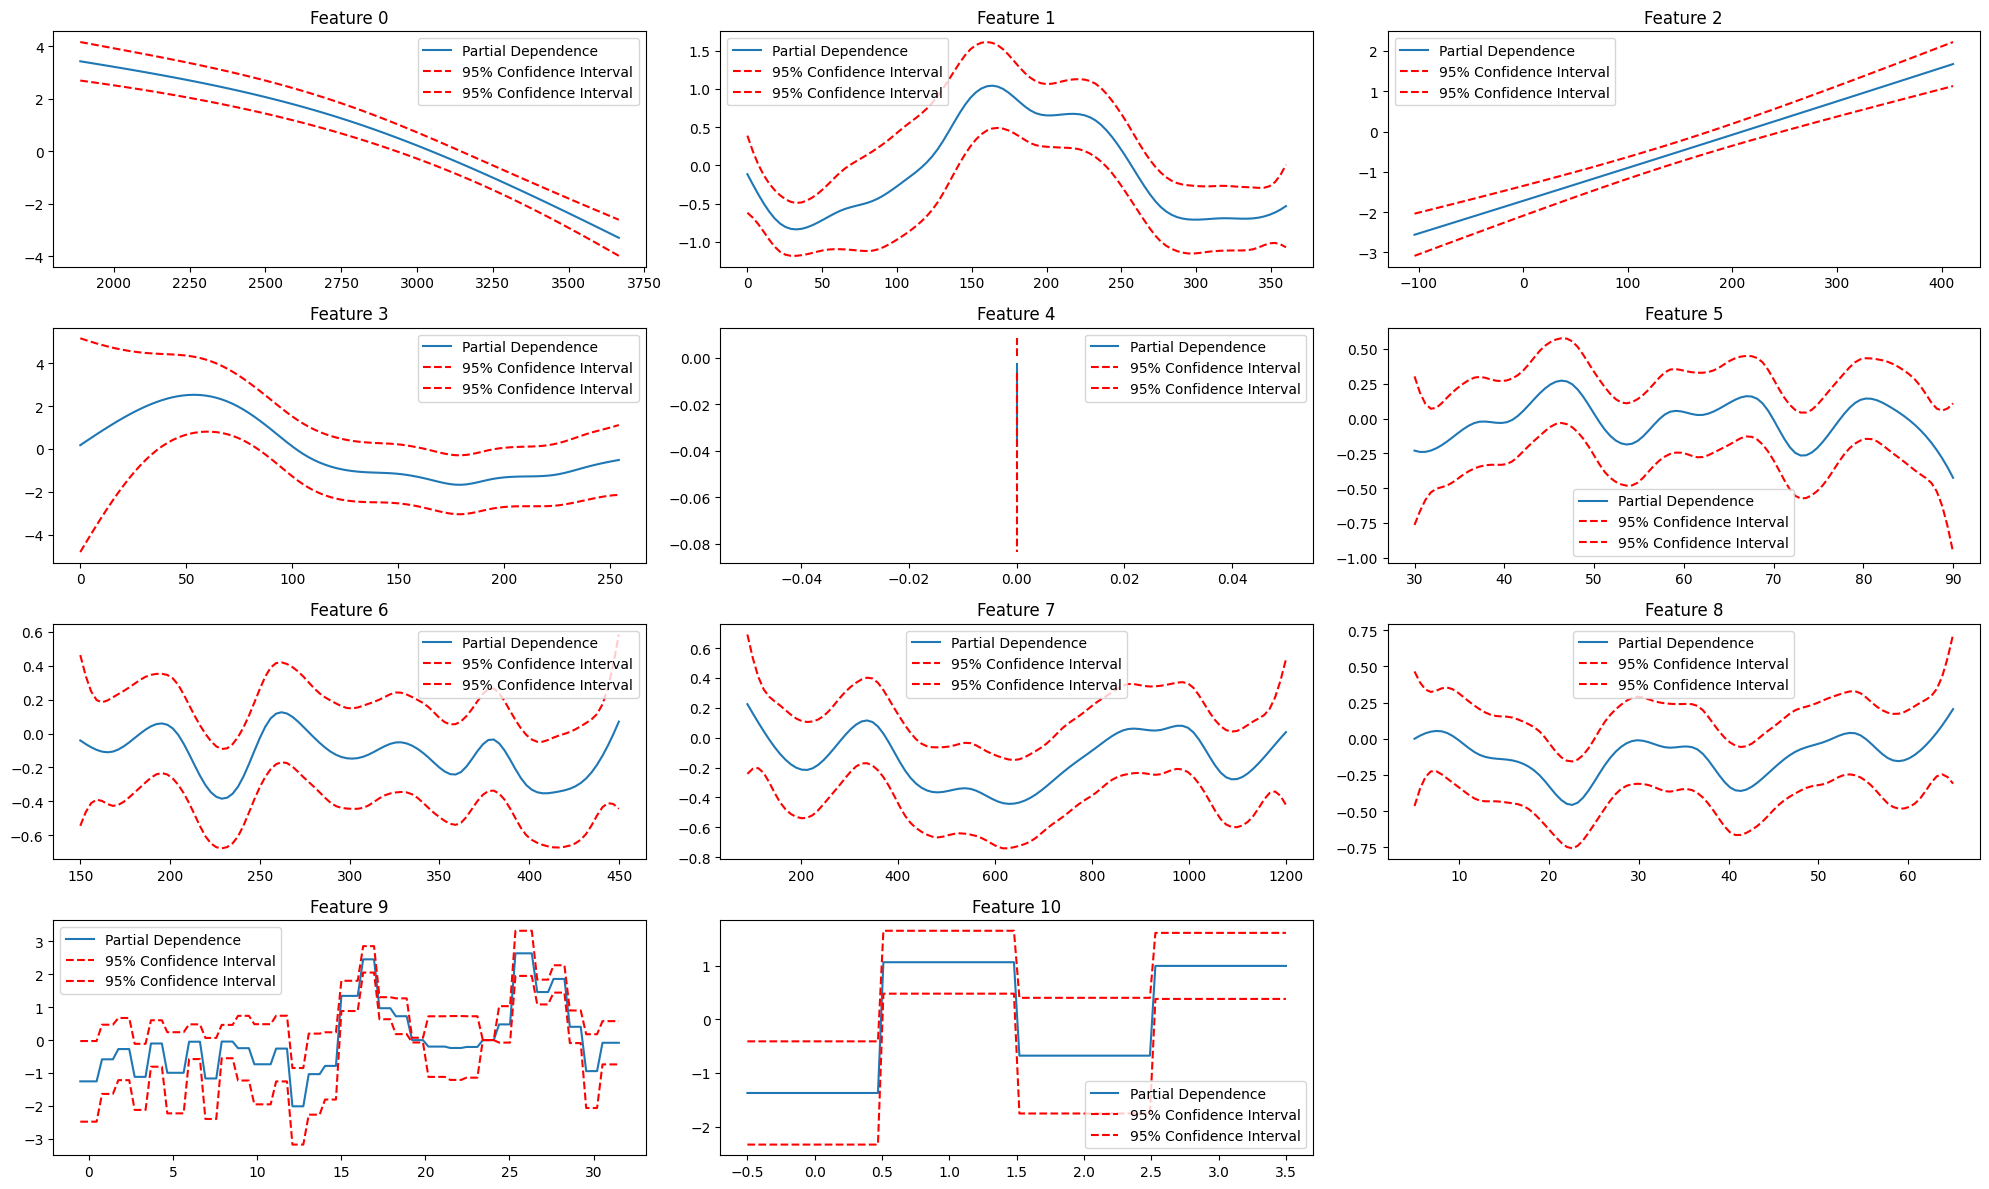

In [18]:
# Display the splines for each feature

fig, axs = plt.subplots(4, 3, figsize=(20, 4 * 3))
num_features = 11
for i, ax in enumerate(axs.flat[:num_features]):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    ax.plot(XX[:, i], pdep, label='Partial Dependence')
    ax.plot(XX[:, i], confi, c='r', ls='--', label='95% Confidence Interval')
    ax.set_title(f'Feature {i}')
    ax.legend()

# Hide unused subplots
for j in range(num_features, len(axs.flat)):
    axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

In this case the splines could also capture the distribution of the features correctly, although some of them did not adjust as well as the others. We will now test different configurations with only some features to see which one can get the best performance.

Since the type 3 and 6 are harder to distinguish, we will test the features that showed some difference between the classes in our analysis. The best features were the Altitude, Slope, Slope_Orientation, Shadow_Index_12h, Horizontal_Distance_To_Water, Vertical_Distance_To_Water and Shadow_Index_9h. We will use an approach similar to the last one.

In [102]:
# Define different configurations for splines and linear terms based on feature indices

spline_configs = [
    s(0, n_splines=5) + s(1) + s(4),
    s(0, n_splines=5) + s(2) + s(4),
    s(0, n_splines=5) + s(1) + s(4) + s(2, n_splines=4),
    s(0, n_splines=5) + s(1) + s(4) + s(3),
    s(0, n_splines=5) + s(2, n_splines=4) + s(3),
    s(0, n_splines=5) + s(3),
    s(0, n_splines=5) + s(2, n_splines=4) + s(4),
    s(0, n_splines=5) + s(4),
    s(0, n_splines=5) + s(1) + s(4) + s(2, n_splines=4) + s(3),
    s(0, n_splines=5) + s(1) + s(2, n_splines=4) + s(3) + l(7) + s(5) + s(6) + s(7) + s(8) + f(9)
]

gam_gridsearch(X, y, spline_configs)

Best Model Configuration: s(0) + s(1) + s(2) + s(3) + l(7) + s(5) + s(6) + s(7) + s(8) + f(9) + intercept
Cross-validation F1 scores: [0.6896551724137931, 0.6264150943396226, 0.5993031358885017, 0.6322188449848024, 0.6514657980456026, 0.6339622641509434, 0.6204819277108434, 0.6459627329192547, 0.6349206349206349, 0.6258503401360545]
Best Mean F1 Score: 0.6360
Standard deviation of F1 score: 0.0224


In this case the best configuration was the one that used all the features.

### Type 6

We will use the same terms as the type 3 since the features that showed some difference between the classes were the same.

In [19]:
# Separate the data into features and target variable and convert them to numpy arrays

X = df_encoded_type6_shuffle.iloc[:, :-1]
y = df_encoded_type6_shuffle.iloc[:, -1]
X = X.to_numpy()
y = y.to_numpy()

In [20]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Creating the GAM model with splines for all the features

gam = LogisticGAM(s(0, n_splines=5) + s(1) +   s(2, n_splines=4) +  s(3) + l(7) +   s(5) + s(6) + s(7) + s(8) + f(9) + f(10))
gam.fit(X_train, y_train)

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + l(7) + s(5) + s(6) + s(7) + s(8) + f(9) + f(10) + intercept,
   tol=0.0001, verbose=False)

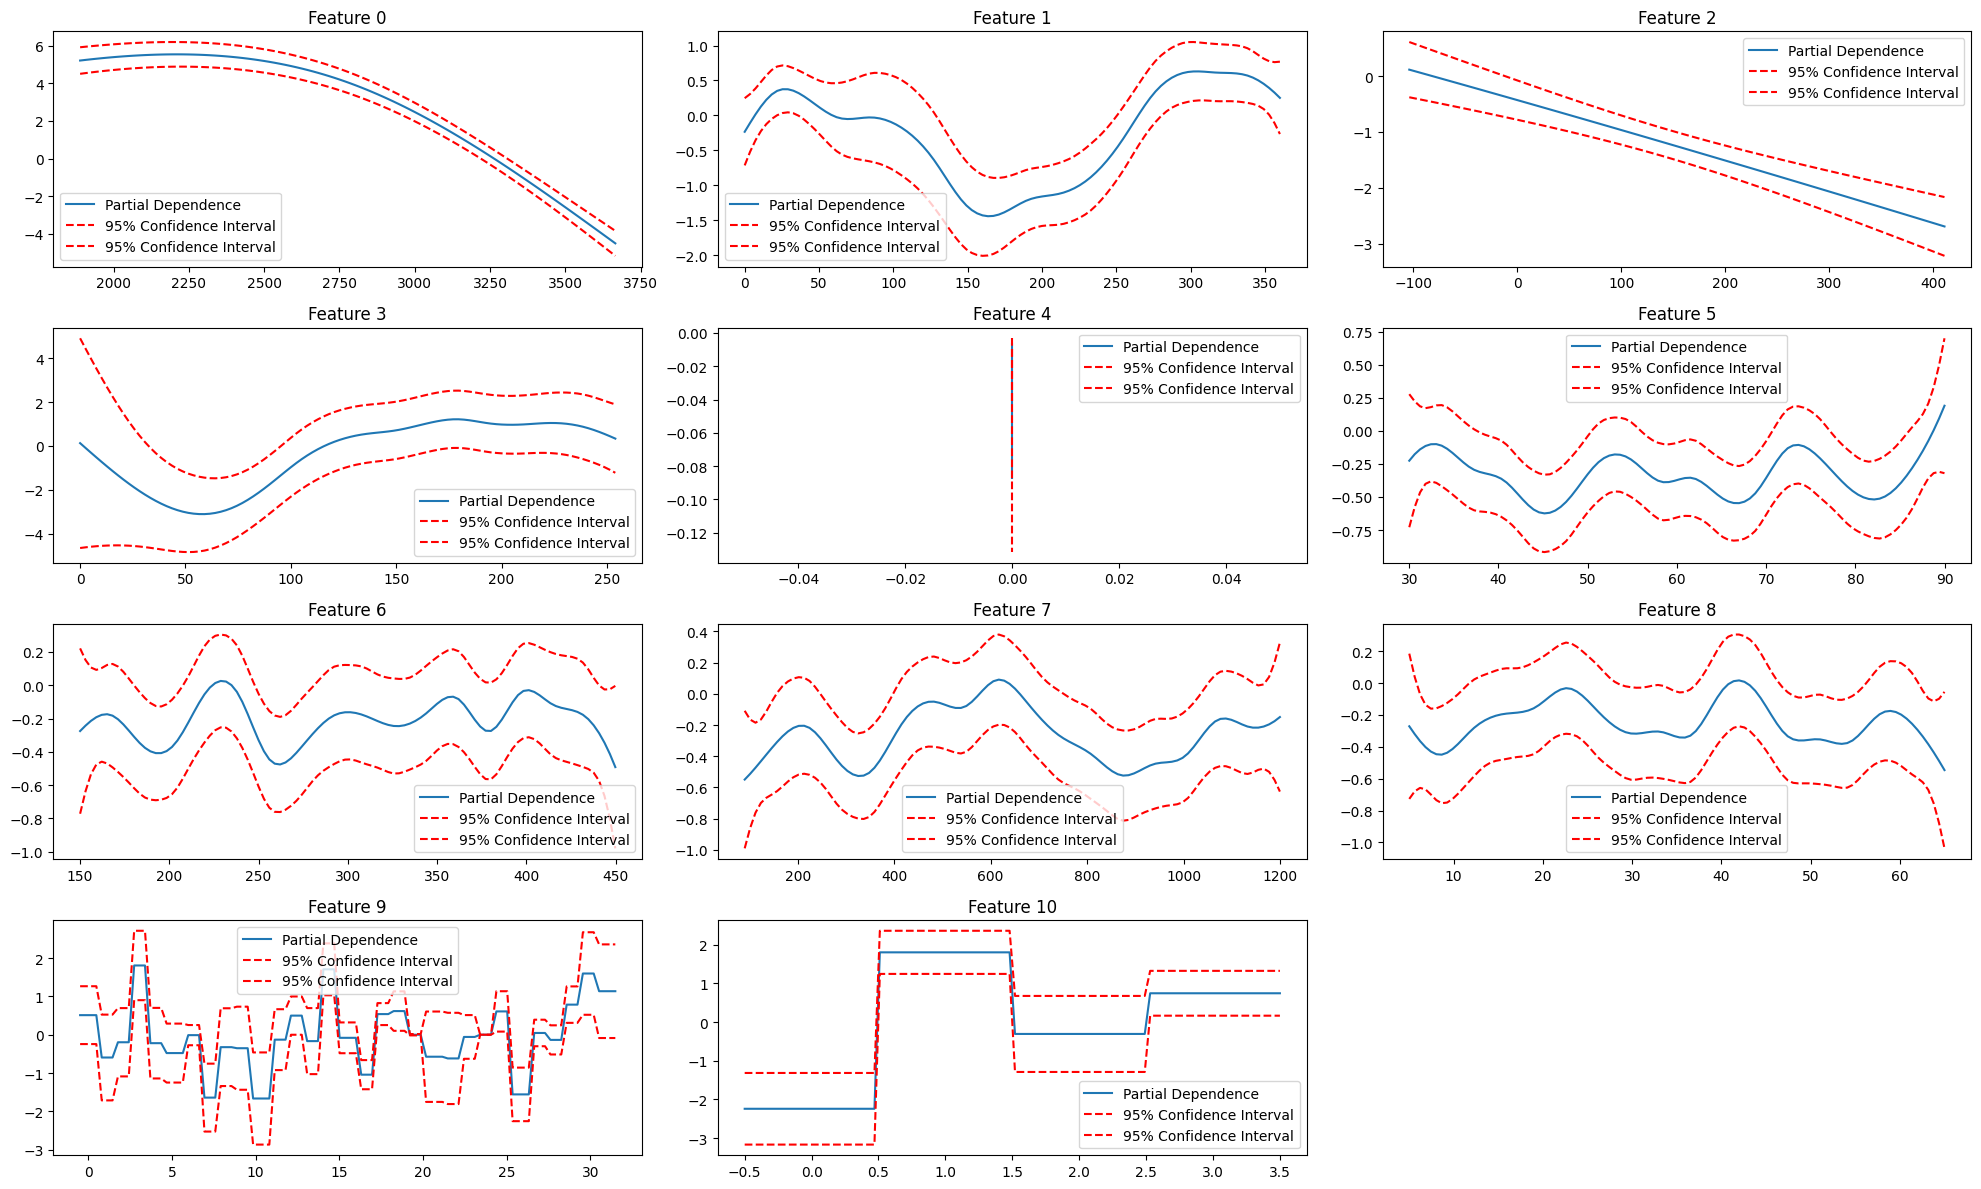

In [22]:
# Display the splines for each feature

fig, axs = plt.subplots(4, 3, figsize=(20, 4 * 3))
num_features = 11
for i, ax in enumerate(axs.flat[:num_features]):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    ax.plot(XX[:, i], pdep, label='Partial Dependence')
    ax.plot(XX[:, i], confi, c='r', ls='--', label='95% Confidence Interval')
    ax.set_title(f'Feature {i}')
    ax.legend()

# Hide unused subplots
for j in range(num_features, len(axs.flat)):
    axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()

With the same configuration used to predict the type 3, we got similar results.

To predict the type 6 of the vegetation we will use the Altitude, Slope, Slope_Orientation, Shadow_Index_12h, Horizontal_Distance_To_Water, Vertical_Distance_To_Water and Shadow_Index_9h.

In [108]:
# Define different configurations for splines and linear terms based on feature indices

spline_configs = [
    s(0, n_splines=5) + s(1) + s(4),
    s(0, n_splines=5) + s(2) + s(4),
    s(0, n_splines=5) + s(1) + s(4) + s(2, n_splines=4),
    s(0, n_splines=5) + s(1) + s(4) + s(3),
    s(0, n_splines=5) + s(2, n_splines=4) + s(3),
    s(0, n_splines=5) + s(3),
    s(0, n_splines=5) + s(2, n_splines=4) + s(4),
    s(0, n_splines=5) + s(4),
    s(0, n_splines=5) + s(1) + s(4) + s(2, n_splines=4) + s(3),
    s(0, n_splines=5) + s(1) + s(2, n_splines=4) + s(3) + l(7) + s(5) + s(6) + s(7) + s(8) + f(9)
]

gam_gridsearch(X, y, spline_configs)

did not converge
did not converge
Best Model Configuration: s(0) + s(1) + s(2) + s(3) + l(7) + s(5) + s(6) + s(7) + s(8) + f(9) + intercept
Cross-validation F1 scores: [0.782608695652174, 0.75, 0.7444933920704846, 0.7152317880794702, 0.7292576419213974, 0.7663157894736842, 0.7287784679089027, 0.7117117117117117, 0.7533632286995515, 0.7388235294117647]
Best Mean F1 Score: 0.7421
Standard deviation of F1 score: 0.0210


In this case the best configuration was the one that used all the features.

Of the three models, predicting the type 1 vegetation was the easiest, while predicting the type 3 was the hardest. We decided to use the F1 score to evaluate the models since it is a good metric to balance precision and recall, as we want to avoid misclassifications between the classes. 

## Data processing

In [12]:
# Splitting the data

X = df_encoded.drop(columns=['Vegetation_Type','Vegetation_Type_Enc'])
y = df_encoded['Vegetation_Type_Enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree

Our starting point will be to use the default parameters for the decision tree to set a baseline performance for the model with our dataset.

In [4]:
decision_tree(X, y)

Max depth: 28
Number of nodes: 967
Training set score: 1.0000
Test set score: 0.7868


We can see that the resulting tree is very deep and shows a clear sign of overfitting because the training set score is 1 while the test score is more than 0.20 lower. With that, we can begin looking into the best hyperparameters for the decision tree.

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Training set score: 0.8564
Test set score: 0.8227


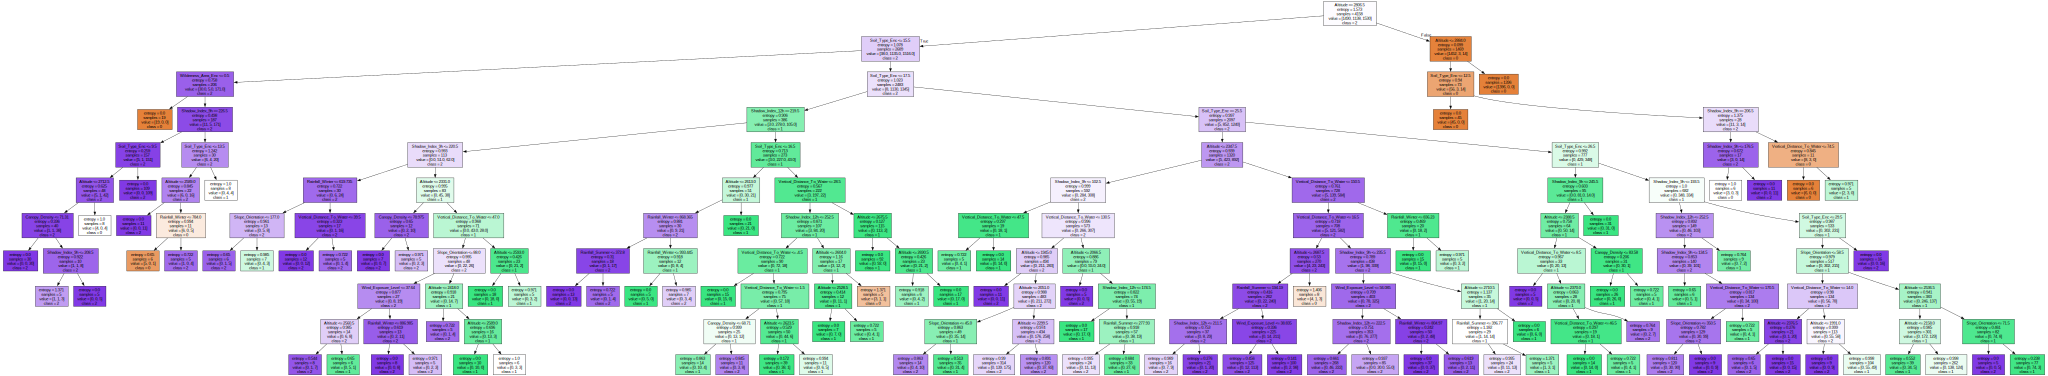

In [5]:
# Define the grid of parameters to provide to the grid search in order to find the hyperparameters

params_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30, 35],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

decision_tree_grid_search(X, y, params_grid, generate_tree=True)

We can see that with this search for the hyperparameters the performance of the model improved by almost 4% with less overfitting.

In [10]:
dt_model = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=10, min_samples_leaf=5, min_samples_split=2)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

y_pred_train = dt_model.predict(X_train)
print("Training accuracy:", accuracy_score(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy: 0.8564213564213564
Accuracy: 0.8215488215488216
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       670
           1       0.73      0.62      0.67       482
           2       0.72      0.81      0.77       630

    accuracy                           0.82      1782
   macro avg       0.81      0.80      0.80      1782
weighted avg       0.82      0.82      0.82      1782


We can see how these results track with the previous models' performance, with the highest scores being for the first Vegetation type, and the second and third types have lower scores since they are harder to differentiate from each other in our given dataset.

## Random Forest

In [113]:
# Define the baseline random forest and evaluate

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)
print("Training accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy: 1.0
Testing accuracy: 0.8428731762065096
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       670
           1       0.74      0.68      0.71       482
           2       0.76      0.82      0.79       630

    accuracy                           0.84      1782
   macro avg       0.83      0.83      0.83      1782
weighted avg       0.84      0.84      0.84      1782


When training the Random Forest with all the default parameters we can see that the model overfitted the training data, as the training accuracy is 1 and the testing accuracy is 0.85. We will now search for the best hyperparameters to improve the model.

In [114]:
# Get the depth values of the trees

depths = [tree.tree_.max_depth for tree in rf_model.estimators_]
print("Maximum depth:",max(depths))
print("Average depth:",int(sum(depths)/len(depths)))

Maximun depth: 32
Average depth: 24


The maximum depth of trees is 32, with the average depth being 24. This tells us that we need to limit the depth with smaller values to avoid overfitting.

In [115]:
# Get the leaf nodes of the trees

leaf_nodes = [tree.tree_.n_leaves for tree in rf_model.estimators_]
print("Maximum leaf nodes:", max(leaf_nodes))
print("Average leaf nodes:", sum(leaf_nodes) / len(leaf_nodes))

Maximum leaf nodes: 521
Average leaf nodes: 458.8


The number of leaf nodes is also very high. We will also try to minimize this number during the hyperparameter tuning.

In [24]:
# Define the grid of parameters to provide to the random forest

param = {
        'n_estimators': [50,100],
        'max_depth': np.arange(10,14,1),
        'max_leaf_nodes': [100, 150],
        'max_features': ['auto', 'sqrt']
}

In [25]:
# Get the best combination of parameters using grid search

best_random_forest(X_train, y_train, param)

Best parameters {'max_depth': 13, 'max_features': 'sqrt', 'max_leaf_nodes': 100, 'n_estimators': 50}


We will test the model that got the best results using grid search.

In [30]:
# Define the model with the best parameters and evaluating

random_forest = RandomForestClassifier(max_depth=13, max_features='sqrt', max_leaf_nodes=100, n_estimators=50)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

y_pred_train = random_forest.predict(X_train)
print("Training accuracy:", accuracy_score(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy: 0.9187109187109187
Accuracy: 0.8372615039281706
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       670
           1       0.76      0.62      0.69       482
           2       0.73      0.85      0.79       630

    accuracy                           0.84      1782
   macro avg       0.83      0.82      0.82      1782
weighted avg       0.84      0.84      0.84      1782


With the new parameters the model did not overfit the training data despite having a slightly lower accuracy.The other metrics remained similar to the previous model. 

In [119]:
# Get the coefficients of importance of each feature

get_feature_importances_text(X.columns, random_forest.feature_importances_)

Feature Importances:
- Altitude: 0.388
- Soil_Type_Enc: 0.229
- Wilderness_Area_Enc: 0.093
- Shadow_Index_9h: 0.055
- Vertical_Distance_To_Water: 0.052
- Slope_Orientation: 0.052
- Shadow_Index_12h: 0.042
- Wind_Exposure_Level: 0.023
- Rainfall_Summer: 0.023
- Canopy_Density: 0.022
- Rainfall_Winter: 0.022


As we can see the most important features were the altitude, the soil type encoded and the wilderness area encoded. The results are coherent with the analysis made earlier since these features showed a good distinction of its values among the different classes.
The ridge and lasso also showed that these features have high importance.

## SVMs

In [8]:
# Testing the SVM model with all kernels

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    score = svm.score(X_test, y_test)
    print(f'Kernel: {kernel} - Score: {score}')

Kernel: linear - Score: 0.7536475869809203
Kernel: poly - Score: 0.7149270482603816
Kernel: rbf - Score: 0.7143658810325477
Kernel: sigmoid - Score: 0.038159371492704826


In [9]:
# Testing different values of C for the linear kernel

svm = SVC()
param_grid = [
    {'kernel': ['linear'], 'C': [0.01,0.1,0.5,1]}
]

search = GridSearchCV(svm, param_grid = param_grid, scoring = 'accuracy', cv = 5)
search.fit(X_train, y_train)

print(search.best_params_)

{'C': 0.1, 'kernel': 'linear'}


In [24]:
# Testing the linear kernel with the best value

svm = SVC(kernel='linear', C=0.1)
svm.fit(X_train, y_train)
score = svm.score(X_test, y_test)
print(f'Score: {score}')

Score: 0.7682379349046016


The model improved slightly with the best parameters for the linear kernel.

In [10]:
# Testing different values of C and gamma for the rbf kernel

svm = SVC()
param_grid = [
    {'kernel': ['rbf'], 'C': [0.01,0.1,0.5,1], 'gamma': ['scale', 'auto']}
]

search = GridSearchCV(svm, param_grid = param_grid, scoring = 'accuracy', cv = 5)
search.fit(X_train, y_train)

print(search.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [26]:
# Testing the rbf kernel with the best value

svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)
score = svm.score(X_test, y_test)
print(f'Score: {score}')

Score: 0.7143658810325477


The results stayed the same with the best parameters for the rbf kernel.

In [11]:
# Testing different values of C for the poly kernel

svm = SVC()
param_grid = [
    {'kernel': ['poly'], 'C': [0.01,0.1, 0.5]}
]

search = GridSearchCV(svm, param_grid = param_grid, scoring = 'accuracy', cv = 5)
search.fit(X_train, y_train)

print(search.best_params_)

{'C': 0.5, 'kernel': 'poly'}


In [27]:
# Testing the poly kernel with the best value

svm = SVC(kernel='poly', C=0.5)
svm.fit(X_train, y_train)
score = svm.score(X_test, y_test)
print(f'Score: {score}')

Score: 0.712682379349046


The results stayed the same with the best parameters for the poly kernel.

In [12]:
# Testing different values of C and gamma for the sigmoid kernel

svm = SVC()
param_grid = [
    {'kernel': ['sigmoid'], 'C': [0.01,0.1,0.5], 'gamma': ['scale', 'auto']}
]

search = GridSearchCV(svm, param_grid = param_grid, scoring = 'accuracy', cv = 5)
search.fit(X_train, y_train)

print(search.best_params_)

{'C': 0.01, 'gamma': 'scale', 'kernel': 'sigmoid'}


In [28]:
# Testing the sigmoid kernel with the best value

svm = SVC(kernel='sigmoid', C=0.01, gamma='scale')
svm.fit(X_train, y_train)
score = svm.score(X_test, y_test)
print(f'Score: {score}')

Score: 0.35353535353535354


The sigmoid kernel improved the results significantly compared to the default parameters. Despite that, the results are still not good and are comparable to a random guess classifier.

Looking back at the results of the SVM models, the best performing kernel was the linear one, with the rbf coming in second with a close score. The Logistic regression, the LDA and QDA also had very similar results which shows that the data might be linear but exhibits some non-linearity that the SVM models were not able to fully capture.

## PCA

In [29]:
from sklearn.decomposition import PCA

scaler = StandardScaler(with_std=True,
                        with_mean=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

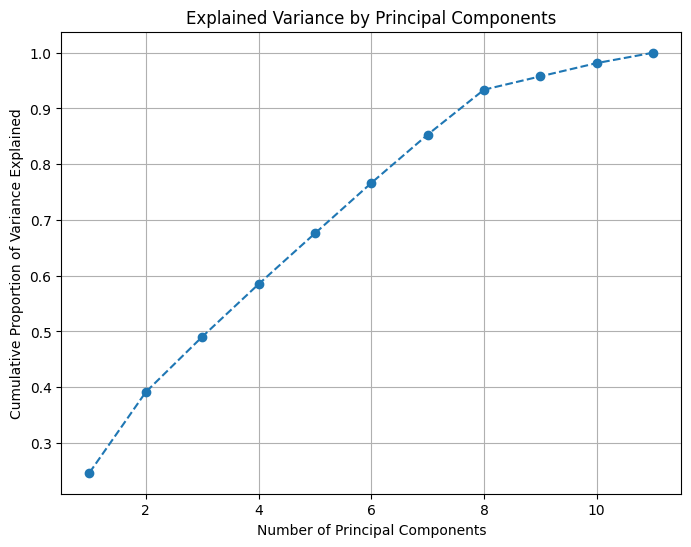

In [30]:
pca = PCA(n_components=None)  
X_train_pca = pca.fit(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.grid()
plt.show()

As we can see, the first 9 components are able to explain 95% of the variance of the data. We will now use this number of components to reduce the dimensionality of the data.

In [31]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1 
print(f"Number of components explaining 95% variance: {n_components_95}")

pca_final = PCA(n_components=n_components_95)
X_train_pca_final = pca_final.fit_transform(X_train_scaled)
X_test_pca_final = pca_final.transform(X_test_scaled)

print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {n_components_95}")

Number of components explaining 95% variance: 9
Original number of features: 11
Reduced number of features: 9


In [32]:
feature_names = X_train.columns  
pca_components = pca_final.components_

loadings_df = pd.DataFrame(pca_components.T, index=feature_names, 
                           columns=[f'PC{i+1}' for i in range(pca_final.n_components_)])
loadings_df

PC1       PC2       PC3       PC4       PC5  \
Altitude                   -0.531860  0.170148 -0.170394 -0.005070  0.006052   
Slope_Orientation           0.173357  0.699662  0.094825 -0.032509  0.039337   
Vertical_Distance_To_Water  0.187603  0.077136 -0.568547 -0.010303  0.083228   
Shadow_Index_9h            -0.296706 -0.538243  0.292731 -0.011062  0.013201   
Shadow_Index_12h           -0.197229  0.361966  0.619578 -0.072167  0.078776   
Canopy_Density              0.001320  0.062373  0.173323  0.664576  0.209270   
Rainfall_Summer            -0.025143 -0.018714 -0.110507  0.704324  0.135460   
Rainfall_Winter            -0.028868 -0.028647 -0.073221 -0.158907  0.643101   
Wind_Exposure_Level        -0.017346 -0.050671 -0.003152 -0.173540  0.711407   
Soil_Type_Enc               0.472654 -0.205469  0.339693 -0.017407  0.055400   
Wilderness_Area_Enc         0.547516 -0.070721  0.078386  0.008799  0.014775   

                                 PC6       PC7       PC8       PC9  
Altitude                   -0.020378  0.018800  0.169136  0.085183  
Slope_Orientation          -0.011679 -0.054790 -0.043031  0.659325  
Vertical_Distance_To_Water -0.045214  0.032782  0.770151 -0.024003  
Shadow_Index_9h            -0.000635 -0.047046  0.323144  0.519978  
Shadow_Index_12h            0.037734 -0.195181  0.429127 -0.441708  
Canopy_Density             -0.042120  0.687848  0.074453 -0.011219  
Rainfall_Summer             0.045989 -0.683933 -0.048155  0.010444  
Rainfall_Winter             0.739588  0.032272 -0.074021  0.007456  
Wind_Exposure_Level        -0.666018 -0.072582 -0.108330 -0.014530  
Soil_Type_Enc               0.038987 -0.083409  0.249848  0.231551  
Wilderness_Area_Enc        -0.000905 -0.033086  0.018324 -0.194570

In the table it is possible to check all the loadings of the features in the principal components. The higher the absolute value of the loading, the more important the feature is in the principal component.

In [33]:
total_importance = loadings_df.abs().sum(axis=1)

features = total_importance.sort_values(ascending=False)
print("Features:")
print(features)

Features:
Shadow_Index_12h              2.433466
Shadow_Index_9h               2.042746
Canopy_Density                1.926504
Wind_Exposure_Level           1.817576
Slope_Orientation             1.808515
Vertical_Distance_To_Water    1.798967
Rainfall_Winter               1.786082
Rainfall_Summer               1.782669
Soil_Type_Enc                 1.694417
Altitude                      1.177022
Wilderness_Area_Enc           0.967081
dtype: float64


Here is the total importance of the features in the principal components. We will now test the models with the reduced number of features. We can see that the most important features on previous steps like the Altitude, Soil_Type_Enc and Wilderness_Area_Enc did not have a high importance in the principal components. This may happen due to their low variance, despite having a good predictor power. In the next steps we will test all the previous models using the PCA components.

### Retesting the models with the PCA components
#### Logistic Regression, LDA and QDA with various data split techniques

In [43]:
X_pca = pd.concat([pd.DataFrame(X_train_pca_final), pd.DataFrame(X_test_pca_final)])

In [46]:
# Load the models to be evaluated

models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis()
}

In [47]:
# Dataframe to store the metrics for each model and method

pca_results = pd.DataFrame(columns=['Model', 'Method', 'Accuracy', 'Precision', 'Recall', 'F1', 'Std Dev', 'Confusion Matrix'])

#### Holdout evaluation

In [48]:
holdout_evaluation(pca_results, models, X_pca, y)

#### Cross Validation (K=5)

In [49]:
cross_validation_evaluation(pca_results, models, X_pca, y, 5)

#### Cross Validation (K=10)

In [50]:
cross_validation_evaluation(pca_results, models, X_pca, y, 10)

#### Leave One Out Cross Validation (LOOCV)

In [51]:
loocv_evaluation(pca_results, models, X_pca, y)

#### Bootstrap

In [52]:
bootstrap_evaluation(pca_results, models, X_pca, y, 100)

### Results 

In [53]:
# Display the dataframe with the metrics for each model and method

pca_results

Model                    Method  Accuracy  Precision  \
0   Logistic Regression                  Houldout  0.365544   0.266366   
1                   LDA                  Houldout  0.366105   0.266791   
2                   QDA                  Houldout  0.357183   0.340856   
3   Logistic Regression   Cross-Validation with 5  0.358923   0.262359   
4                   LDA   Cross-Validation with 5  0.359259   0.262619   
5                   QDA   Cross-Validation with 5  0.359428   0.346613   
6   Logistic Regression  Cross-Validation with 10  0.361785   0.264817   
7                   LDA  Cross-Validation with 10  0.361953   0.264942   
8                   QDA  Cross-Validation with 10  0.355219   0.336461   
9   Logistic Regression               LeaveOneOut  0.364310   0.364310   
10                  LDA               LeaveOneOut  0.364646   0.364646   
11                  QDA               LeaveOneOut  0.359933   0.359933   
12  Logistic Regression                 Bootstrap  0.279319   0.203697   
13                  LDA                 Bootstrap  0.279366   0.206154   
14                  QDA                 Bootstrap  0.288462   0.345589   

      Recall        F1   Std Dev  \
0   0.365544  0.306951  0.007538   
1   0.366105  0.307427  0.007492   
2   0.357183  0.321293  0.006536   
3   0.358923  0.300552  0.007871   
4   0.359259  0.300827  0.007777   
5   0.359428  0.321575  0.006542   
6   0.361785  0.304701  0.021087   
7   0.361953  0.304850  0.020878   
8   0.355219  0.315666  0.013320   
9   0.364310  0.364310  0.481236   
10  0.364646  0.364646  0.481331   
11  0.359933  0.359933  0.479980   
12  0.279319  0.200010  0.012727   
13  0.279366  0.200071  0.012634   
14  0.288462  0.246366  0.013102   

                                     Confusion Matrix  
0   [[3147, 0, 3345], [2307, 0, 2562], [3092, 0, 3...  
1   [[3154, 0, 3338], [2307, 0, 2562], [3089, 0, 3...  
2   [[3061, 331, 3100], [2295, 259, 2315], [3062, ...  
3   [[1081, 0, 1079], [793, 0, 827], [1109, 0, 1051]]  
4   [[1081, 0, 1079], [794, 0, 826], [1107, 0, 1053]]  
5   [[1015, 94, 1051], [773, 78, 769], [1027, 91, ...  
6   [[1069, 0, 1091], [795, 0, 825], [1080, 0, 1080]]  
7   [[1070, 0, 1090], [795, 0, 825], [1080, 0, 1080]]  
8   [[1019, 89, 1052], [784, 65, 771], [1049, 85, ...  
9   [[1099, 0, 1061], [809, 0, 811], [1095, 0, 1065]]  
10  [[1100, 0, 1060], [809, 0, 811], [1094, 0, 1066]]  
11  [[1051, 69, 1040], [768, 54, 798], [1059, 68, ...  
12  [[18501, 73, 19559], [28931, 83, 30389], [1866...  
13  [[18504, 76, 19553], [28916, 86, 30401], [1866...  
14  [[16938, 2843, 18352], [26792, 4223, 28388], [...

The results show a very big decline in performance when using the PCA components. All the models and method combinations achieved similar accuracies, which are now comparable to a random guess classifier. This shows us that the changes made to the data were not positive as now the models are not able to capture the relationships between the features and the target class. 

In [73]:
# Test the training accuracy of the models

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

for model_name, model in models.items():
    model.fit(X_train_pca, y_train_pca)
    y_pred = model.predict(X_train_pca)
    print(f'{model_name} - Training Accuracy: {accuracy_score(y_train_pca, y_pred)}')

Logistic Regression - Training Accuracy: 0.37493987493987496
LDA - Training Accuracy: 0.37518037518037517
QDA - Training Accuracy: 0.398027898027898


The training accuracy is also very low which indicates that the model were not able to adapt to the data. We will try using the regularizations methods to see if the results are similar.

### Feature selection with Lasso, Ridge and Elastic Net

In [74]:
# Split the pca components data into training and test sets with the same seed as before

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [75]:
# store the results of the best parameters and score for each method

columns_name = X.columns.tolist()
result_lasso = {'C':[], 'score': []}
result_ridge = {'C': [], 'score': []}
result_elasticnet = {'C': [], 'score': [], 'l1_ratio':[]}

In [76]:
model = LogisticRegression()

#### Lasso

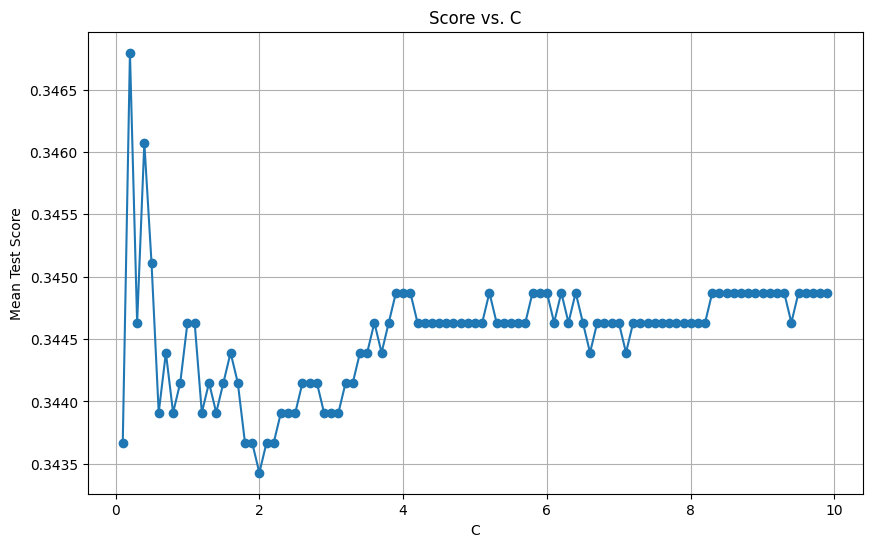

Best parameters: {'C': 0.2, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.3467957396093678


In [80]:
# Define the parameters we will test, setting C values from 0 to 1 in increments of 0.01

parameters = {'C': np.arange(0, 10, 0.1), 
              'penalty': ['l1'], 
              'solver': ['saga']}

result_lasso = best_feature_grid_search_visualization(X_train_pca, y_train_pca, parameters, model, result_lasso)

#### Ridge

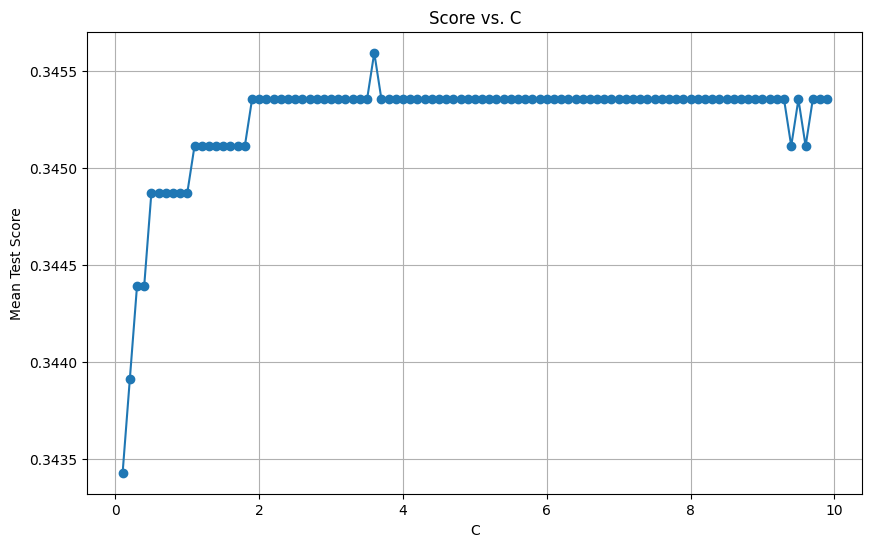

Best parameters: {'C': 3.6, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.3455938165324447


In [81]:
# Define the parameters we will test, setting C values from 0 to 1 in increments of 0.01

parameters = {'C': np.arange(0, 10, 0.1), 
              'penalty': ['l2'], 
              'solver': ['saga']}

result_ridge = best_feature_grid_search_visualization(X_train_pca, y_train_pca, parameters, model, result_ridge)

#### Elastic Net

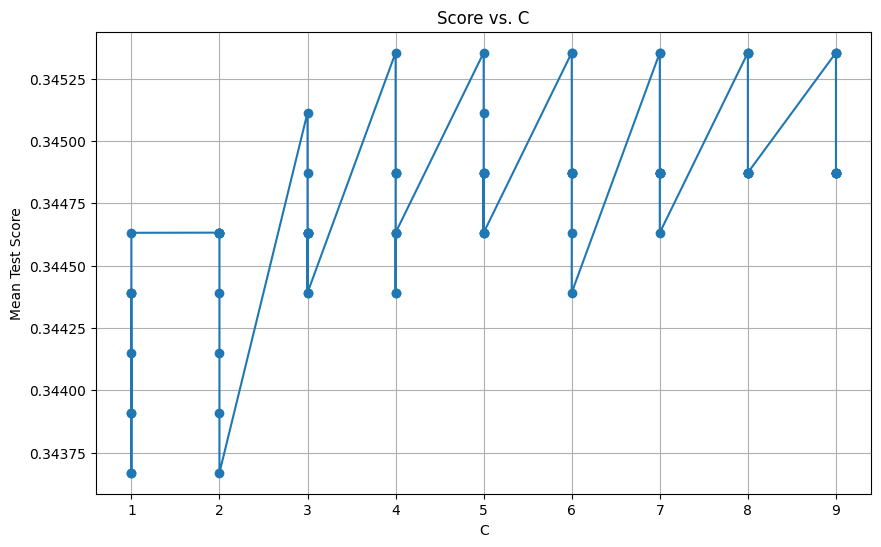

Best parameters: {'C': 4, 'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}
Best Score: 0.3453534319170601


In [83]:
# Define the parameters we will test, setting C values from 0 to 1 in increments of 0.01

parameters = {'C': np.arange(0,10, 1), 
              'penalty': ['elasticnet'], 
              'solver': ['saga'],
              'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

result_elasticnet = best_feature_grid_search_visualization(X_train_pca, y_train_pca, parameters, model, result_elasticnet)

We can see that despite using the best parameters for the regularization methods, the results were not good. We will now test the best model with the best parameters found in the previous steps. Since the performance was similar in all three methods, we will use the Ridge regularization method to use all the features of the PCA.

In [95]:
# Select the optimal regularization method between Lasso and Ridge, then perform a detailed search within a refined range around the previously identified best C value
c = np.arange(result_ridge['C'] - 0.5, result_ridge['C'] + 0.5, 0.1)

parameters = {'C':c, 
              'penalty': ['l2'],  
              'solver': ['saga']}

best_feature_ridge = best_feature_grid_search(X_train_pca.columns,X_train_pca, y_train_pca, parameters, model)

Best parameters: {'C': 3.1, 'penalty': 'l2', 'solver': 'saga'}
Feature Coefficients:
   Feature  Coefficient
0        0     0.002198
1        1     0.005334
2        2     0.017967
3        3     0.008137
4        4     0.007683
5        5    -0.025451
6        6     0.002655
7        7    -0.016863
8        8     0.050149


All the features have low coefficients which indicates that none of them have very good predictive power.

#### Best model

In [96]:
# Initialize the models with the best parameters

best_models_lr ={
    'Logistic Regression with Ridge': LogisticRegression(C=best_feature_ridge['C'], 
                                                         penalty=best_feature_ridge['penalty'], 
                                                         solver= 'saga')
}

###### Holdout evaluation

In [97]:
holdout_evaluation(pca_results, best_models_lr, X_pca, y)

##### Cross Validation (K=5)

In [98]:
cross_validation_evaluation(pca_results, best_models_lr, X_pca, y, 5)

##### Cross Validation (K=10)

In [99]:
cross_validation_evaluation(pca_results, best_models_lr, X_pca, y, 10)

##### Leave One Out Cross Validation (LOOCV)

In [100]:
loocv_evaluation(pca_results, best_models_lr, X_pca, y)

##### Bootstrap

In [101]:
bootstrap_evaluation(pca_results, best_models_lr, X_pca, y, 100)

### Results

In [102]:
pca_results

Model                    Method  Accuracy  \
0              Logistic Regression                  Houldout  0.365544   
1                              LDA                  Houldout  0.366105   
2                              QDA                  Houldout  0.357183   
3              Logistic Regression   Cross-Validation with 5  0.358923   
4                              LDA   Cross-Validation with 5  0.359259   
5                              QDA   Cross-Validation with 5  0.359428   
6              Logistic Regression  Cross-Validation with 10  0.361785   
7                              LDA  Cross-Validation with 10  0.361953   
8                              QDA  Cross-Validation with 10  0.355219   
9              Logistic Regression               LeaveOneOut  0.364310   
10                             LDA               LeaveOneOut  0.364646   
11                             QDA               LeaveOneOut  0.359933   
12             Logistic Regression                 Bootstrap  0.279319   
13                             LDA                 Bootstrap  0.279366   
14                             QDA                 Bootstrap  0.288462   
15  Logistic Regression with Ridge                  Houldout  0.365657   
16  Logistic Regression with Ridge   Cross-Validation with 5  0.358923   
17  Logistic Regression with Ridge  Cross-Validation with 10  0.361785   
18  Logistic Regression with Ridge               LeaveOneOut  0.364310   
19  Logistic Regression with Ridge                 Bootstrap  0.279311   

    Precision    Recall        F1   Std Dev  \
0    0.266366  0.365544  0.306951  0.007538   
1    0.266791  0.366105  0.307427  0.007492   
2    0.340856  0.357183  0.321293  0.006536   
3    0.262359  0.358923  0.300552  0.007871   
4    0.262619  0.359259  0.300827  0.007777   
5    0.346613  0.359428  0.321575  0.006542   
6    0.264817  0.361785  0.304701  0.021087   
7    0.264942  0.361953  0.304850  0.020878   
8    0.336461  0.355219  0.315666  0.013320   
9    0.364310  0.364310  0.364310  0.481236   
10   0.364646  0.364646  0.364646  0.481331   
11   0.359933  0.359933  0.359933  0.479980   
12   0.203697  0.279319  0.200010  0.012727   
13   0.206154  0.279366  0.200071  0.012634   
14   0.345589  0.288462  0.246366  0.013102   
15   0.266448  0.365657  0.307048  0.007517   
16   0.262359  0.358923  0.300552  0.007871   
17   0.264817  0.361785  0.304701  0.021087   
18   0.364310  0.364310  0.364310  0.481236   
19   0.203690  0.279311  0.200008  0.012751   

                                     Confusion Matrix  
0   [[3147, 0, 3345], [2307, 0, 2562], [3092, 0, 3...  
1   [[3154, 0, 3338], [2307, 0, 2562], [3089, 0, 3...  
2   [[3061, 331, 3100], [2295, 259, 2315], [3062, ...  
3   [[1081, 0, 1079], [793, 0, 827], [1109, 0, 1051]]  
4   [[1081, 0, 1079], [794, 0, 826], [1107, 0, 1053]]  
5   [[1015, 94, 1051], [773, 78, 769], [1027, 91, ...  
6   [[1069, 0, 1091], [795, 0, 825], [1080, 0, 1080]]  
7   [[1070, 0, 1090], [795, 0, 825], [1080, 0, 1080]]  
8   [[1019, 89, 1052], [784, 65, 771], [1049, 85, ...  
9   [[1099, 0, 1061], [809, 0, 811], [1095, 0, 1065]]  
10  [[1100, 0, 1060], [809, 0, 811], [1094, 0, 1066]]  
11  [[1051, 69, 1040], [768, 54, 798], [1059, 68, ...  
12  [[18501, 73, 19559], [28931, 83, 30389], [1866...  
13  [[18504, 76, 19553], [28916, 86, 30401], [1866...  
14  [[16938, 2843, 18352], [26792, 4223, 28388], [...  
15  [[3148, 0, 3344], [2307, 0, 2562], [3091, 0, 3...  
16  [[1081, 0, 1079], [793, 0, 827], [1109, 0, 1051]]  
17  [[1069, 0, 1091], [795, 0, 825], [1080, 0, 1080]]  
18  [[1099, 0, 1061], [809, 0, 811], [1095, 0, 1065]]  
19  [[18503, 73, 19557], [28933, 83, 30387], [1867...

As there are no observable improvements, we can only conclude that the PCA was not useful in our case. It was able to reduce the dimensionality of our data, leaving the dataset with 9 features that explained 95% of the variance. However, this tradeoff was not worth it at all as it led to a very high decrease in performance.

Due to the lack of performance, we will not test the other models with the PCA components as there are no prospects of significant improvements that justify a comparison with the previous models.

## Reinforcement Learning

For this section, the Random Forest and Logistic Regression models were chosen as they performed the best previously.

In [24]:
X_data = df_encoded.drop(columns=['Vegetation_Type','Vegetation_Type_Enc'])
y_data = df_encoded['Vegetation_Type_Enc']

X = X_data.to_numpy()
y = y_data.to_numpy()

n_features = X.shape[1]
penalty = 0.1

This implementation of the q-learning algorithm begins with an empty state and uses epsilon-greedy with epsilon decay to determine whether to use exploration or exploitation. A penalty is applied for each extra feature chosen to incentivize choosing the least number of features. The base reward is calculated as the difference between the next accuracy and the current, giving a positive reward if the action results in an increase of accuracy

In [4]:
# First Implementation
def first_Q_learning(X, y, evaluate_features):
    n_features = X.shape[1]

    # Setup test and validation datasets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create a Q-table with rows as states (possible feature combinations)
    # and columns as actions (features to select or stop)
    Q_table = np.zeros((2**n_features, n_features))

    gamma=0.1
    episodes=1000
    alpha=0.8
    epsilon=1.0
    min_epsilon=0.1
    epsilon_decay=0.995
    penalty=0.1

    rewards = []

    for i in range(episodes):
        print(f"Running episode #{i+1}")
        # For each episode, start with an empty feature set
        state = np.zeros(n_features, dtype=int)
        total_reward = 0
        prev_accuracy = 0

        for _ in range(n_features):
            state_idx = state_to_index(state)

            # Choose actions based on an epsilon-greedy policy
            if np.random.uniform(0, 1) < epsilon:
                action = np.random.choice(np.where(state == 0)[0].tolist() + [n_features])  # Select a feature or stop
            else:
                action = np.argmax(Q_table[state_idx, :])

            if action == n_features:  # Stop action
                break

            # Update the state
            next_state = state.copy()
            next_state[action] = 1

            # Get features from next state
            selected_features = np.where(next_state == 1)[0]

            next_accuracy = evaluate_features(selected_features, penalty, X_train, X_val, y_train, y_val)

            # Reward after evaluating the classification model with the
            # selected features and penalize based on the number of features
            base_reward = next_accuracy - prev_accuracy
            reward = base_reward - 0.01 * len(selected_features)

            next_state_idx = state_to_index(next_state)
            # Update the Q-table using the Q-learning equation
            Q_table[state_idx, action] += alpha * (
                reward + gamma * np.max(Q_table[next_state_idx, :]) - Q_table[state_idx, action]
            )

            total_reward += reward
            state = next_state
            prev_accuracy = next_accuracy

        # Decay epsilon
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

        rewards.append(total_reward)

    return Q_table

Q_table_random_forest_one = first_Q_learning(X, y, evaluate_features_random_forest)
Q_table_logistic_regression_one = first_Q_learning(X, y, evaluate_features_logistic_regression)

Running episode #1
Running episode #2
Running episode #3
Running episode #4
Running episode #5
Running episode #6
Running episode #7
Running episode #8
Running episode #9
Running episode #10
Running episode #11
Running episode #12
Running episode #13
Running episode #14
Running episode #15
Running episode #16
Running episode #17
Running episode #18
Running episode #19
Running episode #20
Running episode #21
Running episode #22
Running episode #23
Running episode #24
Running episode #25
Running episode #26
Running episode #27
Running episode #28
Running episode #29
Running episode #30
Running episode #31
Running episode #32
Running episode #33
Running episode #34
Running episode #35
Running episode #36
Running episode #37
Running episode #38
Running episode #39
Running episode #40
Running episode #41
Running episode #42
Running episode #43
Running episode #44
Running episode #45
Running episode #46
Running episode #47
Running episode #48
Running episode #49
Running episode #50
Running e

This implementation differs from the previous one as each episode starts with a random state to promote exploration. At each step we chose the action with the highest average Q-value for seen states and a random action for unseen states. The reward is calculated as the difference in accuracy between the current state and the next state. We also penalize the reward for selecting more than half of the features. To get the best state we use the average reward for each feature to select the best ones.

In [5]:
# Second Implementation

def second_Q_learning(X, y, evaluate_features):
    # Initialize a set to track visited states
    visited_states = set()

    n_features = X.shape[1]

    # Setup test and validation datasets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    alpha = 0.8
    gamma = 0.95
    penalty = 0.1
    episodes = 1000

    # Create the table to store Q-values for all possible states and actions
    q_table = np.zeros((2 ** n_features, n_features))

    for episode in range(episodes):
        print(f"Running episode #{episode+1}")
        # Initialize the first state as random one
        state = np.random.randint(2, size=n_features)
        state_index = state_to_index(state)
        
        selected_features = np.where(state == 1)[0]

        # Evaluate the initial state
        current_accuracy = evaluate_features(selected_features, penalty, X_train, X_val, y_train, y_val)
        
        for _ in range(n_features):
            # Determine available actions for the current state
            available_actions = np.where(state == 0)[0]

            if len(available_actions) == 0:
                break

            # Chose a random action for unseen states and the action with the most AOR for seen states
            if state_index not in visited_states:
                action = np.random.choice(available_actions.tolist() + [n_features])
            else:
                action_sums = q_table.sum(axis=0)
                non_zero_counts = (q_table != 0).sum(axis=0)
                non_zero_counts = np.where(non_zero_counts == 0, 1, non_zero_counts)
                action_means = action_sums / non_zero_counts
                action = available_actions[np.argmax(action_means[available_actions])]

            if action == n_features:
                break
            
            next_state = state.copy()
            
            # Transform the state by taking the action
            next_state[action] = 1
            next_state_index = state_to_index(next_state)

            selected_features = np.where(next_state == 1)[0]
            
            # Evaluate accuracy of the new state
            next_accuracy = evaluate_features(selected_features, penalty, X_train, X_val, y_train, y_val)
            
            # Calculate reward as the difference in accuracy of the new state and the current state
            reward = next_accuracy - current_accuracy
            
            # Apply a penalty for selecting more than half of the features
            if np.sum(state) > n_features / 2:
                reward += penalty * (np.sum(state) - n_features / 2)
            
            # Update Q-value using the Bellman equation
            best_next_action = np.argmax(q_table[next_state_index])
            q_table[state_index, action] += alpha * (
                reward + gamma * q_table[next_state_index, best_next_action] - q_table[state_index, action]
            )
            
            # Add the current state to the set of visited states
            visited_states.add(state_index)
            
            # Update current state and accuracy
            state = next_state
            state_index = next_state_index
            current_accuracy = next_accuracy

    return q_table

Q_table_random_forest_two = second_Q_learning(X, y, evaluate_features_random_forest)
Q_table_logistic_regression_two = second_Q_learning(X, y, evaluate_features_logistic_regression)

Running episode #1
Running episode #2
Running episode #3
Running episode #4
Running episode #5
Running episode #6
Running episode #7
Running episode #8
Running episode #9
Running episode #10
Running episode #11
Running episode #12
Running episode #13
Running episode #14
Running episode #15
Running episode #16
Running episode #17
Running episode #18
Running episode #19
Running episode #20
Running episode #21
Running episode #22
Running episode #23
Running episode #24
Running episode #25
Running episode #26
Running episode #27
Running episode #28
Running episode #29
Running episode #30
Running episode #31
Running episode #32
Running episode #33
Running episode #34
Running episode #35
Running episode #36
Running episode #37
Running episode #38
Running episode #39
Running episode #40
Running episode #41
Running episode #42
Running episode #43
Running episode #44
Running episode #45
Running episode #46
Running episode #47
Running episode #48
Running episode #49
Running episode #50
Running e

In [18]:
# Calculate the mean reward for each action

action_sums_one = Q_table_random_forest_one.sum(axis=0)
non_zero_counts = (Q_table_random_forest_one != 0).sum(axis=0)
non_zero_counts = np.where(non_zero_counts == 0, 1, non_zero_counts)
actions_means_one = action_sums_one / non_zero_counts
ordered_actions_means_one = sorted(actions_means_one, reverse=True)
print("Random Forest Mean Actions #1:", actions_means_one)

action_sums_two = Q_table_random_forest_two.sum(axis=0)            
non_zero_counts = (Q_table_random_forest_two != 0).sum(axis=0)
non_zero_counts = np.where(non_zero_counts == 0, 1, non_zero_counts)
actions_means_two = action_sums_two / non_zero_counts
ordered_actions_means_two = sorted(actions_means_two, reverse=True)
print("")
print("Random Forest Mean Actions #2:", actions_means_two)

Random Forest Mean Actions #1: [-0.02772526 -0.03114988 -0.03462714 -0.0326943  -0.03306842 -0.06089382
 -0.08346611 -0.07038785 -0.07804447  0.07867526 -0.01924002]

Random Forest Mean Actions #2: [0.54694644 0.51520789 0.55720513 0.54724231 0.31064519 0.22745338
 0.18555705 0.23726812 0.24651901 0.7415025  0.41332538]


In [19]:
# Get the total mean of rewards for all actions

mean1 = round(actions_means_one.mean(), 2)
print("Random Forest Mean #1:", mean1)
mean2 = round(actions_means_two.mean(), 2)
print("")
print("Random Forest Mean #2:", mean2)

Random Forest Mean #1: -0.04

Random Forest Mean #2: 0.41


In [27]:
# Compare the two implementations

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

print("First Q-learning Implementation with Random Forest")

# Select the features with the highest values

state = np.zeros(n_features, dtype=int)
for i, num in enumerate(actions_means_one):
    if num >= ordered_actions_means_one[4]:
        state[i] = 1

print("Number of features:", np.sum(state))
selected_features = np.where(state == 1)[0]
print("Selected Features:", X_data.iloc[:, selected_features].columns.to_list())

result = evaluate_features_random_forest(selected_features, penalty, X_train, X_val, y_train, y_val)
print("Accuracy:", result)

for i, num in enumerate(actions_means_one):
    if num >= ordered_actions_means_one[6]:
        state[i] = 1

print("")
print("Number of features:", np.sum(state))
selected_features = np.where(state == 1)[0]
print("Selected Features:", X_data.iloc[:, selected_features].columns.to_list())

result = evaluate_features_random_forest(np.where(state == 1)[0], penalty, X_train, X_val, y_train, y_val)
print("Accuracy:", result)

for i in range(len(actions_means_two)):
    state[i] = 1

print("")
print("Number of features:", len(state))
selected_features = np.where(state == 1)[0]
print("Selected Features:", X_data.iloc[:, selected_features].columns.to_list())

result = evaluate_features_random_forest(selected_features, penalty, X_train, X_val, y_train, y_val)
print("Accuracy:", result)

print("")
print("Second Q-learning Implementation with Random Forest")

# Select the features with the highest values
state = np.zeros(n_features, dtype=int)
for i, num in enumerate(actions_means_two):
    if num >= ordered_actions_means_two[4]:
        state[i] = 1

print("Number of features:", np.sum(state))
selected_features = np.where(state == 1)[0]
print("Selected Features:", X_data.iloc[:, selected_features].columns.to_list())

result = evaluate_features_random_forest(np.where(state == 1)[0], penalty, X_train, X_val, y_train, y_val)
print("Accuracy:", result)

for i, num in enumerate(actions_means_two):
    if num >= ordered_actions_means_two[6]:
        state[i] = 1

print("")
print("Number of features:", np.sum(state))
selected_features = np.where(state == 1)[0]
print("Selected Features:", X_data.iloc[:, selected_features].columns.to_list())

result = evaluate_features_random_forest(np.where(state == 1)[0], penalty, X_train, X_val, y_train, y_val)
print("Accuracy:", result)

for i in range(len(actions_means_two)):
    state[i] = 1

print("")
print("Number of features:", len(state))
selected_features = np.where(state == 1)[0]
print("Selected Features:", X_data.iloc[:, selected_features].columns.to_list())

result = evaluate_features_random_forest(selected_features, penalty, X_train, X_val, y_train, y_val)
print("Accuracy:", result)

First Q-learning Implementation with Random Forest
Number of features: 5
Selected Features: ['Altitude', 'Slope_Orientation', 'Shadow_Index_9h', 'Soil_Type_Enc', 'Wilderness_Area_Enc']
Accuracy: 0.8400673400673401

Number of features: 7
Selected Features: ['Altitude', 'Slope_Orientation', 'Vertical_Distance_To_Water', 'Shadow_Index_9h', 'Shadow_Index_12h', 'Soil_Type_Enc', 'Wilderness_Area_Enc']
Accuracy: 0.8552188552188552

Number of features: 11
Selected Features: ['Altitude', 'Slope_Orientation', 'Vertical_Distance_To_Water', 'Shadow_Index_9h', 'Shadow_Index_12h', 'Canopy_Density', 'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level', 'Soil_Type_Enc', 'Wilderness_Area_Enc']
Accuracy: 0.8333333333333334

Second Q-learning Implementation with Random Forest
Number of features: 5
Selected Features: ['Altitude', 'Slope_Orientation', 'Vertical_Distance_To_Water', 'Shadow_Index_9h', 'Soil_Type_Enc']
Accuracy: 0.8580246913580247

Number of features: 7
Selected Features: ['Altitude', 

With the results of both Q-learning algorithms we can see that both allow us to select features effectively, despite having different results, reducing both complexity and time for the training of our model.

We can see that even with only 5 features, the testing accuracy is still almost as good as with 7 features and better than with 11 features, showing that some features were impairing the model's performance.

To maximize the results, we will use grid search to find the best hyperparameters for the model with the top 5 selected features of the second implementation of the Q-learning algorithm.

In [28]:
# Search the best values for the random forest model for the best state

state = np.zeros(n_features, dtype=int)
for i, num in enumerate(actions_means_two):
    if num >= ordered_actions_means_one[4]:
        state[i] = 1

selected_features = np.where(state == 1)[0]
X_train, X_test, y_train, y_test = train_test_split(X[:, selected_features], y, test_size=0.3, random_state=42)

param = {
    'n_estimators': [50, 75, 100],
    'max_depth': np.arange(10, 15, 1),
    'max_leaf_nodes': [100, 150, 200],
    'max_features': ['auto', 'sqrt']
}

best_random_forest(X_train, y_train, param)

Best parameters {'max_depth': 12, 'max_features': 'sqrt', 'max_leaf_nodes': 200, 'n_estimators': 100}


In [38]:
# Test the model with the best parameters

random_forest = RandomForestClassifier(max_depth=12, max_features='sqrt', max_leaf_nodes=200, n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

y_pred_train = random_forest.predict(X_train)
print("Training accuracy:", accuracy_score(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy: 0.9523809523809523
Accuracy: 0.8428731762065096
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       670
           1       0.76      0.65      0.70       482
           2       0.75      0.85      0.79       630

    accuracy                           0.84      1782
   macro avg       0.84      0.83      0.83      1782
weighted avg       0.85      0.84      0.84      1782



As we can see, even though the accuracy hasn't increased that much, we were able to achieve a good result with way less features

In [40]:
# Calculate the mean reward for each action

action_sums_one = Q_table_logistic_regression_one.sum(axis=0)
non_zero_counts = (Q_table_logistic_regression_one != 0).sum(axis=0)
non_zero_counts = np.where(non_zero_counts == 0, 1, non_zero_counts)
actions_means_one = action_sums_one / non_zero_counts
ordered_actions_means_one = sorted(actions_means_one, reverse=True)
print("Logistic Regression Mean Actions #1:", actions_means_one)

action_sums_two = Q_table_logistic_regression_two.sum(axis=0)            
non_zero_counts = (Q_table_logistic_regression_two != 0).sum(axis=0)
non_zero_counts = np.where(non_zero_counts == 0, 1, non_zero_counts)
actions_means_two = action_sums_two / non_zero_counts
ordered_actions_means_two = sorted(actions_means_two, reverse=True)
print("")
print("Logistic Regression Mean Actions #2:", actions_means_two)

Logistic Regression Mean Actions #1: [-0.02860982 -0.04987711 -0.04711943 -0.04018371 -0.03425055 -0.05185161
 -0.05213882 -0.05579164 -0.05263018  0.01581981 -0.03235168]

Logistic Regression Mean Actions #2: [0.45126275 0.19457374 0.44873971 0.44788931 0.38999507 0.23770913
 0.32003854 0.21242022 0.18400666 0.47032451 0.43531604]


In [41]:
# Get the total mean of rewards for all actions

mean1 = round(actions_means_one.mean(), 2)
print("Logistic Regression Mean #1:", mean1)
mean2 = round(actions_means_two.mean(), 2)
print("")
print("Logistic Regression Mean #2:", mean2)

Logistic Regression Mean #1: -0.04

Logistic Regression Mean #2: 0.34


In [42]:
# Compare the two implementations

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

print("First Q-learning Implementation with Logistic Regression")

# Select the features with the highest values

state = np.zeros(n_features, dtype=int)
for i, num in enumerate(actions_means_one):
    if num >= ordered_actions_means_one[4]:
        state[i] = 1

print("Number of features:", np.sum(state))
selected_features = np.where(state == 1)[0]
print("Selected Features:", X_data.iloc[:, selected_features].columns.to_list())

result = evaluate_features_logistic_regression(selected_features, penalty, X_train, X_val, y_train, y_val)
print("Accuracy:", result)

for i, num in enumerate(actions_means_one):
    if num >= ordered_actions_means_one[6]:
        state[i] = 1

print("")
print("Number of features:", np.sum(state))
selected_features = np.where(state == 1)[0]
print("Selected Features:", X_data.iloc[:, selected_features].columns.to_list())

result = evaluate_features_logistic_regression(np.where(state == 1)[0], penalty, X_train, X_val, y_train, y_val)
print("Accuracy:", result)

for i in range(len(actions_means_two)):
    state[i] = 1

print("")
print("Number of features:", len(state))
selected_features = np.where(state == 1)[0]
print("Selected Features:", X_data.iloc[:, selected_features].columns.to_list())

result = evaluate_features_logistic_regression(selected_features, penalty, X_train, X_val, y_train, y_val)
print("Accuracy:", result)

print("")
print("Second Q-learning Implementation with Logistic Regression")

# Select the features with the highest values
state = np.zeros(n_features, dtype=int)
for i, num in enumerate(actions_means_two):
    if num >= ordered_actions_means_two[4]:
        state[i] = 1

print("Number of features:", np.sum(state))
selected_features = np.where(state == 1)[0]
print("Selected Features:", X_data.iloc[:, selected_features].columns.to_list())

result = evaluate_features_logistic_regression(np.where(state == 1)[0], penalty, X_train, X_val, y_train, y_val)
print("Accuracy:", result)

for i, num in enumerate(actions_means_two):
    if num >= ordered_actions_means_two[6]:
        state[i] = 1

print("")
print("Number of features:", np.sum(state))
selected_features = np.where(state == 1)[0]
print("Selected Features:", X_data.iloc[:, selected_features].columns.to_list())

result = evaluate_features_logistic_regression(np.where(state == 1)[0], penalty, X_train, X_val, y_train, y_val)
print("Accuracy:", result)

for i in range(len(actions_means_two)):
    state[i] = 1

print("")
print("Number of features:", len(state))
selected_features = np.where(state == 1)[0]
print("Selected Features:", X_data.iloc[:, selected_features].columns.to_list())

result = evaluate_features_logistic_regression(selected_features, penalty, X_train, X_val, y_train, y_val)
print("Accuracy:", result)

First Q-learning Implementation with Logistic Regression
Number of features: 5
Selected Features: ['Altitude', 'Shadow_Index_9h', 'Shadow_Index_12h', 'Soil_Type_Enc', 'Wilderness_Area_Enc']
Accuracy: 0.7065095398428731

Number of features: 7
Selected Features: ['Altitude', 'Slope_Orientation', 'Vertical_Distance_To_Water', 'Shadow_Index_9h', 'Shadow_Index_12h', 'Soil_Type_Enc', 'Wilderness_Area_Enc']
Accuracy: 0.7160493827160493

Number of features: 11
Selected Features: ['Altitude', 'Slope_Orientation', 'Vertical_Distance_To_Water', 'Shadow_Index_9h', 'Shadow_Index_12h', 'Canopy_Density', 'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level', 'Soil_Type_Enc', 'Wilderness_Area_Enc']
Accuracy: 0.686307519640853

Second Q-learning Implementation with Logistic Regression
Number of features: 5
Selected Features: ['Altitude', 'Vertical_Distance_To_Water', 'Shadow_Index_9h', 'Soil_Type_Enc', 'Wilderness_Area_Enc']
Accuracy: 0.7115600448933782

Number of features: 7
Selected Features: [

In [52]:
state = np.zeros(n_features, dtype=int)
for i, num in enumerate(actions_means_two):
    if num >= ordered_actions_means_one[6]:
        state[i] = 1

selected_features = np.where(state == 1)[0]
X_train, X_test, y_train, y_test = train_test_split(X[:, selected_features], y, test_size=0.3, random_state=42)

In [55]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

y_pred_train = logistic_regression.predict(X_train)
print("Training accuracy:", accuracy_score(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy: 0.697931697931698
Accuracy: 0.686307519640853
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       670
           1       0.59      0.42      0.49       482
           2       0.56      0.66      0.61       630

    accuracy                           0.69      1782
   macro avg       0.67      0.66      0.66      1782
weighted avg       0.68      0.69      0.68      1782



The results from the applying the q-learning algorithms with the logistic regression did not improve the performance.

## Reinforcement Learning with all features

We will now use a method of Q-learning that will select a subset of the original features to try to maximize the performance of the model while minimizing the number of features used. We have an action to select each feature and one for stopping the selection.

In [60]:
# Load the data with all features

data = pd.read_csv('data/encoded_data.csv')
X = data.drop(columns=['Vegetation_Type', 'Vegetation_Type_Enc'])
y = data['Vegetation_Type_Enc']
X = np.array(X)
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

 This implementation is similar to the previous one but with some differences in the stopping mechanism. 
Each episode only ends when the stop action is selection and actions cannot be repeated in the same episode. The reward for selecting a feature is the difference in accuracy between the current state and the next state, and a penalty is applied for selecting more than half of the features and for stopping the selection the reward is the accuracy of the current state with the same penalization. Each episode starts with a random episode to promote exploration. When the state was not seen before, the action is selected randomly else we evaluate the Q-values of the already explored actions to see if they are above a certain threshold. If they are not we explore or stop. If there are actions that lead to good rewards we choose the one that has the highest value (excluding the stop action).
Since an episode just ends when choosing the stop action, we only consider these states as final ones, similar to what happens in a game. When choosing the best state, we will select the one that has the highest value in the last column of the Q-table.


In [61]:
# Define hyperparameters
alpha = 0.8
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01
n_features = 16
penalty = 0.1
episodes = 1000

# Initialize a set to track visited states
visited_states = set()

# Create the table to store Q-values for all possible states and actions
q_table = np.zeros((2 ** n_features, n_features + 1))

for episode in range(episodes):
    
    # Initialize the first state as random one
    state = np.random.randint(2, size=n_features)
    state_index = state_to_index(state)
    
    # Evaluate the initial state
    current_accuracy = evaluate_features_random_forest(state, penalty, X_train, X_val, y_train, y_val)
    
    for step in range(n_features + 1):
    
        # Determine available actions for the current state
        available_actions = np.append(np.where(state == 0)[0], n_features)  # Add stop action
        feature_actions = np.where(state == 0)[0]
    
        # Choose a random action for unseen states and the action with the most AOR for seen states
        if state_index not in visited_states:
            action = np.random.choice(available_actions)  # Exploration
        else:
            # Get the Q-values for the available actions
            available_q_values = q_table[state_index, feature_actions]
            
            # Filter out invalid Q-values (i.e., those greater than 0)
            valid_q_values = available_q_values[available_q_values > 0]
            
            # If no valid Q-values are found or they are all below threshold, explore or stop
            if valid_q_values.size == 0 or np.max(valid_q_values) < 0.1 or feature_actions.size == 0:
                # If no valid action is found or if all valid actions are below threshold, explore or stop
                if np.sum(state) > n_features / 2:
                    # If more than half of the features are selected and no good action is available, stop
                    action = n_features  # Stop action
                else:
                    # Else, explore (random choice) or stop
                    if np.random.rand() < epsilon:  # Exploration chance
                        action = np.random.choice(available_actions)  # Random exploration
                    else:
                        action = n_features  # Stop action if exploration fails to find good options
            else:
                # Otherwise, choose the action with the highest Q-value
                action = feature_actions[np.argmax(valid_q_values)]
            
        if action == n_features:  # Stop action
            reward = evaluate_features_random_forest(state, penalty, X_train, X_val, y_train, y_val)  # Use accuracy as the reward for stopping

            if np.sum(state) > n_features / 2:
                reward -= penalty * (np.sum(state) - n_features / 2)
            
            print("Reward for stopping:", reward)
            print("Selected features:", state)
            q_table[state_index, action] += alpha * (
                reward - q_table[state_index, action]
            )
            break  # End the episode    
        
        next_state = state.copy()
        
        # Transform the state by taking the action
        next_state[action] = 1
        next_state_index = state_to_index(next_state)
        
        # Evaluate accuracy of the new state
        next_accuracy = evaluate_features_random_forest(next_state, penalty, X_train, X_val, y_train, y_val)
        
        # Calculate reward as the difference in accuracy of the new state and the current state
        reward = next_accuracy - current_accuracy
        
        # Apply a penalty for selecting more than half of the features
        if np.sum(state) > n_features / 2:
            reward -= penalty * (np.sum(state) - n_features / 2)
                
        # Update Q-value using the Bellman equation
        best_next_action = np.argmax(q_table[next_state_index])
        q_table[state_index, action] += alpha * (
            reward + gamma * q_table[next_state_index, best_next_action] - q_table[state_index, action]
        )
        
        # Add the current state to the set of visited states
        visited_states.add(state_index)
        
        # Update current state and accuracy
        state = next_state
        state_index = next_state_index
        current_accuracy = next_accuracy

    # Decay exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

Reward for stopping: 0.5783389450056116
Selected features: [1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1]
Reward for stopping: 0.37665544332211
Selected features: [1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0]
Reward for stopping: 0.3794612794612794
Selected features: [1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1]
Reward for stopping: 0.6789001122334456
Selected features: [1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1]
Reward for stopping: 0.17272727272727262
Selected features: [1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1]
Reward for stopping: 0.0721661054994388
Selected features: [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
Reward for stopping: 0.47777777777777775
Selected features: [0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1]
Reward for stopping: 0.7828282828282829
Selected features: [1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0]
Reward for stopping: 0.7760942760942761
Selected features: [1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1]
Reward for stopping: 0.2727272727272727
Selected features: [1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1]
Reward for stopping: -0.3690235690235691
Selected features: [1 1 1 1 1

In [62]:
# Get the index of the row with the maximum value in the last column
max_index = np.argmax(q_table[:, -1])

# Function to transform an index to a state
best_state = index_to_state(max_index, n_features)
print(f"The best state is {best_state} and uses {np.sum(best_state)} features")

The best state is [0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0] and uses 5 features


In [63]:
# Evaluate the best state
selected_features = np.where(best_state == 1)[0]
print(selected_features)
X_train_fs = X_train[:, selected_features]
X_val_fs = X_val[:, selected_features]

model = RandomForestClassifier(random_state=42, max_depth=13, n_estimators=50, max_features="sqrt", max_leaf_nodes=100)
model.fit(X_train_fs, y_train)
y_pred = model.predict(X_val_fs)
y_train_pred = model.predict(X_train_fs)

# Get the training and testing accuracies
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_val, y_pred)

print(f"Training accuracy: {training_accuracy:.4f}, Testing accuracy: {testing_accuracy:.4f}")

[ 4  5 11 12 13]
Training accuracy: 0.7169, Testing accuracy: 0.5864
